# Used Cars Price Prediction
## Course Project, DS - MD2201
### Group: 4 <br> Batch: 1 <br> Div: ME-A <br> Year: 2020-21 <br> Dept: Mechanical <br><br> Group Members:

| Roll No. 	| GR No.   	| Name                  	|
|----------	|----------	|-----------------------	|
| 2        	| 11910002 	| Abhishek Gurgotra     	|
| 6        	| 11910265 	| Nagraj Alange         	|
| 7        	| 11910206 	| Ali Asgar Baghdadwala 	|
| 10       	| 11911181 	| Sourabh Antarkar      	|

### Introduction 
<p style='text-align: justify;'> The used car market is an ever-rising industry, which has
almost doubled its market value in the last few years. The
emergence of online portals has facilitated the need for
both the customer and the seller to be better informed about
the trends and patterns that determine the value of the used car
in the market. Determining whether the listed price of a used car is deserving is a challenging task, due to the many factors that drive a used vehicle’s price in the market. Predicting the resale value of a car is not a simple task. The value of used cars depend on numerous factors. The most important ones are
usually the age of the car, its make (and model), the origin of the car (the original
country of the manufacturer), its mileage (the number of kilometers it has run) and its
horsepower. Due to rising fuel prices, fuel economy is also of prime importance. Other factors such as the type of fuel it uses, the
interior style, the braking system, acceleration, the volume of its cylinders (measured
in cc), safety index, its size, number of doors, paint colour, weight of the car,
consumer reviews, its physical state,
whether it is a sports car, whether it has cruise control, whether it has automatic or
manual transmission etc. all may influence the price of the car. Machine Learning algorithms can be used to
predict the retail value of a car, based on a certain set of
features. The focus of this project is developing machine learning models that
can accurately predict the price of a used car based on its features, in order to make informed purchases. </p>

### Objective
Deciding whether a used car is worth the posted price when you see listings online can be difficult.
Several factors, including mileage, fuel type, engine, model, year, etc. can influence the actual worth of a car. From
the perspective of a seller, it is also a dilemma to price a used car appropriately. Based on existing
data, the aim is to use machine learning algorithms to develop models for predicting used car prices.

### Methodology
#### 1. Libraries, Dataset importing and analyzing
<p style='text-align: justify;'> The most preliminary step is to import the libraries and the dataset and analyzing the information given in the dataset. We find out the data types of each variable using the DataFrame.info() function, and can also observe the number of non-null values. We can see the list of columns using DataFrame.columns and can rename the columns as per our wish. </p>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Car price.csv')
pd.set_option('display.max_columns',None)
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [5]:
df.rename({'Unnamed: 0':'index'},axis=1,inplace=True)
df

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [6]:
df.dtypes

index                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

<br><br>
#### 2. Data Preprocessing/Cleaning
<p style='text-align: justify;'> Data cleaning is an extremely crucial aspect of machine learning. It is the most preliminary operation in the process of building a machine learning model, and is a part of data preprocessing. It deals with detecting and removing errors and inconsistencies from raw data in order to improve its quality which otherwise can drastically affect the accuracy of the model. Naturally, data from csv files is always unorganized and messy and needs to be processed using appropriate techniques before it could be trained on a model. Inconsistencies in raw data may be in the form of misspelt data, duplicate data, outliers, or even missing entries known as null values. So all these problems need to be addressed to before building a machine learning model.


##### A. Converting numeric data
The next and the most essential step is data cleaning. It consists of organizing the data in a uniform and machine readable manner. Firstly, we convert the numeric data of 'object' data type to 'numeric' data type. The 'mileage', 'engine', and 'power' columns are of 'object' data types with one part as a string and other a numeric value. Since these units must be expressed in a numerical format, we must convert them. First we need to extract the numerical portion by str.split() function and then convert it to 'numeric' using the pd.to_numeric() function </p>

In [7]:
def extract_num(X):
    return str(X).split('km')[0]
df['Mileage'] = df['Mileage'].apply(extract_num)
df

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998 CC,67.1 bhp,5.0,NaN,2.65


In [8]:
l = ['Engine','Power','New_Price']
def extract_num2(X):
    return str(X).split()[0]
for col in l:
    df[col] = df[col].apply(extract_num2)
df

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,nan,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,nan,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,nan,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,nan,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,7.88,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,nan,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,nan,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,nan,2.65


In [9]:
df.dtypes

index                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [10]:
for col in ['Mileage','Engine','Power','New_Price']:
    df[col] = pd.to_numeric(df[col],errors='coerce')
df.dtypes

index                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

<br><br>
##### B. Splitting data into training and testing set
<p style='text-align: justify;'> We perform a 75% - 25% train-test split. Separating data into training and testing sets is an important part of evaluating data mining models. Typically, when you separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. Analysis Services randomly samples the data to help ensure that the testing and training sets are similar. By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model.
After a model has been processed by using the training set, you test the model by making predictions against the test set. Because the data in the testing set already contains known values for the attribute that you want to predict, it is easy to determine whether the model's guesses are correct. </p>

In [11]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test = train_test_split(df,df['Price'],train_size=0.75, random_state=0)
df_train.shape,df_test.shape

((4514, 14), (1505, 14))

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt

<br><br>
##### C. Outliers Removal from training set
<p style='text-align: justify;'> Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Outliers are a potential threat to the model performance of any regression model. They pull the measures of central tendencies towards them. Thus, they increase the variability in the data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Therefore, the next data cleaning step is to remove outliers. This is achieved by data visualization techniques using the seaborn library. The 2 techniques used here are seaborn.boxplot() and seaborn.scatterplot(). </p>

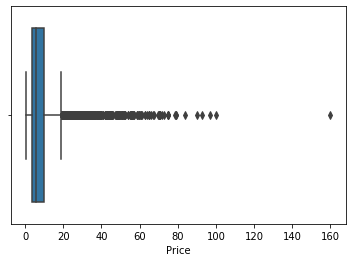

In [13]:
sb.boxplot(df_train['Price'])

In [14]:
df_train.drop(df_train[df_train['Price']>100].index, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


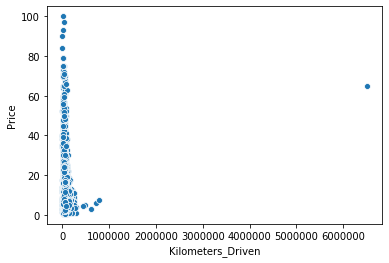

In [15]:
sb.scatterplot(data=df_train,x='Kilometers_Driven',y='Price')

In [16]:
df_train.drop(df_train[df_train['Kilometers_Driven']>1000000].index, inplace=True)

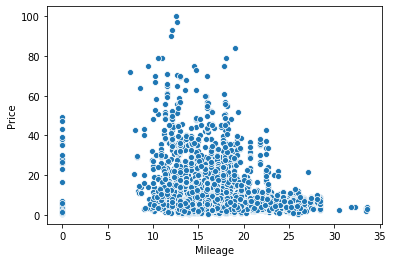

In [17]:
sb.scatterplot(data=df_train,x='Mileage',y='Price')

In [18]:
df_train.drop(df_train[df_train['Mileage']==0].index, inplace=True)

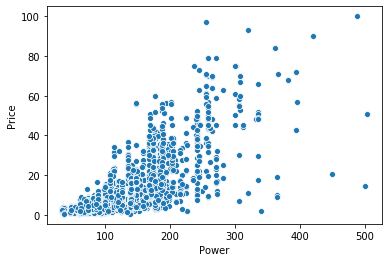

In [19]:
sb.scatterplot(data=df_train,x='Power',y='Price')

In [20]:
df_train.drop(df_train[df_train['Power']>430].index, inplace=True)

In [21]:
df_train.drop(df_train[df_train['Seats']==0].index, inplace=True)

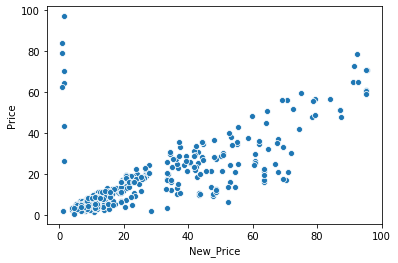

In [22]:
sb.scatterplot(data=df_train,x='New_Price',y='Price')

In [23]:
df_train.drop(df_train[df_train['New_Price']<2].index, inplace=True)

<br><br>
##### D. Filling NA Values
<p style='text-align: justify;'> The next step is to fill NA values or missing values. Missing values are always a part and parcel of every dataset and we must know how to technically handle them. Ignoring missing values can be a significant mistake because they will contaminate your data, and most algorithms won’t simply accept them. There are multiple ways to deal with missing values. If a particular column of a dataset has too many missing values, it would be wise to just drop the entire column. Similarly, we could also drop entire rows containing missing values. But dropping an attribute or a row is not always a sensible choice as it leads to immense loss of data and the model may turn out to be very inaccurate. So the next obvious way of handling NULL values is by filling them. We can fill them using the measures of central tendency such as mean, median, and mode. Mean and median can be applied on a feature which has numeric data like 'mileage', 'engine', 'power', whereas mode is usually applied an ‘object’ type data. We can calculate the mean, median or mode of the feature and replace it with the missing values. It's better to use median in case an attribute has a wide range of values. This way it would be less susceptible to outliers. </p>

In [24]:
df_train.isna().sum()

index                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                 18
Power                  74
Seats                  22
New_Price            3832
Price                   0
dtype: int64

In [25]:
df_test.isna().sum()

index                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                 11
Power                  36
Seats                  12
New_Price            1308
Price                   0
dtype: int64

In [26]:
for col in ['Mileage','Engine','Power','Seats']:
    df_train[col].fillna(value = df_train[col].median(),inplace=True)
    df_test[col].fillna(value=df_train[col].median(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
df_train.dtypes

index                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [28]:
df_train.shape,df_test.shape

((4446, 14), (1505, 14))

In [29]:
df=pd.concat([df_train,df_test],axis=0)
df.shape

(5951, 14)

In [30]:
df.corr()

,index,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
index,1.000000,0.001360,-0.009386,0.018774,-0.008612,-0.015207,-0.010388,-0.076392,-0.023966
Year,0.001360,1.000000,-0.446344,0.301364,-0.060608,0.020091,0.012975,-0.015270,0.305147
Kilometers_Driven,-0.009386,-0.446344,1.000000,-0.142210,0.164452,0.007569,0.212194,0.006389,-0.164742
Mileage,0.018774,0.301364,-0.142210,1.000000,-0.632035,-0.534067,-0.342413,-0.337172,-0.332812
Engine,-0.008612,-0.060608,0.164452,-0.632035,1.000000,0.858509,0.416146,0.664240,0.661045
Power,-0.015207,0.020091,0.007569,-0.534067,0.858509,1.000000,0.118993,0.792110,0.782137
Seats,-0.010388,0.012975,0.212194,-0.342413,0.416146,0.118993,1.000000,-0.015908,0.067777
New_Price,-0.076392,-0.015270,0.006389,-0.337172,0.664240,0.792110,-0.015908,1.000000,0.851935
Price,-0.023966,0.305147,-0.164742,-0.332812,0.661045,0.782137,0.067777,0.851935,1.000000


In [31]:
df.drop('New_Price',axis=1,inplace=True)

<br><br>
##### E. Encoding categorical data
<p style='text-align: justify;'> Our machines can only interpret numerical data. So all the other data types must be converted to a numerical form before they could be fed to the machine learning model. Therefore, encoding the categorical or the ‘object’ type variables becomes a necessary step. There are several ways to encode these variables. The type of encoding used here is One Hot Encoding or dummy encoding. One hot encoding uses binary values to encode the variables. These binary values are assigned by first converting the category value into a new column and then assigning either a 1 or a 0 depending on whether it is present or not. </p>

In [32]:
df = pd.get_dummies(df)
df.shape

(5951, 1874)

In [33]:
columns_obj = list(df.dtypes[df.dtypes == 'object'].index)
df.drop(columns_obj,axis=1,inplace=True)

<br><br>
##### F. Dropping Rendundant columns
We drop the columns that have low correlation with the dependent variable since they are redundant. Correlation can be found using the DataFrame.corr() function. We drop all the columns whose correlation is in the range (-0.1,0.1).

In [34]:
df.drop(list(df.corr()['Price'][(df.corr()['Price']<0.1) & (df.corr()['Price']> -0.1)].index),axis=1,inplace=True)
df

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Name_Audi Q7 3.0 TDI Quattro Premium Plus,Name_Audi Q7 35 TDI Quattro Technology,Name_BMW 5 Series 2013-2017 530d M Sport,Name_BMW 7 Series 740Li,Name_BMW X6 xDrive 40d M Sport,Name_Jaguar XF 2.2 Litre Luxury,Name_Jaguar XJ 3.0L Portfolio,Name_Lamborghini Gallardo Coupe,Name_Mercedes-Benz E-Class 2015-2017 E350 CDI Avantgrade,Name_Mercedes-Benz GL-Class 2007 2012 350 CDI Luxury,Name_Mercedes-Benz GLE 250d,Name_Mercedes-Benz GLE 350d,Name_Mercedes-Benz New C-Class C 220d Avantgarde Edition C,Name_Porsche Panamera Diesel,Location_Coimbatore,Location_Kolkata,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
1329,2014,61517,16.95,1197.0,78.90,4.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3924,2014,45407,21.10,814.0,55.20,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
636,2017,32249,21.90,1498.0,98.60,10.79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
420,2018,40322,18.90,1197.0,81.86,5.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3965,2011,87000,11.70,2354.0,177.60,5.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,2015,37000,18.60,1197.0,81.83,5.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3325,2010,48002,13.14,1798.0,157.80,6.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1875,2014,102418,12.99,2494.0,100.60,10.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2861,2016,61578,18.90,1197.0,82.00,6.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [35]:
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Name_Audi Q7 3.0 TDI Quattro Premium Plus,Name_Audi Q7 35 TDI Quattro Technology,Name_BMW 5 Series 2013-2017 530d M Sport,Name_BMW 7 Series 740Li,Name_BMW X6 xDrive 40d M Sport,Name_Jaguar XF 2.2 Litre Luxury,Name_Jaguar XJ 3.0L Portfolio,Name_Lamborghini Gallardo Coupe,Name_Mercedes-Benz E-Class 2015-2017 E350 CDI Avantgrade,Name_Mercedes-Benz GL-Class 2007 2012 350 CDI Luxury,Name_Mercedes-Benz GLE 250d,Name_Mercedes-Benz GLE 350d,Name_Mercedes-Benz New C-Class C 220d Avantgarde Edition C,Name_Porsche Panamera Diesel,Location_Coimbatore,Location_Kolkata,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
Year,1.000000,-0.446344,0.301364,-0.060608,0.020091,0.305147,0.000320,0.019827,0.023159,0.023332,0.011968,0.022023,0.011968,-0.009617,0.023332,0.000371,0.024965,0.042425,0.046880,0.003651,0.215338,-0.031294,0.116752,-0.117827,0.090795,-0.090795
Kilometers_Driven,-0.446344,1.000000,-0.142210,0.164452,0.007569,-0.164742,0.004470,-0.021388,-0.019364,-0.016884,0.001662,-0.028503,-0.018709,-0.017515,-0.019048,0.008116,-0.017956,-0.026654,-0.025646,-0.015333,-0.095392,-0.115737,0.231109,-0.230495,-0.103988,0.103988
Mileage,0.301364,-0.142210,1.000000,-0.632035,-0.534067,-0.332812,-0.065663,-0.042360,-0.029072,-0.026870,-0.010466,-0.022145,-0.025002,-0.036153,-0.022790,-0.050692,-0.002473,-0.057892,0.009705,-0.003105,-0.030051,0.067068,0.106810,-0.139316,-0.353674,0.353674
Engine,-0.060608,0.164452,-0.632035,1.000000,0.858509,0.661045,0.103129,0.066531,0.080247,0.042440,0.042876,0.046478,0.042876,0.078955,0.042689,0.079898,0.023239,0.085422,0.038559,0.066531,0.054188,-0.076248,0.435444,-0.415299,0.492764,-0.492764
Power,0.020091,0.007569,-0.534067,0.858509,1.000000,0.782137,0.111552,0.071964,0.096107,0.073189,0.069113,0.070414,0.061382,0.111520,0.053815,0.073692,0.044308,0.100489,0.045800,0.104609,0.077216,-0.067587,0.301789,-0.281218,0.642516,-0.642516
Price,0.305147,-0.164742,-0.332812,0.661045,0.782137,1.000000,0.109413,0.111937,0.103982,0.144370,0.108559,0.100586,0.116294,0.134481,0.103962,0.101620,0.110236,0.185673,0.101443,0.141219,0.175638,-0.110145,0.327701,-0.316045,0.592928,-0.592928
Name_Audi Q7 3.0 TDI Quattro Premium Plus,0.000320,0.004470,-0.065663,0.103129,0.111552,0.109413,1.000000,-0.001303,-0.001543,-0.000824,-0.000824,-0.002183,-0.000824,-0.000583,-0.000824,-0.001543,-0.001166,-0.001649,-0.001934,-0.001303,0.057649,-0.014084,0.041974,-0.041020,0.071464,-0.071464
Name_Audi Q7 35 TDI Quattro Technology,0.019827,-0.021388,-0.042360,0.066531,0.071964,0.111937,-0.001303,1.000000,-0.000995,-0.000532,-0.000532,-0.001408,-0.000532,-0.000376,-0.000532,-0.000995,-0.000752,-0.001064,-0.001248,-0.000841,0.046622,-0.009086,0.027078,-0.026463,0.046102,-0.046102
Name_BMW 5 Series 2013-2017 530d M Sport,0.023159,-0.019364,-0.029072,0.080247,0.096107,0.103982,-0.001543,-0.000995,1.000000,-0.000629,-0.000629,-0.001666,-0.000629,-0.000445,-0.000629,-0.001178,-0.000890,-0.001259,-0.001477,-0.000995,0.036039,-0.010752,0.032045,-0.031316,0.054558,-0.054558
Name_BMW 7 Series 740Li,0.023332,-0.016884,-0.026870,0.042440,0.073189,0.144370,-0.000824,-0.000532,-0.000629,1.000000,-0.000336,-0.000890,-0.000336,-0.000238,-0.000336,-0.000629,-0.000476,-0.000673,-0.000789,-0.000532,0.023515,-0.005745,-0.019635,0.020092,0.029150,-0.029150


In [36]:
df.drop('Transmission_Manual',axis=1,inplace=True)

In [37]:
df

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Name_Audi Q7 3.0 TDI Quattro Premium Plus,Name_Audi Q7 35 TDI Quattro Technology,Name_BMW 5 Series 2013-2017 530d M Sport,Name_BMW 7 Series 740Li,Name_BMW X6 xDrive 40d M Sport,Name_Jaguar XF 2.2 Litre Luxury,Name_Jaguar XJ 3.0L Portfolio,Name_Lamborghini Gallardo Coupe,Name_Mercedes-Benz E-Class 2015-2017 E350 CDI Avantgrade,Name_Mercedes-Benz GL-Class 2007 2012 350 CDI Luxury,Name_Mercedes-Benz GLE 250d,Name_Mercedes-Benz GLE 350d,Name_Mercedes-Benz New C-Class C 220d Avantgarde Edition C,Name_Porsche Panamera Diesel,Location_Coimbatore,Location_Kolkata,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic
1329,2014,61517,16.95,1197.0,78.90,4.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3924,2014,45407,21.10,814.0,55.20,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
636,2017,32249,21.90,1498.0,98.60,10.79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
420,2018,40322,18.90,1197.0,81.86,5.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3965,2011,87000,11.70,2354.0,177.60,5.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,2015,37000,18.60,1197.0,81.83,5.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3325,2010,48002,13.14,1798.0,157.80,6.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1875,2014,102418,12.99,2494.0,100.60,10.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2861,2016,61578,18.90,1197.0,82.00,6.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [38]:
df_train.shape,df_test.shape

((4446, 14), (1505, 14))

In [39]:
X_train = df.iloc[:4446].drop('Price',axis=1)
y_train = df.iloc[:4446]['Price']
X_test = df.iloc[4446:].drop('Price',axis=1)
y_test = df.iloc[4446:]['Price']

<br><br>
#### 3. Model Building
<p style='text-align: justify;'> We implemented several model building techniques, including ensemble learning techniques, with a 75% - 25% split for the training and test data. For most of the model implementations, the open-source Scikit-Learn package is used. Linear Regression, Random Forest Regression and XGBoost Regression are the models used: </p>
    
- **Linear Regression**<br>
Linear Regression is chosen as the first model due to its simplicity and comparatively small
training time. But it's performance is not satisfactory, hence we switch to a more complex model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model_lin = LinearRegression()
model_lin.fit(X_train,y_train)
LR = r2_score(y_test,model_lin.predict(X_test))
LR

0.7652655781558546

- **Random Forest Regression**<br>
<p style='text-align: justify;'> Random Forest is an ensemble learning based regression model. It uses a model called decision
tree, specifically as the name suggests, multiple decision trees to generate the ensemble model
which collectively produces a prediction. The benefit of this model is that the trees are produced in
parallel and are relatively uncorrelated, thus producing good results as each tree is not prone to
individual errors of other trees. The results are satisfactory. </p>

In [42]:
from sklearn.ensemble import RandomForestRegressor
model_rfg = RandomForestRegressor(n_estimators=200,max_depth=13)
model_rfg.fit(X_train,y_train)
RF = r2_score(y_test,model_rfg.predict(X_test))
RF

0.8803114612948709

- **XGBoost Regression**<br>
<p style='text-align: justify;'> Extreme Gradient Boosting or XGBoost is one of the most popular machine learning models in
current times. XGBoost is quite similar at the core to the original gradient boosting algorithm but
features many additive features that significantly improve its performance such as built in support for
regularization, parallel processing as well as giving additional hyperparameters to tune such as tree
pruning, sub sampling and number of decision trees. We obtain a better accuracy score than Random Forest method. </p>

In [43]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=200, max_depth=13, colsample_bytree=0.5, alpha=50, seed=52, 
                         objective='reg:squarederror', learning_rate=0.1)
model_xgb.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=50, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=13, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=52, silent=None, subsample=1, verbosity=1)

In [44]:
model_xgb.score(X_train,y_train),model_xgb.score(X_test,y_test)

(0.9996159507215874, 0.9010099851338005)

<br><br>
**Grid Search**
<p style='text-align: justify;'> Grid Search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. Suppose, a machine learning model takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of the model with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid. Here, we use the XGBoost model for Grid Searching. </p>

In [133]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':range(200,1200,100),
        'max_depth':range(6,13),
        'learning_rate':[0.1,0.01]}
GSCV = GridSearchCV(estimator=XGBRegressor(colsample_bytree=0.5, alpha=50, seed=52, 
                         objective='reg:squarederror'), param_grid=param, cv=10, verbose=2)
GSCV.fit(X_train,y_train)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=200, total=   2.0s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=200, total=   1.5s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=200, total=   1.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=200, total=   1.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=200, total=   1.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=200, total=   1.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=200, total=   1.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=200, total=   1.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=200, total=   1.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=200, total=   1.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=300, total=   1.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=300, total=   1.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=300, total=   1.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=300, total=   1.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=300, total=   2.0s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=300, total=   1.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=300, total=   1.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=300, total=   1.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=300, total=   1.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=400, total=   2.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=400, total=   2.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=400, total=   2.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=400, total=   2.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=400, total=   2.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=400, total=   2.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=400, total=   2.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=400, total=   2.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=400, total=   2.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=400, total=   2.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=500, total=   2.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=500, total=   2.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=500, total=   2.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=500, total=   3.0s
[CV] learning_rate=0.1, max_depth=6, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=500, total=   2.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=500, total=   2.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=500, total=   2.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=500, total=   2.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=500, total=   2.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=500, total=   2.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=600, total=   3.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=600, total=   3.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=600, total=   3.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=600, total=   3.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=600, total=   3.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=600, total=   3.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=600, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=600, total=   3.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=600, total=   4.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=600, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=700, total=   4.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=700, total=   5.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=700, total=   4.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=700, total=   3.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=700, total=   3.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=700, total=   3.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=700, total=   3.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=700, total=   3.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=700, total=   3.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=700, total=   3.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=800, total=   4.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=800, total=   4.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=800, total=   4.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=800, total=   4.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=800, total=   5.0s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=800, total=   4.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=800, total=   4.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=800, total=   4.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=800, total=   4.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=800, total=   4.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=900, total=   4.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=900, total=   4.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=900, total=   4.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=900, total=   4.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=900, total=   4.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=900, total=   4.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=900, total=   4.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=900, total=   4.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=900, total=   5.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=6, n_estimators=900, total=   4.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1000, total=   5.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1000, total=   5.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1000, total=   5.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1000, total=   5.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1000, total=   5.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1000, total=   5.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1000, total=   5.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1000, total=   5.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1000, total=   5.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1000, total=   5.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1100, total=   6.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1100, total=   6.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1100, total=   5.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1100, total=   5.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1100, total=   5.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1100, total=   5.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1100, total=   5.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1100, total=   5.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1100, total=   5.9s
[CV] learning_rate=0.1, max_depth=6, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=6, n_estimators=1100, total=   5.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=200, total=   1.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=200, total=   1.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=200, total=   1.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=200, total=   1.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=200, total=   1.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=200, total=   1.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=200, total=   1.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=200, total=   1.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=200, total=   1.7s
[CV] learning_rate=0.1, max_depth=7, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=200, total=   1.7s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=300, total=   2.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=300, total=   2.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=300, total=   2.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=300, total=   2.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=300, total=   1.9s
[CV] learning_rate=0.1, max_depth=7, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=400, total=   2.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=400, total=   3.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=400, total=   3.9s
[CV] learning_rate=0.1, max_depth=7, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=400, total=   3.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=400, total=   2.7s
[CV] learning_rate=0.1, max_depth=7, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=400, total=   2.5s
[CV] learning_rate=0.1, max_depth=7, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=400, total=   2.5s
[CV] learning_rate=0.1, max_depth=7, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=400, total=   2.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=400, total=   2.5s
[CV] learning_rate=0.1, max_depth=7, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=400, total=   2.5s
[CV] learning_rate=0.1, max_depth=7, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=500, total=   3.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=500, total=   3.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=500, total=   3.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=500, total=   3.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=500, total=   3.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=500, total=   3.5s
[CV] learning_rate=0.1, max_depth=7, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=500, total=   3.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=500, total=   3.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=500, total=   3.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=500, total=   3.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=600, total=   3.7s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=600, total=   3.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=600, total=   3.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=600, total=   4.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=600, total=   3.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=600, total=   3.7s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=600, total=   3.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=600, total=   3.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=600, total=   3.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=600, total=   3.7s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=700, total=   4.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=700, total=   4.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=700, total=   5.3s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=700, total=   4.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=700, total=   4.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=700, total=   4.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=700, total=   4.7s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=700, total=   4.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=700, total=   4.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=700, total=   4.2s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=800, total=   4.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=800, total=   4.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=800, total=   4.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=800, total=   4.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=800, total=   4.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=800, total=   4.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=800, total=   5.7s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=800, total=   4.9s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=800, total=   4.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=800, total=   4.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=900, total=   5.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=900, total=   5.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=900, total=   5.5s
[CV] learning_rate=0.1, max_depth=7, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=900, total=   5.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=900, total=   5.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=900, total=   5.4s
[CV] learning_rate=0.1, max_depth=7, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=900, total=   5.5s
[CV] learning_rate=0.1, max_depth=7, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=900, total=   5.5s
[CV] learning_rate=0.1, max_depth=7, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=900, total=   6.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=7, n_estimators=900, total=   5.9s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1000, total=   6.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1000, total=   6.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1000, total=   6.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1000, total=   6.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1000, total=   6.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1000, total=   6.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1000, total=   6.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1000, total=   6.1s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1000, total=   6.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1000, total=   7.0s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1100, total=   6.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1100, total=   6.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1100, total=   6.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1100, total=   6.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1100, total=   6.7s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1100, total=   6.7s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1100, total=   6.9s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1100, total=   6.6s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1100, total=   6.8s
[CV] learning_rate=0.1, max_depth=7, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=7, n_estimators=1100, total=   8.0s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=300, total=   2.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=300, total=   2.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=300, total=   2.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=300, total=   2.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=300, total=   2.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=300, total=   2.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=300, total=   2.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=300, total=   2.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=300, total=   2.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=300, total=   2.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=400, total=   2.9s
[CV] learning_rate=0.1, max_depth=8, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=400, total=   2.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=400, total=   2.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=400, total=   2.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=400, total=   2.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=400, total=   3.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=400, total=   2.9s
[CV] learning_rate=0.1, max_depth=8, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=400, total=   3.3s
[CV] learning_rate=0.1, max_depth=8, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=400, total=   3.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=400, total=   2.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=500, total=   3.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=500, total=   3.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=500, total=   3.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=500, total=   3.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=500, total=   3.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=500, total=   3.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=500, total=   3.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=500, total=   3.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=500, total=   3.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=500, total=   3.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=600, total=   4.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=600, total=   4.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=600, total=   4.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=600, total=   4.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=600, total=   4.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=600, total=   5.0s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=600, total=   5.0s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=600, total=   5.3s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=600, total=   5.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=600, total=   7.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=700, total=   5.6s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=700, total=   6.7s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=700, total=   4.9s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=700, total=   4.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=700, total=   4.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=700, total=   4.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=700, total=   4.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=700, total=   5.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=700, total=   5.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=700, total=   4.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=800, total=   5.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=800, total=   5.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=800, total=   5.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=800, total=   5.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=800, total=   5.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=800, total=   5.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=800, total=   5.3s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=800, total=   4.7s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=800, total=   4.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=800, total=   4.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=900, total=   5.0s
[CV] learning_rate=0.1, max_depth=8, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=900, total=   4.7s
[CV] learning_rate=0.1, max_depth=8, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=900, total= 4.0min
[CV] learning_rate=0.1, max_depth=8, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=900, total=   6.0s
[CV] learning_rate=0.1, max_depth=8, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=900, total=   4.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=900, total=   5.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=900, total=   5.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=900, total=   4.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=900, total=   5.0s
[CV] learning_rate=0.1, max_depth=8, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=8, n_estimators=900, total=   5.3s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1000, total=   5.9s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1000, total=   5.5s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1000, total=   5.2s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1000, total=   5.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1000, total=   5.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1000, total=   5.7s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1000, total=   5.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1000, total=   6.3s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1000, total=   5.7s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1000, total=   5.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1100, total=   6.1s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1100, total=   9.0s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1100, total=   7.9s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1100, total=   7.9s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1100, total=  11.3s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1100, total=   8.4s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1100, total=   8.0s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1100, total=   8.0s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1100, total=   7.8s
[CV] learning_rate=0.1, max_depth=8, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=8, n_estimators=1100, total=   7.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=200, total=   1.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=200, total=   1.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=200, total=   1.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=200, total=   1.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=200, total=   1.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=200, total=   1.6s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=200, total=   1.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=200, total=   1.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=200, total=   1.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=200 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=200, total=   1.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=300, total=   2.6s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=300, total=   3.0s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=300, total=   2.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=300, total=   2.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=300, total=   2.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=300, total=   2.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=300, total=   2.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=300, total=   2.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=300, total=   2.6s
[CV] learning_rate=0.1, max_depth=9, n_estimators=300 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=300, total=   2.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=400, total=   3.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=400, total=   3.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=400, total=   3.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=400, total=   3.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=400, total=   3.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=400, total=   3.4s
[CV] learning_rate=0.1, max_depth=9, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=400, total=   3.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=400, total=   3.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=400, total=   3.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=400 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=400, total=   3.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=500, total=   4.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=500, total=   4.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=500, total=   4.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=500, total=   4.0s
[CV] learning_rate=0.1, max_depth=9, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=500, total=   4.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=500, total=   4.0s
[CV] learning_rate=0.1, max_depth=9, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=500, total=   4.0s
[CV] learning_rate=0.1, max_depth=9, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=500, total=   4.0s
[CV] learning_rate=0.1, max_depth=9, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=500, total=   4.0s
[CV] learning_rate=0.1, max_depth=9, n_estimators=500 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=500, total=   4.0s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=600, total=   4.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=600, total=   4.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=600, total=   4.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=600, total=   4.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=600, total=   4.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=600, total=   4.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=600, total=   5.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=600, total=   5.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=600, total=   4.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=600 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=600, total=   4.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=700, total=   5.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=700, total=   5.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=700, total=   5.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=700, total=   5.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=700, total=   5.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=700, total=   5.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=700, total=   5.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=700, total=   5.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=700, total=   6.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=700 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=700, total=   5.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=800, total=   6.4s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=800, total=   6.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=800, total=   6.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=800, total=   6.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=800, total=   6.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=800, total=   6.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=800, total=   6.3s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=800, total=   6.5s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=800, total=   6.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=800 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=800, total=   6.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=900, total=   7.1s
[CV] learning_rate=0.1, max_depth=9, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=900, total=   7.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=900, total=   7.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=900, total=   7.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=900, total=   7.1s
[CV] learning_rate=0.1, max_depth=9, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=900, total=   7.1s
[CV] learning_rate=0.1, max_depth=9, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=900, total=   7.1s
[CV] learning_rate=0.1, max_depth=9, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=900, total=   7.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=900, total=   7.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=900 ................


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] . learning_rate=0.1, max_depth=9, n_estimators=900, total=   7.2s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1000, total=   7.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1000, total=   7.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1000, total=   7.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1000, total=   8.1s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1000, total=   8.0s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1000, total=   7.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1000, total=   8.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1000, total=   7.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1000, total=   7.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1000 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1000, total=   8.0s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1100, total=   8.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1100, total=   8.9s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1100, total=   8.6s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1100, total=   8.7s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1100, total=   9.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1100, total=   8.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1100, total=   8.6s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1100, total=   8.8s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1100, total=  10.0s
[CV] learning_rate=0.1, max_depth=9, n_estimators=1100 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=9, n_estimators=1100, total=  11.6s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   3.2s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   3.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   3.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   2.6s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   2.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   2.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   2.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   2.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   1.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, total=   2.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=300, total=   2.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=300, total=   2.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=300, total=   2.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=300, total=   3.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=300, total=   3.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=300, total=   2.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=300, total=   2.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=300, total=   2.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=300, total=   2.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=300, total=   2.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=400, total=   3.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=400, total=   3.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=400, total=   3.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=400, total=   3.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=400, total=   3.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=400, total=   4.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=400, total=   3.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=400, total=   3.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=400, total=   3.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=400, total=   3.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, total=   4.6s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, total=   4.6s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, total=   4.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, total=   4.6s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, total=   4.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, total=   4.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, total=   4.6s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, total=   4.6s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, total=   4.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, total=   4.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=600, total=   6.6s
[CV] learning_rate=0.1, max_depth=10, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=600, total=   5.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=600, total=   5.6s
[CV] learning_rate=0.1, max_depth=10, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=600, total=   5.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=600, total=   5.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=600, total=   5.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=600, total=   5.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=600, total=   5.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=600, total=   5.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=600, total=   5.2s
[CV] learning_rate=0.1, max_depth=10, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=700, total=   6.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=700, total=   6.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=700, total=   6.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=700, total=   6.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=700, total=   6.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=700, total=   6.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=700, total=   6.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=700, total=   6.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=700, total=   6.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=700, total=   6.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=800, total=   7.2s
[CV] learning_rate=0.1, max_depth=10, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=800, total=   7.2s
[CV] learning_rate=0.1, max_depth=10, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=800, total=   7.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=800, total=   7.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=800, total=   6.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=800, total=   6.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=800, total=   7.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=800, total=   7.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=800, total=   7.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=800, total=   7.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=900, total=   7.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=900, total=   9.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=900, total=   8.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=900, total=   8.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=900, total=   8.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=900, total=   8.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=900, total=   8.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=900, total=   8.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=900, total=   7.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=900, total=   9.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1000, total=   9.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1000, total=   8.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1000, total=   8.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1000, total=   9.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1000, total=   8.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1000, total=   8.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1000, total=   9.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1000, total=   8.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1000, total=   8.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1000, total=   9.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1100, total=   9.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1100, total=  10.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1100, total=   9.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1100, total=  10.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1100, total=   9.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1100, total=   9.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1100, total=   9.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1100, total=   9.9s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1100, total=   9.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=1100, total=  10.2s
[CV] learning_rate=0.1, max_depth=11, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=200, total=   2.5s
[CV] learning_rate=0.1, max_depth=11, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=200, total=   2.3s
[CV] learning_rate=0.1, max_depth=11, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=200, total=   2.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=200, total=   2.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=200, total=   2.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=200, total=   2.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=200, total=   2.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=200, total=   2.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=200, total=   2.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=200, total=   2.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=300, total=   3.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=300, total=   3.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=300, total=   3.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=300, total=   3.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=300, total=   3.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=300, total=   3.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=300, total=   3.3s
[CV] learning_rate=0.1, max_depth=11, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=300, total=   3.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=300, total=   3.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=300, total=   3.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=400, total=   4.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=400, total=   4.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=400, total=   3.9s
[CV] learning_rate=0.1, max_depth=11, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=400, total=   5.2s
[CV] learning_rate=0.1, max_depth=11, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=400, total=   4.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=400, total=   3.2s
[CV] learning_rate=0.1, max_depth=11, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=400, total= 5.5min
[CV] learning_rate=0.1, max_depth=11, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=400, total=   5.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=400, total=   4.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=400, total=   3.4s
[CV] learning_rate=0.1, max_depth=11, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=500, total=   4.3s
[CV] learning_rate=0.1, max_depth=11, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=500, total=   3.8s
[CV] learning_rate=0.1, max_depth=11, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=500, total=   3.6s
[CV] learning_rate=0.1, max_depth=11, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=500, total=   3.6s
[CV] learning_rate=0.1, max_depth=11, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=500, total=   3.7s
[CV] learning_rate=0.1, max_depth=11, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=500, total=   3.7s
[CV] learning_rate=0.1, max_depth=11, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=500, total=   3.7s
[CV] learning_rate=0.1, max_depth=11, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=500, total=   3.8s
[CV] learning_rate=0.1, max_depth=11, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=500, total=   3.6s
[CV] learning_rate=0.1, max_depth=11, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=500, total=   3.8s
[CV] learning_rate=0.1, max_depth=11, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=600, total=   4.7s
[CV] learning_rate=0.1, max_depth=11, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=600, total=   4.6s
[CV] learning_rate=0.1, max_depth=11, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=600, total=   4.6s
[CV] learning_rate=0.1, max_depth=11, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=600, total=   4.9s
[CV] learning_rate=0.1, max_depth=11, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=600, total=   4.6s
[CV] learning_rate=0.1, max_depth=11, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=600, total=   4.3s
[CV] learning_rate=0.1, max_depth=11, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=600, total=   4.4s
[CV] learning_rate=0.1, max_depth=11, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=600, total=   4.5s
[CV] learning_rate=0.1, max_depth=11, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=600, total=   4.4s
[CV] learning_rate=0.1, max_depth=11, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=600, total=   6.7s
[CV] learning_rate=0.1, max_depth=11, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=700, total=   7.5s
[CV] learning_rate=0.1, max_depth=11, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=700, total=   7.6s
[CV] learning_rate=0.1, max_depth=11, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=700, total=   9.9s
[CV] learning_rate=0.1, max_depth=11, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=700, total=  11.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=700, total=  10.7s
[CV] learning_rate=0.1, max_depth=11, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=700, total=  10.2s
[CV] learning_rate=0.1, max_depth=11, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=700, total=   8.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=700, total=   7.9s
[CV] learning_rate=0.1, max_depth=11, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=700, total=   7.8s
[CV] learning_rate=0.1, max_depth=11, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=700, total=   9.3s
[CV] learning_rate=0.1, max_depth=11, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=800, total=  10.4s
[CV] learning_rate=0.1, max_depth=11, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=800, total=  16.7s
[CV] learning_rate=0.1, max_depth=11, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=800, total=  12.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=800, total=  16.8s
[CV] learning_rate=0.1, max_depth=11, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=800, total=  16.4s
[CV] learning_rate=0.1, max_depth=11, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=800, total=  11.6s
[CV] learning_rate=0.1, max_depth=11, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=800, total=  12.2s
[CV] learning_rate=0.1, max_depth=11, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=800, total=  12.4s
[CV] learning_rate=0.1, max_depth=11, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=800, total=  11.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=800, total=  12.4s
[CV] learning_rate=0.1, max_depth=11, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=900, total=  11.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=900, total=  15.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=900, total= 1.7min
[CV] learning_rate=0.1, max_depth=11, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=900, total=   5.7s
[CV] learning_rate=0.1, max_depth=11, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=900, total=   6.2s
[CV] learning_rate=0.1, max_depth=11, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=900, total=   4.9s
[CV] learning_rate=0.1, max_depth=11, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=900, total=   4.8s
[CV] learning_rate=0.1, max_depth=11, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=900, total=   4.5s
[CV] learning_rate=0.1, max_depth=11, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=900, total=   4.9s
[CV] learning_rate=0.1, max_depth=11, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=900, total=   4.8s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1000, total=   6.2s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1000, total=   5.4s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1000, total=   5.3s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1000, total=   6.5s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1000, total=   5.2s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1000, total=   5.2s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1000, total=   5.6s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1000, total=   5.9s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1000, total=   6.1s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1000, total=   9.2s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1100, total=  23.7s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1100, total=  18.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1100, total=  16.2s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1100, total=  17.3s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1100, total=  17.5s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1100, total=  18.5s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1100, total=  14.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1100, total=  15.0s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1100, total=  11.2s
[CV] learning_rate=0.1, max_depth=11, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=11, n_estimators=1100, total=  11.9s
[CV] learning_rate=0.1, max_depth=12, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=200, total=   2.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=200, total=   2.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=200, total=   2.8s
[CV] learning_rate=0.1, max_depth=12, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=200, total=   2.7s
[CV] learning_rate=0.1, max_depth=12, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=200, total=   2.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=200, total=   2.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=200, total=   2.6s
[CV] learning_rate=0.1, max_depth=12, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=200, total=   2.6s
[CV] learning_rate=0.1, max_depth=12, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=200, total=   2.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=200, total=   2.2s
[CV] learning_rate=0.1, max_depth=12, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=300, total=   3.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=300, total=   4.0s
[CV] learning_rate=0.1, max_depth=12, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=300, total=   3.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=300, total=   3.2s
[CV] learning_rate=0.1, max_depth=12, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=300, total=   3.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=300, total=   5.8s
[CV] learning_rate=0.1, max_depth=12, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=300, total=   5.0s
[CV] learning_rate=0.1, max_depth=12, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=300, total=   3.9s
[CV] learning_rate=0.1, max_depth=12, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=300, total=   4.8s
[CV] learning_rate=0.1, max_depth=12, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=300, total=   3.8s
[CV] learning_rate=0.1, max_depth=12, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=400, total=   5.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=400, total=   5.8s
[CV] learning_rate=0.1, max_depth=12, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=400, total=   4.6s
[CV] learning_rate=0.1, max_depth=12, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=400, total=   4.7s
[CV] learning_rate=0.1, max_depth=12, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=400, total=   4.6s
[CV] learning_rate=0.1, max_depth=12, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=400, total=   4.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=400, total=   4.6s
[CV] learning_rate=0.1, max_depth=12, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=400, total=   5.1s
[CV] learning_rate=0.1, max_depth=12, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=400, total=   4.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=400, total=   4.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=500, total=   5.6s
[CV] learning_rate=0.1, max_depth=12, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=500, total=   5.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=500, total=   5.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=500, total=   5.6s
[CV] learning_rate=0.1, max_depth=12, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=500, total=   6.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=500, total=   5.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=500, total=   5.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=500, total=   5.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=500, total=   5.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=500, total=   5.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=600, total=   6.6s
[CV] learning_rate=0.1, max_depth=12, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=600, total=   6.9s
[CV] learning_rate=0.1, max_depth=12, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=600, total=   6.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=600, total=   6.7s
[CV] learning_rate=0.1, max_depth=12, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=600, total=   7.0s
[CV] learning_rate=0.1, max_depth=12, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=600, total=   7.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=600, total=  11.1s
[CV] learning_rate=0.1, max_depth=12, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=600, total=   8.7s
[CV] learning_rate=0.1, max_depth=12, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=600, total=   9.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=600, total=   9.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=700, total=   8.1s
[CV] learning_rate=0.1, max_depth=12, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=700, total=   7.9s
[CV] learning_rate=0.1, max_depth=12, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=700, total=  11.8s
[CV] learning_rate=0.1, max_depth=12, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=700, total=  21.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=700, total=  24.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=700, total=   9.2s
[CV] learning_rate=0.1, max_depth=12, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=700, total=  10.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=700, total=   9.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=700, total=   8.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=700, total=  10.1s
[CV] learning_rate=0.1, max_depth=12, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=800, total=  13.0s
[CV] learning_rate=0.1, max_depth=12, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=800, total=  12.1s
[CV] learning_rate=0.1, max_depth=12, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=800, total=  11.9s
[CV] learning_rate=0.1, max_depth=12, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=800, total=  11.2s
[CV] learning_rate=0.1, max_depth=12, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=800, total=   9.8s
[CV] learning_rate=0.1, max_depth=12, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=800, total=   9.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=800, total=   9.6s
[CV] learning_rate=0.1, max_depth=12, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=800, total=   9.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=800, total=  10.8s
[CV] learning_rate=0.1, max_depth=12, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=800, total=  18.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=900, total=  13.1s
[CV] learning_rate=0.1, max_depth=12, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=900, total=  10.8s
[CV] learning_rate=0.1, max_depth=12, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=900, total=  12.6s
[CV] learning_rate=0.1, max_depth=12, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=900, total=  10.9s
[CV] learning_rate=0.1, max_depth=12, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=900, total=  10.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=900, total=  10.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=900, total=  11.5s
[CV] learning_rate=0.1, max_depth=12, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=900, total=  10.2s
[CV] learning_rate=0.1, max_depth=12, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=900, total=  13.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=900, total=  12.9s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1000, total=  14.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1000, total=  12.8s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1000, total=  15.0s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1000, total=  14.7s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1000, total=  21.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1000, total=  16.0s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1000, total=  13.7s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1000, total=  15.6s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1000, total=  29.7s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1000, total=  19.9s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1100, total=  17.9s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1100, total=  17.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1100, total=  23.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1100, total=  14.6s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1100, total=  13.7s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1100, total=  14.0s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1100, total=  16.3s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1100, total=  14.4s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1100, total=  13.0s
[CV] learning_rate=0.1, max_depth=12, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=12, n_estimators=1100, total=  14.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, total=   1.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, total=   1.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, total=   1.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, total=   1.8s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, total=   1.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, total=   1.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, total=   1.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, total=   1.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, total=   1.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=200, total=   1.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, total=   3.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, total=   3.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, total=   2.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, total=   2.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, total=   1.9s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, total=   2.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, total=   1.9s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, total=   2.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, total=   2.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, total=   2.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=400, total=   2.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=400, total=   3.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=400, total=   2.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=400, total=   2.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=400, total=   3.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=400, total=   3.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=400, total=   3.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=400, total=   2.8s
[CV] learning_rate=0.01, max_depth=6, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=400, total=   2.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=400, total=   2.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total=   3.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total=   4.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total=   3.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total=   3.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total=   3.8s
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total=   3.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total=   3.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total=   3.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total=   4.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total=   8.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=600, total=   4.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=600, total=   3.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=600, total=   5.8s
[CV] learning_rate=0.01, max_depth=6, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=600, total=   4.9s
[CV] learning_rate=0.01, max_depth=6, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=600, total=   4.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=600, total=   4.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=600, total=   5.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=600, total=   4.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=600, total=   5.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=600, total=   4.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, total=   7.9s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, total=   4.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, total=   4.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, total=   4.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, total=   5.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, total=   6.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, total=   7.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, total=   6.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, total=   8.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=700, total=   7.9s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, total=   8.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, total=   4.9s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, total=   5.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, total=   5.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, total=   6.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, total=   5.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, total=   9.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, total=   4.8s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, total=   5.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=800, total=   4.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=900, total=   5.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=900, total=   6.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=900, total=   6.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=900, total=   6.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=900, total=   6.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=900, total=   6.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=900, total=   7.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=900, total=   8.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=900, total=   7.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=900, total=   8.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1000, total=   9.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1000, total=   7.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1000, total=   6.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1000, total=   6.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1000, total=   6.8s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1000, total=  10.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1000, total=   6.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1000, total=   6.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1000, total=   7.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1000, total=   5.9s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1100, total=   7.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1100, total=   7.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1100, total=   7.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1100, total=   6.8s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1100, total=   6.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1100, total=   7.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1100, total=   7.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1100, total=   9.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1100, total=   7.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=6, n_estimators=1100, total=   7.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, total=   2.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, total=   1.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, total=   2.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, total=   2.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, total=   1.8s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, total=   1.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, total=   1.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, total=   1.6s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, total=   1.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=200, total=   1.8s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, total=   2.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, total=   2.2s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, total=   2.7s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, total=   2.8s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, total=   2.6s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, total=   2.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, total=   2.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, total=   2.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, total=   2.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=300, total=   2.2s
[CV] learning_rate=0.01, max_depth=7, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, total=   4.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, total=   3.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, total=   3.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, total=   3.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, total=   3.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, total=   2.8s
[CV] learning_rate=0.01, max_depth=7, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, total=   3.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, total=   2.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, total=   2.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, total=   3.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=500, total=   5.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=500, total=   3.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=500, total=   3.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=500, total=   3.2s
[CV] learning_rate=0.01, max_depth=7, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=500, total=   3.8s
[CV] learning_rate=0.01, max_depth=7, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=500, total=   3.8s
[CV] learning_rate=0.01, max_depth=7, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=500, total=   3.2s
[CV] learning_rate=0.01, max_depth=7, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=500, total=   3.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=500, total=   3.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=500, total=   3.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=600, total=   3.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=600, total=   6.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=600, total=   6.2s
[CV] learning_rate=0.01, max_depth=7, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=600, total=   6.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=600, total=   4.2s
[CV] learning_rate=0.01, max_depth=7, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=600, total=   4.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=600, total=   5.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=600, total=   5.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=600, total=   5.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=600, total=   6.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=700, total=   7.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=700, total=   5.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=700, total=   5.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=700, total=   7.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=700, total=   6.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=700, total=   6.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=700, total=   5.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=700, total=   5.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=700, total=   4.7s
[CV] learning_rate=0.01, max_depth=7, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=700, total=   5.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, total=   6.2s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, total=   5.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, total=   5.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, total=   5.5s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, total=   7.7s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, total=   6.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, total=   7.6s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, total=   5.7s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, total=   6.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=800, total=   7.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=900, total=   8.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=900, total=   7.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=900, total=   6.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=900, total=   6.6s
[CV] learning_rate=0.01, max_depth=7, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=900, total=   6.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=900, total=   8.2s
[CV] learning_rate=0.01, max_depth=7, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=900, total=   6.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=900, total=   5.8s
[CV] learning_rate=0.01, max_depth=7, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=900, total=   5.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=900, total=   6.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1000, total=   6.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1000, total=   6.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1000, total=   6.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1000, total=   6.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1000, total=   6.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1000, total=   7.4s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1000, total=   8.2s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1000, total=   7.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1000, total=   7.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1000, total=   8.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1100, total=   9.7s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1100, total=   7.8s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1100, total=   7.7s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1100, total=   8.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1100, total=   9.6s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1100, total=   8.3s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1100, total=   7.8s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1100, total=   7.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1100, total=   7.1s
[CV] learning_rate=0.01, max_depth=7, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=7, n_estimators=1100, total=   7.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, total=   2.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, total=   2.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, total=   2.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, total=   2.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, total=   2.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, total=   2.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, total=   3.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, total=   3.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, total=   3.0s
[CV] learning_rate=0.01, max_depth=8, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=300, total=   3.0s
[CV] learning_rate=0.01, max_depth=8, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=400, total=   4.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=400, total=   4.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=400, total=   3.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=400, total=   3.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=400, total=   3.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=400, total=   3.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=400, total=   3.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=400, total=   5.0s
[CV] learning_rate=0.01, max_depth=8, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=400, total=   4.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=400, total=   4.0s
[CV] learning_rate=0.01, max_depth=8, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=500, total=   5.8s
[CV] learning_rate=0.01, max_depth=8, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=500, total=   4.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=500, total=   5.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=500, total=   5.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=500, total=   6.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=500, total=   6.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=500, total=   4.8s
[CV] learning_rate=0.01, max_depth=8, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=500, total=   4.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=500, total=   3.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=500, total=   3.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=600, total=   4.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=600, total=   4.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=600, total=   4.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=600, total=   5.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=600, total=   6.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=600, total=   5.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=600, total=   4.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=600, total=   6.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=600, total=   5.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=600, total=   5.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=700, total=   6.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=700, total=   5.8s
[CV] learning_rate=0.01, max_depth=8, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=700, total=   5.8s
[CV] learning_rate=0.01, max_depth=8, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=700, total=   5.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=700, total=   6.0s
[CV] learning_rate=0.01, max_depth=8, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=700, total=   5.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=700, total=   6.0s
[CV] learning_rate=0.01, max_depth=8, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=700, total=   7.0s
[CV] learning_rate=0.01, max_depth=8, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=700, total=   6.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=700, total=   5.8s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, total=   7.8s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, total=   7.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, total=   8.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, total=  10.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, total=   7.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, total=   6.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, total=   6.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, total=   8.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, total=   7.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=800, total=   7.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=900, total=   7.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=900, total=   7.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=900, total=   7.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=900, total=   8.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=900, total=   6.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=900, total=   9.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=900, total=   8.8s
[CV] learning_rate=0.01, max_depth=8, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=900, total=   7.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=900, total=   7.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=900, total=   8.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1000, total=  10.0s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1000, total=   9.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1000, total=   8.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1000, total=   8.9s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1000, total=   8.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1000, total=   9.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1000, total=   9.8s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1000, total=  14.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1000, total=   8.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1000, total=   8.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1100, total=   9.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1100, total=   8.8s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1100, total=   9.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1100, total=  13.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1100, total=  10.7s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1100, total=  12.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1100, total=   9.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1100, total=  10.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1100, total=  11.2s
[CV] learning_rate=0.01, max_depth=8, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=8, n_estimators=1100, total=  12.4s
[CV] learning_rate=0.01, max_depth=9, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=200, total=   2.3s
[CV] learning_rate=0.01, max_depth=9, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=200, total=   2.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=200, total=   1.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=200, total=   2.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=200, total=   1.9s
[CV] learning_rate=0.01, max_depth=9, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=200, total=   1.9s
[CV] learning_rate=0.01, max_depth=9, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=200, total=   1.9s
[CV] learning_rate=0.01, max_depth=9, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=200, total=   2.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=200, total=   2.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=200 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=200, total=   2.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=300, total=   2.7s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=300, total=   4.4s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=300, total=   4.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=300, total=   3.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=300, total=   4.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=300, total=   3.3s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=300, total=   3.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=300, total=   3.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=300, total=   3.4s
[CV] learning_rate=0.01, max_depth=9, n_estimators=300 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=300, total=   4.3s
[CV] learning_rate=0.01, max_depth=9, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=400, total=   6.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=400, total=   4.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=400, total=   4.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=400, total=   4.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=400, total=   4.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=400, total=   4.3s
[CV] learning_rate=0.01, max_depth=9, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=400, total=   3.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=400, total=   4.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=400, total=   4.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=400 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=400, total=   4.4s
[CV] learning_rate=0.01, max_depth=9, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=500, total=   5.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=500, total=   5.9s
[CV] learning_rate=0.01, max_depth=9, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=500, total=   5.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=500, total=   5.3s
[CV] learning_rate=0.01, max_depth=9, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=500, total=   6.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=500, total=   5.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=500, total=   6.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=500, total=   6.7s
[CV] learning_rate=0.01, max_depth=9, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=500, total=   6.4s
[CV] learning_rate=0.01, max_depth=9, n_estimators=500 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=500, total=   6.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, total=   7.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, total=   7.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, total=   6.4s
[CV] learning_rate=0.01, max_depth=9, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, total=   7.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, total=   7.4s
[CV] learning_rate=0.01, max_depth=9, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, total=   6.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, total=   6.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, total=   7.5s
[CV] learning_rate=0.01, max_depth=9, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, total=   7.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=600 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=600, total=   6.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=700, total=   7.3s
[CV] learning_rate=0.01, max_depth=9, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=700, total=   6.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=700, total=   6.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=700, total=   8.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=700, total=   7.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=700, total=   6.4s
[CV] learning_rate=0.01, max_depth=9, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=700, total=   7.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=700, total=   8.7s
[CV] learning_rate=0.01, max_depth=9, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=700, total=   7.7s
[CV] learning_rate=0.01, max_depth=9, n_estimators=700 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=700, total=   7.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=800, total=   8.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=800, total=   7.9s
[CV] learning_rate=0.01, max_depth=9, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=800, total=   8.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=800, total=   9.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=800, total=  10.3s
[CV] learning_rate=0.01, max_depth=9, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=800, total=  11.9s
[CV] learning_rate=0.01, max_depth=9, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=800, total=  13.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=800, total=   9.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=800, total=   8.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=800 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=800, total=   7.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=900, total=  10.5s
[CV] learning_rate=0.01, max_depth=9, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=900, total=  10.3s
[CV] learning_rate=0.01, max_depth=9, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=900, total=   8.5s
[CV] learning_rate=0.01, max_depth=9, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=900, total=   8.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=900, total=   7.8s
[CV] learning_rate=0.01, max_depth=9, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=900, total=   7.5s
[CV] learning_rate=0.01, max_depth=9, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=900, total=   7.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=900, total=   7.5s
[CV] learning_rate=0.01, max_depth=9, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=900, total=   7.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=900 ...............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=900, total=   7.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1000, total=   9.3s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1000, total=   8.4s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1000, total=   8.5s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1000, total=   8.4s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1000, total=   8.4s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1000, total=   8.6s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1000, total=   8.3s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1000, total=   8.9s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1000, total=   9.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1000 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1000, total=   8.4s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1100, total=   9.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1100, total=   9.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1100, total=   9.0s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1100, total=   9.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1100, total=   8.9s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1100, total=  10.3s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1100, total=   9.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1100, total=   9.1s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1100, total=   9.2s
[CV] learning_rate=0.01, max_depth=9, n_estimators=1100 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=9, n_estimators=1100, total=  10.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=200, total=   3.4s
[CV] learning_rate=0.01, max_depth=10, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=200, total=   4.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=200, total=   3.9s
[CV] learning_rate=0.01, max_depth=10, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=200, total=   3.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=200, total=   3.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=200, total=   3.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=200, total=   3.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=200, total=   3.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=200, total=   3.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=200, total=   3.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=300, total=   4.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=300, total=   4.3s
[CV] learning_rate=0.01, max_depth=10, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=300, total=   2.9s
[CV] learning_rate=0.01, max_depth=10, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=300, total=   3.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=300, total=   2.9s
[CV] learning_rate=0.01, max_depth=10, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=300, total=   3.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=300, total=   2.9s
[CV] learning_rate=0.01, max_depth=10, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=300, total=   2.9s
[CV] learning_rate=0.01, max_depth=10, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=300, total=   2.9s
[CV] learning_rate=0.01, max_depth=10, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=300, total=   2.9s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, total=   3.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, total=   4.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, total=   3.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, total=   3.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, total=   4.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, total=   4.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, total=   3.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, total=   3.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, total=   3.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=400, total=   3.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, total=   4.9s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, total=   4.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, total=   4.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, total=   4.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, total=   4.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, total=   4.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, total=   4.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, total=   4.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, total=   5.2s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, total=   5.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=600, total=   5.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=600, total=   6.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=600, total=   5.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=600, total=   5.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=600, total=   5.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=600, total=   5.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=600, total=   5.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=600, total=   5.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=600, total=   5.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=600, total=   5.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=700, total=   7.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=700, total=   6.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=700, total=   6.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=700, total=   6.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=700, total=   6.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=700, total=   6.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=700, total=   7.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=700, total=   7.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=700, total=   6.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=700, total=   6.9s
[CV] learning_rate=0.01, max_depth=10, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=800, total=   8.3s
[CV] learning_rate=0.01, max_depth=10, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=800, total=   7.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=800, total=   8.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=800, total=   7.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=800, total=   7.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=800, total=   7.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=800, total=   7.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=800, total=   7.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=800, total=   8.9s
[CV] learning_rate=0.01, max_depth=10, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=800, total=   7.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=900, total=   8.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=900, total=   8.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=900, total=   8.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=900, total=   9.4s
[CV] learning_rate=0.01, max_depth=10, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=900, total=  15.2s
[CV] learning_rate=0.01, max_depth=10, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=900, total=  17.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=900, total=  18.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=900, total=  11.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=900, total=  17.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=900, total=  17.9s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1000, total=  13.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1000, total=  15.4s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1000, total=  20.4s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1000, total=  20.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1000, total=  21.4s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1000, total=  16.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1000, total=  20.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1000, total=  12.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1000, total=  14.4s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1000, total=  16.2s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1100, total=  16.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1100, total=  10.7s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1100, total=  10.6s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1100, total=  11.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1100, total=  13.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1100, total=  18.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1100, total=  17.8s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1100, total=  13.3s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1100, total=  14.0s
[CV] learning_rate=0.01, max_depth=10, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=10, n_estimators=1100, total=  16.7s
[CV] learning_rate=0.01, max_depth=11, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=200, total=   3.0s
[CV] learning_rate=0.01, max_depth=11, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=200, total=   3.0s
[CV] learning_rate=0.01, max_depth=11, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=200, total=   2.4s
[CV] learning_rate=0.01, max_depth=11, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=200, total=   2.7s
[CV] learning_rate=0.01, max_depth=11, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=200, total=   2.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=200, total=   4.4s
[CV] learning_rate=0.01, max_depth=11, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=200, total=   3.3s
[CV] learning_rate=0.01, max_depth=11, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=200, total=   4.5s
[CV] learning_rate=0.01, max_depth=11, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=200, total=   6.3s
[CV] learning_rate=0.01, max_depth=11, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=200, total=   4.2s
[CV] learning_rate=0.01, max_depth=11, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=300, total=   6.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=300, total=   5.3s
[CV] learning_rate=0.01, max_depth=11, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=300, total=   4.1s
[CV] learning_rate=0.01, max_depth=11, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=300, total=   4.3s
[CV] learning_rate=0.01, max_depth=11, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=300, total=   4.9s
[CV] learning_rate=0.01, max_depth=11, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=300, total=   3.8s
[CV] learning_rate=0.01, max_depth=11, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=300, total=   5.7s
[CV] learning_rate=0.01, max_depth=11, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=300, total=   4.1s
[CV] learning_rate=0.01, max_depth=11, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=300, total=   3.7s
[CV] learning_rate=0.01, max_depth=11, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=300, total=   6.1s
[CV] learning_rate=0.01, max_depth=11, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=400, total=   5.9s
[CV] learning_rate=0.01, max_depth=11, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=400, total=   6.8s
[CV] learning_rate=0.01, max_depth=11, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=400, total=   5.8s
[CV] learning_rate=0.01, max_depth=11, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=400, total=   4.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=400, total=   4.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=400, total=   4.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=400, total=   4.5s
[CV] learning_rate=0.01, max_depth=11, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=400, total=   4.5s
[CV] learning_rate=0.01, max_depth=11, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=400, total=   4.4s
[CV] learning_rate=0.01, max_depth=11, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=400, total=   5.2s
[CV] learning_rate=0.01, max_depth=11, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=500, total=   5.8s
[CV] learning_rate=0.01, max_depth=11, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=500, total=   5.4s
[CV] learning_rate=0.01, max_depth=11, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=500, total=   5.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=500, total=   5.5s
[CV] learning_rate=0.01, max_depth=11, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=500, total=   5.5s
[CV] learning_rate=0.01, max_depth=11, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=500, total=   5.5s
[CV] learning_rate=0.01, max_depth=11, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=500, total=   5.7s
[CV] learning_rate=0.01, max_depth=11, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=500, total=   5.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=500, total=   8.4s
[CV] learning_rate=0.01, max_depth=11, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=500, total=   7.1s
[CV] learning_rate=0.01, max_depth=11, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=600, total=   7.5s
[CV] learning_rate=0.01, max_depth=11, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=600, total=   6.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=600, total=   6.5s
[CV] learning_rate=0.01, max_depth=11, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=600, total=   7.9s
[CV] learning_rate=0.01, max_depth=11, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=600, total=  10.0s
[CV] learning_rate=0.01, max_depth=11, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=600, total=   9.3s
[CV] learning_rate=0.01, max_depth=11, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=600, total=   9.0s
[CV] learning_rate=0.01, max_depth=11, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=600, total=  15.0s
[CV] learning_rate=0.01, max_depth=11, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=600, total=  11.7s
[CV] learning_rate=0.01, max_depth=11, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=600, total=  11.0s
[CV] learning_rate=0.01, max_depth=11, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=700, total=  11.7s
[CV] learning_rate=0.01, max_depth=11, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=700, total=  16.0s
[CV] learning_rate=0.01, max_depth=11, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=700, total=  10.4s
[CV] learning_rate=0.01, max_depth=11, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=700, total=   9.2s
[CV] learning_rate=0.01, max_depth=11, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=700, total=   8.4s
[CV] learning_rate=0.01, max_depth=11, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=700, total=   8.4s
[CV] learning_rate=0.01, max_depth=11, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=700, total=   8.9s
[CV] learning_rate=0.01, max_depth=11, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=700, total=   8.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=700, total=   8.3s
[CV] learning_rate=0.01, max_depth=11, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=700, total=   8.5s
[CV] learning_rate=0.01, max_depth=11, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=800, total=  15.5s
[CV] learning_rate=0.01, max_depth=11, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=800, total=  11.1s
[CV] learning_rate=0.01, max_depth=11, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=800, total=  10.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=800, total=  11.0s
[CV] learning_rate=0.01, max_depth=11, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=800, total=  10.9s
[CV] learning_rate=0.01, max_depth=11, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=800, total=  11.1s
[CV] learning_rate=0.01, max_depth=11, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=800, total=  12.3s
[CV] learning_rate=0.01, max_depth=11, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=800, total=  14.7s
[CV] learning_rate=0.01, max_depth=11, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=800, total=   9.5s
[CV] learning_rate=0.01, max_depth=11, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=800, total=  10.3s
[CV] learning_rate=0.01, max_depth=11, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=900, total=  10.7s
[CV] learning_rate=0.01, max_depth=11, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=900, total=  10.9s
[CV] learning_rate=0.01, max_depth=11, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=900, total=  10.8s
[CV] learning_rate=0.01, max_depth=11, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=900, total=  10.2s
[CV] learning_rate=0.01, max_depth=11, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=900, total=  10.9s
[CV] learning_rate=0.01, max_depth=11, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=900, total=  18.9s
[CV] learning_rate=0.01, max_depth=11, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=900, total=  12.1s
[CV] learning_rate=0.01, max_depth=11, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=900, total=  13.0s
[CV] learning_rate=0.01, max_depth=11, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=900, total=  11.3s
[CV] learning_rate=0.01, max_depth=11, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=900, total=  11.2s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1000, total=  13.3s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1000, total=  14.1s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1000, total=  12.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1000, total=  13.1s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1000, total=  13.7s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1000, total=  13.8s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1000, total=  13.3s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1000, total=  15.0s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1000, total=  11.7s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1000, total=  12.4s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1100, total=  14.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1100, total=  14.4s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1100, total=  13.8s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1100, total=  13.4s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1100, total=  14.2s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1100, total=  20.1s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1100, total=  15.0s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1100, total=  13.9s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1100, total=  13.6s
[CV] learning_rate=0.01, max_depth=11, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=11, n_estimators=1100, total=  12.6s
[CV] learning_rate=0.01, max_depth=12, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=200, total=   2.7s
[CV] learning_rate=0.01, max_depth=12, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=200, total=   2.5s
[CV] learning_rate=0.01, max_depth=12, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=200, total=   2.7s
[CV] learning_rate=0.01, max_depth=12, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=200, total=   2.6s
[CV] learning_rate=0.01, max_depth=12, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=200, total=   2.6s
[CV] learning_rate=0.01, max_depth=12, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=200, total=   2.8s
[CV] learning_rate=0.01, max_depth=12, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=200, total=   2.9s
[CV] learning_rate=0.01, max_depth=12, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=200, total=   2.7s
[CV] learning_rate=0.01, max_depth=12, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=200, total=   2.5s
[CV] learning_rate=0.01, max_depth=12, n_estimators=200 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=200, total=   2.5s
[CV] learning_rate=0.01, max_depth=12, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=300, total=   4.0s
[CV] learning_rate=0.01, max_depth=12, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=300, total=   4.1s
[CV] learning_rate=0.01, max_depth=12, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=300, total=   3.8s
[CV] learning_rate=0.01, max_depth=12, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=300, total=   3.7s
[CV] learning_rate=0.01, max_depth=12, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=300, total=   4.0s
[CV] learning_rate=0.01, max_depth=12, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=300, total=   4.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=300, total=   4.4s
[CV] learning_rate=0.01, max_depth=12, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=300, total=   5.5s
[CV] learning_rate=0.01, max_depth=12, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=300, total=   4.9s
[CV] learning_rate=0.01, max_depth=12, n_estimators=300 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=300, total=   3.9s
[CV] learning_rate=0.01, max_depth=12, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=400, total=   5.2s
[CV] learning_rate=0.01, max_depth=12, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=400, total=   5.4s
[CV] learning_rate=0.01, max_depth=12, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=400, total=   6.1s
[CV] learning_rate=0.01, max_depth=12, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=400, total=   5.2s
[CV] learning_rate=0.01, max_depth=12, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=400, total=   5.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=400, total=   5.1s
[CV] learning_rate=0.01, max_depth=12, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=400, total=   5.2s
[CV] learning_rate=0.01, max_depth=12, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=400, total=   5.2s
[CV] learning_rate=0.01, max_depth=12, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=400, total=   5.1s
[CV] learning_rate=0.01, max_depth=12, n_estimators=400 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=400, total=   5.4s
[CV] learning_rate=0.01, max_depth=12, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=500, total=   6.4s
[CV] learning_rate=0.01, max_depth=12, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=500, total=   6.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=500, total=   6.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=500, total=   6.9s
[CV] learning_rate=0.01, max_depth=12, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=500, total=   6.8s
[CV] learning_rate=0.01, max_depth=12, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=500, total=   6.2s
[CV] learning_rate=0.01, max_depth=12, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=500, total=   6.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=500, total=   6.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=500, total=   7.5s
[CV] learning_rate=0.01, max_depth=12, n_estimators=500 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=500, total=   8.2s
[CV] learning_rate=0.01, max_depth=12, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=600, total=   7.5s
[CV] learning_rate=0.01, max_depth=12, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=600, total=   7.6s
[CV] learning_rate=0.01, max_depth=12, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=600, total=   7.8s
[CV] learning_rate=0.01, max_depth=12, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=600, total=   8.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=600, total=   7.7s
[CV] learning_rate=0.01, max_depth=12, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=600, total=   7.6s
[CV] learning_rate=0.01, max_depth=12, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=600, total=   7.7s
[CV] learning_rate=0.01, max_depth=12, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=600, total=   7.6s
[CV] learning_rate=0.01, max_depth=12, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=600, total=   7.6s
[CV] learning_rate=0.01, max_depth=12, n_estimators=600 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=600, total=   7.4s
[CV] learning_rate=0.01, max_depth=12, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=700, total=   8.7s
[CV] learning_rate=0.01, max_depth=12, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=700, total=   9.9s
[CV] learning_rate=0.01, max_depth=12, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=700, total=   8.6s
[CV] learning_rate=0.01, max_depth=12, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=700, total=   8.8s
[CV] learning_rate=0.01, max_depth=12, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=700, total=  12.0s
[CV] learning_rate=0.01, max_depth=12, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=700, total=   9.5s
[CV] learning_rate=0.01, max_depth=12, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=700, total=   8.9s
[CV] learning_rate=0.01, max_depth=12, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=700, total=   8.8s
[CV] learning_rate=0.01, max_depth=12, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=700, total=   9.7s
[CV] learning_rate=0.01, max_depth=12, n_estimators=700 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=700, total=   8.7s
[CV] learning_rate=0.01, max_depth=12, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=800, total=  10.0s
[CV] learning_rate=0.01, max_depth=12, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=800, total=   9.5s
[CV] learning_rate=0.01, max_depth=12, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=800, total=   9.5s
[CV] learning_rate=0.01, max_depth=12, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=800, total=   9.5s
[CV] learning_rate=0.01, max_depth=12, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=800, total=   9.7s
[CV] learning_rate=0.01, max_depth=12, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=800, total=  11.6s
[CV] learning_rate=0.01, max_depth=12, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=800, total=  10.4s
[CV] learning_rate=0.01, max_depth=12, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=800, total=  11.2s
[CV] learning_rate=0.01, max_depth=12, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=800, total=  10.7s
[CV] learning_rate=0.01, max_depth=12, n_estimators=800 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=800, total=  10.8s
[CV] learning_rate=0.01, max_depth=12, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=900, total=  13.5s
[CV] learning_rate=0.01, max_depth=12, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=900, total=  12.9s
[CV] learning_rate=0.01, max_depth=12, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=900, total=  12.9s
[CV] learning_rate=0.01, max_depth=12, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=900, total=  13.0s
[CV] learning_rate=0.01, max_depth=12, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=900, total=  11.8s
[CV] learning_rate=0.01, max_depth=12, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=900, total=  11.8s
[CV] learning_rate=0.01, max_depth=12, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=900, total=  16.1s
[CV] learning_rate=0.01, max_depth=12, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=900, total=  14.8s
[CV] learning_rate=0.01, max_depth=12, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=900, total=  15.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=900 ..............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=900, total=  16.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1000, total=  24.6s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1000, total=  18.4s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1000, total=  26.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1000, total=  21.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1000, total=  15.9s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1000, total=  13.4s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1000, total=  12.0s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1000, total=  13.0s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1000, total=  11.9s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1000 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1000, total=  18.6s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1100, total=  16.8s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1100, total=  16.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1100, total=  17.9s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1100, total=  14.2s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1100, total=  13.0s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1100, total=  13.3s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1100, total=  13.9s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1100, total=  26.5s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1100, total=  31.1s
[CV] learning_rate=0.01, max_depth=12, n_estimators=1100 .............


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.01, max_depth=12, n_estimators=1100, total=  38.7s


[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed: 160.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRegressor(alpha=50, base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.5, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=52, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': range(6, 13)

In [134]:
GSCV.best_estimator_

XGBRegressor(alpha=50, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=52, silent=None, subsample=1, verbosity=1)

In [45]:
model_xgb_gscv = XGBRegressor(alpha=50, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=52, silent=None, subsample=1, verbosity=1)
model_xgb_gscv.fit(X_train,y_train)
model_xgb_gscv.score(X_train,y_train),model_xgb_gscv.score(X_test,y_test)
XG = r2_score(y_test,model_xgb_gscv.predict(X_test))
XG

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.9016087281573475

In [47]:
y_predict = model_xgb_gscv.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

In [49]:
MSE(y_test,y_predict), MAE(y_test,y_predict)

(12.297460180735442, 1.5735913873447531)

In [62]:
df_scores = pd.DataFrame({'Regression Model':['Linear','Random Forest','XGBoost'],'R-squared score':[LR,RF,XG]})

In [50]:
df_final = pd.DataFrame({'Car Model':df_test['Name'],'Actual Price':y_test,'Predicted Price':y_predict,
                         'Absolute difference': abs(y_test-y_predict)})
df_final

,Car Model,Actual Price,Predicted Price,Absolute difference
5150,Mahindra XUV500 W6 2WD,7.25,7.558746,0.308746
2164,Maruti Swift VDI BSIV W ABS,4.25,3.206922,1.043078
1136,Volkswagen Vento Petrol Highline,3.90,3.627074,0.272926
5641,Ford Endeavour 3.0L 4X4 AT,8.41,13.558717,5.148717
1515,Toyota Innova 2.5 G (Diesel) 8 Seater,13.48,13.545331,0.065331
...,...,...,...,...
817,Hyundai i20 Asta Option 1.2,5.25,5.694435,0.444435
3325,Skoda Superb 1.8 TFSI MT,6.75,3.584892,3.165108
1875,Toyota Innova 2.5 LE 2014 Diesel 7 Seater,10.10,11.363888,1.263888
2861,Hyundai Grand i10 Asta,6.40,5.492950,0.907050


In [154]:
df_final.to_csv('Output_Dataset.csv',index=False)
df_final.to_excel('Output_Dataset_excel.xlsx',index=False)

<br><br>
### Results and Discussion
<p style='text-align: justify;'> In this project, we used 3 machine learning models to train on the data and evaluate the target variable i.e, 'Price' for the testing dataset. The models used are - Linear Regression, Random Forest Regression and XGBoost Regression. The results of our tests were quantified in terms of the $\displaystyle R^2$ scores of our predictions. $\displaystyle R^2$ score is a statistical measure of how close the data are to the fitted regression line. As shown in the table below, we obtained a $\displaystyle R^2$ score of $\displaystyle 0.765$ using Linear Regression i.e., the model was $\displaystyle 76.5$% accurate. Since this is a very low accuracy score, we moved on to Random Forest model. Using optimal hyperparameter tuning, this model gave us an accuracy score of $\displaystyle 0.883$ which is an excellent improvement as compared to $\displaystyle 0.765$. To further enhance our predictions, we implemented XGBoost Regression. Also, we used Grid Search method to obtain the best possible hyperparameters combinations out of all the possible combinations. We input a dictionary to Grid Search which contained all the possible hyperparameter combinations. The Grid Search trained the model on all these combinations and compared the accuracy score obtained by the model on each of these possible combinations and finally output the combination corresponding to the best score. Thus, we obtained a $\displaystyle R^2$ score of $\displaystyle 0.902$ or an accuracy score of $\displaystyle 90.2$% using the XGBoost Grid Search method. Our results are briefed in the following table:- </p>

| Regression Model 	| $R^2$ Scores  |
|------------------	|------------	|
| Linear           	| 0.765      	|
| Random Forest    	| 0.883      	|
| XGBoost          	| 0.902      	|

#### The above table can be graphically represented as:

Text(0.5, 0, 'Regressor Types')

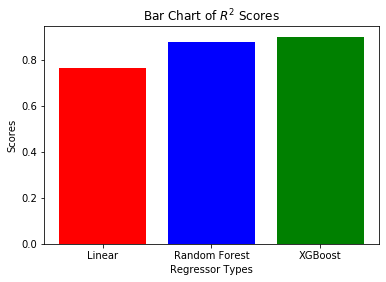

In [63]:
plt.bar(x = df_scores['Regression Model'], height=df_scores['R-squared score'], color=['red','blue','green','orange'])
plt.title('Bar Chart of $R^2$ Scores')
plt.ylabel('Scores')
plt.xlabel('Regressor Types')

The XGBoost Regression model produces the best results with a $\displaystyle R^2 score$ of 0.902, $\displaystyle Mean Squared Error$ of 12.297, and a $\displaystyle Mean Absolute Error$ of 1.574

#### The final dataset comparing the predictions with actual values:

| Car   Model                                                   	| Actual Price (₹ in Lacs) 	| Predicted Price   (₹ in Lacs) 	| Absolute   difference (₹ in Lacs) 	|
|---------------------------------------------------------------	|--------------------------	|-------------------------------	|-----------------------------------	|
| Mahindra   XUV500 W6 2WD                                      	| 7.25                     	| 7.56                          	| 0.31                              	|
| Maruti Swift   VDI BSIV W ABS                                 	| 4.25                     	| 3.21                          	| 1.04                              	|
| Volkswagen   Vento Petrol Highline                            	| 3.9                      	| 3.63                          	| 0.27                              	|
| Ford Endeavour   3.0L 4X4 AT                                  	| 8.41                     	| 13.56                         	| 5.15                              	|
| Toyota Innova   2.5 G (Diesel) 8 Seater                       	| 13.48                    	| 13.55                         	| 0.07                              	|
| Honda Brio S   MT                                             	| 4.25                     	| 3.63                          	| 0.62                              	|
| Ford Ecosport   1.5 Ti VCT MT Titanium                        	| 5.35                     	| 6.21                          	| 0.86                              	|
| Hyundai Santro   Xing XO eRLX Euro II                         	| 1.67                     	| 2.07                          	| 0.40                              	|
| Maruti Celerio   VXI AT                                       	| 3.75                     	| 4.16                          	| 0.41                              	|
| Hyundai Grand   i10 CRDi SportZ Edition                       	| 3.25                     	| 4.27                          	| 1.02                              	|
| Hyundai Verna   1.6 SX VTVT                                   	| 6.75                     	| 6.07                          	| 0.68                              	|
| Ford Classic   1.4 Duratorq Titanium                          	| 3                        	| 3.98                          	| 0.98                              	|
| Maruti Ritz   VDi                                             	| 3.52                     	| 4.36                          	| 0.84                              	|
| Mahindra   Scorpio VLX 4WD AIRBAG BSIV                        	| 5.21                     	| 5.50                          	| 0.29                              	|
| Skoda Fabia   1.2 MPI Classic                                 	| 1.4                      	| 2.19                          	| 0.79                              	|
| Maruti Baleno   RS 1.0 Petrol                                 	| 6.99                     	| 6.79                          	| 0.20                              	|
| Mahindra Xylo   D2 Maxx                                       	| 4.5                      	| 6.23                          	| 1.73                              	|
| Renault Duster   110PS Diesel RxZ                             	| 8.25                     	| 7.35                          	| 0.90                              	|
| Honda City V   MT AVN                                         	| 3.5                      	| 4.89                          	| 1.39                              	|
| Hyundai Getz   GLE                                            	| 1.75                     	| 2.03                          	| 0.28                              	|
| Hyundai Verna   1.6 SX VTVT                                   	| 6.5                      	| 8.70                          	| 2.20                              	|
| Hyundai i20   1.2 Magna                                       	| 2.25                     	| 1.98                          	| 0.27                              	|
| Toyota Corolla   H5                                           	| 2.2                      	| 2.20                          	| 0.00                              	|
| Maruti Swift   VDI                                            	| 4.3                      	| 5.04                          	| 0.74                              	|
| Volkswagen   Polo Petrol Highline 1.2L                        	| 4.65                     	| 3.94                          	| 0.71                              	|
| Hyundai EON   Era Plus                                        	| 3.84                     	| 2.43                          	| 1.41                              	|
| Audi Q7 45 TDI   Quattro Technology                           	| 68                       	| 46.96                         	| 21.04                             	|
| Hyundai Verna   1.6 SX CRDI (O) AT                            	| 8.31                     	| 8.40                          	| 0.09                              	|
| Mitsubishi   Pajero 2.8 SFX                                   	| 11.88                    	| 9.63                          	| 2.25                              	|
| Hyundai Verna   1.6 SX VTVT (O)                               	| 6.15                     	| 5.91                          	| 0.24                              	|
| Maruti Ciaz   VXi Plus                                        	| 7.47                     	| 8.11                          	| 0.64                              	|
| Hyundai i20   1.2 Spotz                                       	| 7.58                     	| 7.99                          	| 0.41                              	|
| Mercedes-Benz   SLC 43 AMG                                    	| 54                       	| 62.58                         	| 8.58                              	|
| Ford Figo   Diesel EXI Option                                 	| 3.12                     	| 3.09                          	| 0.03                              	|
| Hyundai Accent   GLS 1.6                                      	| 1.2                      	| 0.36                          	| 0.84                              	|
| Audi A6 35 TDI   Matrix                                       	| 39.84                    	| 36.24                         	| 3.60                              	|
| BMW X1   sDrive20d                                            	| 10.95                    	| 10.67                         	| 0.28                              	|
| Tata Tigor   1.05 Revotorq XZ Option                          	| 7.46                     	| 6.23                          	| 1.23                              	|
| Hyundai EON   Era Plus                                        	| 2.5                      	| 2.66                          	| 0.16                              	|
| Honda Civic   2006-2010 1.8 V MT                              	| 3.25                     	| 2.86                          	| 0.39                              	|
| Hyundai i20   Asta 1.4 CRDi                                   	| 6.5                      	| 6.04                          	| 0.46                              	|
| Skoda Rapid   1.6 MPI Active                                  	| 6.25                     	| 5.33                          	| 0.92                              	|
| Ford Ecosport   1.5 Ti VCT AT Titanium                        	| 6.25                     	| 6.82                          	| 0.57                              	|
| Honda City i   DTEC VX                                        	| 6.2                      	| 6.44                          	| 0.24                              	|
| Maruti Zen LXI                                                	| 1.25                     	| 1.08                          	| 0.17                              	|
| Ford EcoSport   1.5 TDCi Titanium                             	| 7.52                     	| 5.95                          	| 1.57                              	|
| Volkswagen   Polo GT TSI                                      	| 7.75                     	| 8.14                          	| 0.39                              	|
| Mahindra   XUV500 W6 2WD                                      	| 11.05                    	| 13.12                         	| 2.07                              	|
| Hyundai Verna   1.6 SX                                        	| 6.98                     	| 7.25                          	| 0.27                              	|
| BMW 5 Series   2010-2013 530d                                 	| 25.72                    	| 23.21                         	| 2.51                              	|
| Volkswagen   Vento 1.5 TDI Comfortline                        	| 4.75                     	| 6.17                          	| 1.42                              	|
| Maruti Swift   VDI                                            	| 3.95                     	| 4.19                          	| 0.24                              	|
| Volkswagen   Vento Diesel Comfortline                         	| 5.25                     	| 5.99                          	| 0.74                              	|
| Mahindra   XUV500 W10 AWD                                     	| 16                       	| 12.50                         	| 3.50                              	|
| BMW X6 xDrive   40d                                           	| 48                       	| 43.87                         	| 4.13                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 16.75                    	| 16.66                         	| 0.09                              	|
| Honda City ZX   GXi                                           	| 1.55                     	| 2.90                          	| 1.35                              	|
| Renault KWID   RXL                                            	| 3.46                     	| 3.31                          	| 0.15                              	|
| Hyundai i20   1.2 Magna                                       	| 1.9                      	| 2.22                          	| 0.32                              	|
| Maruti Zen   Estilo 1.1 LX BSIII                              	| 2.62                     	| 2.20                          	| 0.42                              	|
| Audi A6 35   TFSI Matrix                                      	| 41.5                     	| 29.58                         	| 11.92                             	|
| Skoda Rapid   1.6 MPI Elegance                                	| 7                        	| 4.69                          	| 2.31                              	|
| Hyundai EON   Magna                                           	| 2.85                     	| 3.18                          	| 0.33                              	|
| Land Rover   Freelander 2 TD4 SE                              	| 17.5                     	| 12.54                         	| 4.96                              	|
| Maruti Ritz   VDi                                             	| 5.05                     	| 4.80                          	| 0.25                              	|
| Hyundai EON D   Lite Plus                                     	| 1.95                     	| 1.88                          	| 0.07                              	|
| Volkswagen   Polo 1.2 MPI Trendline                           	| 4.63                     	| 4.68                          	| 0.05                              	|
| Hyundai Grand   i10 1.2 CRDi Sportz Option                    	| 5.75                     	| 5.90                          	| 0.15                              	|
| Maruti Ritz   LXi                                             	| 3.95                     	| 5.03                          	| 1.08                              	|
| Maruti Wagon R   LXI BS IV                                    	| 2.5                      	| 2.62                          	| 0.12                              	|
| Renault Duster   Petrol RxL                                   	| 6                        	| 4.68                          	| 1.32                              	|
| Maruti Zen LXi   - BS III                                     	| 1.25                     	| 1.37                          	| 0.12                              	|
| Hyundai Grand   i10 Asta Option                               	| 5                        	| 4.98                          	| 0.02                              	|
| Maruti Alto   K10 VXI                                         	| 3.6                      	| 3.99                          	| 0.39                              	|
| Tata Indigo CS   eVX                                          	| 2                        	| 2.23                          	| 0.23                              	|
| Hyundai Verna   1.6 SX CRDi (O)                               	| 7.83                     	| 11.07                         	| 3.24                              	|
| BMW X1 sDrive   20d xLine                                     	| 22.24                    	| 27.35                         	| 5.11                              	|
| Audi A6 2.7   TDI                                             	| 22.5                     	| 14.51                         	| 7.99                              	|
| Maruti Wagon R   CNG LXI                                      	| 2.96                     	| 2.97                          	| 0.01                              	|
| Hyundai Grand   i10 Asta Option                               	| 5.88                     	| 5.65                          	| 0.23                              	|
| Hyundai Grand   i10 1.2 Kappa Sportz                          	| 5.55                     	| 6.35                          	| 0.80                              	|
| Maruti Swift   VDI BSIV                                       	| 3.38                     	| 3.65                          	| 0.27                              	|
| Hyundai Verna   1.6 CRDI SX Option                            	| 14.28                    	| 11.62                         	| 2.66                              	|
| Skoda Superb   Style 1.8 TSI AT                               	| 7.25                     	| 10.70                         	| 3.45                              	|
| Toyota Innova   2.5 GX (Diesel) 7 Seater                      	| 12.5                     	| 10.50                         	| 2.00                              	|
| Volkswagen   Vento Diesel Highline                            	| 4.5                      	| 5.34                          	| 0.84                              	|
| Maruti Wagon R   LXI CNG                                      	| 3.77                     	| 3.41                          	| 0.36                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 10.5                     	| 9.75                          	| 0.75                              	|
| Skoda Rapid   1.6 TDI Elegance                                	| 5                        	| 5.10                          	| 0.10                              	|
| Maruti Ritz   VDI (ABS) BS IV                                 	| 4.9                      	| 4.79                          	| 0.11                              	|
| Maruti Wagon R   LXI BSIII                                    	| 2.2                      	| 1.56                          	| 0.64                              	|
| Mercedes-Benz   New C-Class C 220 CDI Elegance AT             	| 9.25                     	| 9.85                          	| 0.60                              	|
| Volkswagen   Polo 1.5 TDI Highline                            	| 6.9                      	| 7.99                          	| 1.09                              	|
| Tata Indica   GLS BS IV                                       	| 1.25                     	| 1.02                          	| 0.23                              	|
| Maruti Swift   VDI BSIV                                       	| 5.6                      	| 5.24                          	| 0.36                              	|
| Mercedes-Benz   E-Class 280 Elegance                          	| 7                        	| 7.45                          	| 0.45                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 13.49                    	| 14.57                         	| 1.08                              	|
| Hyundai i20   Asta Option 1.2                                 	| 6                        	| 5.76                          	| 0.24                              	|
| Maruti Swift   VXI Optional                                   	| 5.75                     	| 5.90                          	| 0.15                              	|
| Chevrolet   Spark 1.0 LT                                      	| 1.75                     	| 1.51                          	| 0.24                              	|
| Skoda Rapid   1.6 TDI Elegance                                	| 3                        	| 4.63                          	| 1.63                              	|
| Volkswagen   Vento Diesel Highline                            	| 5                        	| 3.96                          	| 1.04                              	|
| Honda Brio V   MT                                             	| 3.65                     	| 3.35                          	| 0.30                              	|
| Maruti Ciaz   VDi Plus                                        	| 6.5                      	| 6.51                          	| 0.01                              	|
| BMW 5 Series   525d Sedan                                     	| 26.5                     	| 26.13                         	| 0.37                              	|
| Hyundai Grand   i10 1.2 Kappa Sportz                          	| 6.03                     	| 6.19                          	| 0.16                              	|
| Maruti Wagon R   LXI BS IV                                    	| 2.3                      	| 1.95                          	| 0.35                              	|
| Nissan Terrano   XV 110 PS                                    	| 5                        	| 6.24                          	| 1.24                              	|
| Mahindra   XUV500 W8 2WD                                      	| 13.28                    	| 12.93                         	| 0.35                              	|
| BMW 5 Series   2003-2012 530d Highline                        	| 23.29                    	| 29.69                         	| 6.40                              	|
| Hyundai i20   1.4 CRDi Sportz                                 	| 4.11                     	| 4.50                          	| 0.39                              	|
| Honda City i   VTEC SV                                        	| 6.75                     	| 7.20                          	| 0.45                              	|
| Honda City i   DTEC V                                         	| 6.83                     	| 7.70                          	| 0.87                              	|
| BMW 3 Series   320d                                           	| 17.99                    	| 21.36                         	| 3.37                              	|
| Maruti Celerio   VXI                                          	| 4.9                      	| 4.11                          	| 0.79                              	|
| Toyota   Fortuner 4x2 Manual                                  	| 15.5                     	| 17.66                         	| 2.16                              	|
| Mahindra   Scorpio 2.6 DX                                     	| 1.94                     	| 4.75                          	| 2.81                              	|
| Honda City i   VTEC CVT VX                                    	| 9.6                      	| 8.44                          	| 1.16                              	|
| Maruti Baleno   Delta 1.3                                     	| 8.5                      	| 7.53                          	| 0.97                              	|
| Volkswagen   Polo Petrol Trendline 1.2L                       	| 3.95                     	| 4.66                          	| 0.71                              	|
| Hyundai Verna   Xi (Petrol)                                   	| 1.85                     	| 2.26                          	| 0.41                              	|
| Mercedes-Benz   CLA 200 CDI Sport                             	| 27.87                    	| 28.38                         	| 0.51                              	|
| Mercedes-Benz   M-Class ML 250 CDI                            	| 35                       	| 41.23                         	| 6.23                              	|
| Audi Q5 30 TDI   quattro Premium Plus                         	| 39                       	| 30.64                         	| 8.36                              	|
| Hyundai Creta   1.6 SX                                        	| 8                        	| 9.73                          	| 1.73                              	|
| Hyundai Xcent   1.1 CRDi Base                                 	| 3.9                      	| 4.80                          	| 0.90                              	|
| Maruti Swift   VDI Optional                                   	| 7.05                     	| 7.48                          	| 0.43                              	|
| Maruti Baleno   Zeta 1.2                                      	| 7                        	| 6.92                          	| 0.08                              	|
| Hyundai Grand   i10 CRDi Sportz                               	| 4.15                     	| 3.85                          	| 0.30                              	|
| Tata Indigo   eCS LX BSIV                                     	| 2.3                      	| 2.55                          	| 0.25                              	|
| Maruti Baleno   Delta Automatic                               	| 6.2                      	| 7.10                          	| 0.90                              	|
| Skoda Laura RS                                                	| 4.75                     	| 5.02                          	| 0.27                              	|
| BMW X5 xDrive   30d                                           	| 21                       	| 28.74                         	| 7.74                              	|
| Hyundai i10   Sportz                                          	| 3.09                     	| 3.12                          	| 0.03                              	|
| BMW X5   2014-2019 xDrive 30d Design Pure Experience 7 Seater 	| 41.5                     	| 39.98                         	| 1.52                              	|
| Volkswagen   Vento Petrol Highline                            	| 3.33                     	| 2.81                          	| 0.52                              	|
| Maruti Baleno   RS 1.0 Petrol                                 	| 6.95                     	| 6.49                          	| 0.46                              	|
| Hyundai i20   Asta Option 1.2                                 	| 7.14                     	| 5.93                          	| 1.21                              	|
| Skoda Laura L   n K 1.9 PD AT                                 	| 4.8                      	| 6.05                          	| 1.25                              	|
| Hyundai i10   Era                                             	| 2.25                     	| 2.11                          	| 0.14                              	|
| Honda City i   DTec V                                         	| 7.75                     	| 8.52                          	| 0.77                              	|
| Chevrolet Beat   Diesel PS                                    	| 2.4                      	| 2.31                          	| 0.09                              	|
| Skoda Superb   Elegance 1.8 TSI AT                            	| 11.6                     	| 12.57                         	| 0.97                              	|
| Hyundai i20   Active 1.2 SX Dual Tone                         	| 7.25                     	| 6.11                          	| 1.14                              	|
| BMW X1   sDrive20d                                            	| 18.5                     	| 17.64                         	| 0.86                              	|
| Mitsubishi   Pajero 2.8 SFX                                   	| 11                       	| 10.59                         	| 0.41                              	|
| Ford Figo   Diesel EXI                                        	| 2.55                     	| 4.08                          	| 1.53                              	|
| Honda Amaze EX   i-Dtech                                      	| 4.7                      	| 4.64                          	| 0.06                              	|
| Datsun Redi GO   Sport                                        	| 3.1                      	| 3.18                          	| 0.08                              	|
| Jeep Compass   2.0 Limited 4X4                                	| 23.91                    	| 25.45                         	| 1.54                              	|
| Maruti Swift   Dzire AMT ZDI                                  	| 6.75                     	| 7.23                          	| 0.48                              	|
| Hyundai Creta   1.4 CRDi S Plus                               	| 10.25                    	| 8.15                          	| 2.10                              	|
| Mahindra   XUV500 W4                                          	| 9.25                     	| 12.25                         	| 3.00                              	|
| Maruti Celerio   VXI AT                                       	| 4.35                     	| 4.33                          	| 0.02                              	|
| Maruti Swift   VVT VXI                                        	| 5.43                     	| 5.32                          	| 0.11                              	|
| Honda City i   DTEC SV                                        	| 5.5                      	| 5.04                          	| 0.46                              	|
| Fiat Avventura   MULTIJET Emotion                             	| 7.71                     	| 9.49                          	| 1.78                              	|
| Honda Jazz   Exclusive CVT                                    	| 8.25                     	| 8.71                          	| 0.46                              	|
| Hyundai i20   Asta Option 1.2                                 	| 5.5                      	| 5.55                          	| 0.05                              	|
| Mahindra   Bolero DI BSII                                     	| 2.9                      	| 4.14                          	| 1.24                              	|
| Honda City i   VTEC CVT VX                                    	| 9.1                      	| 7.91                          	| 1.19                              	|
| Maruti Wagon R   VXI BS IV                                    	| 3.1                      	| 2.63                          	| 0.47                              	|
| Volkswagen   Polo Petrol Trendline 1.2L                       	| 4.4                      	| 3.91                          	| 0.49                              	|
| Hyundai i10   Magna 1.1                                       	| 4.09                     	| 4.12                          	| 0.03                              	|
| Mercedes-Benz   New C-Class C 220 CDI BE Avantgare            	| 19.25                    	| 19.05                         	| 0.20                              	|
| BMW X1 sDrive   18i                                           	| 9.5                      	| 10.74                         	| 1.24                              	|
| Hyundai i20   Magna 1.4 CRDi (Diesel)                         	| 3.45                     	| 4.71                          	| 1.26                              	|
| Hyundai Santro   Xing GL                                      	| 1.15                     	| 9.83                          	| 8.68                              	|
| Toyota Corolla   Altis 1.8 Limited Edition                    	| 8.95                     	| 8.04                          	| 0.91                              	|
| Maruti Eeco   CNG 5 Seater AC                                 	| 3.72                     	| 3.37                          	| 0.35                              	|
| Chevrolet Aveo   1.4 LS                                       	| 1.4                      	| 1.21                          	| 0.19                              	|
| Land Rover   Freelander 2 TD4 SE                              	| 16.5                     	| 13.07                         	| 3.43                              	|
| Maruti Wagon R   AMT VXI                                      	| 4.22                     	| 3.91                          	| 0.31                              	|
| Mercedes-Benz   GLA Class 200 CDI SPORT                       	| 20.99                    	| 19.71                         	| 1.28                              	|
| Audi Q7 35 TDI   Quattro Premium Plus                         	| 39                       	| 45.15                         	| 6.15                              	|
| Mercedes-Benz   M-Class ML 250 CDI                            	| 30                       	| 32.89                         	| 2.89                              	|
| Hyundai i20   1.2 Sportz Option                               	| 3.25                     	| 3.60                          	| 0.35                              	|
| Ford Ikon 1.6   CLXI                                          	| 0.85                     	| 1.08                          	| 0.23                              	|
| Renault KWID   1.0 RXT Optional                               	| 3.25                     	| 3.64                          	| 0.39                              	|
| Hyundai i20   Sportz AT 1.4                                   	| 5.96                     	| 5.70                          	| 0.26                              	|
| Volvo V40   Cross Country D3                                  	| 16                       	| 13.86                         	| 2.14                              	|
| Honda Jazz 1.5   V i DTEC                                     	| 5.5                      	| 7.11                          	| 1.61                              	|
| Skoda Octavia   Elegance 1.8 TSI AT                           	| 10                       	| 12.20                         	| 2.20                              	|
| Hyundai i20   1.2 Sportz                                      	| 2.8                      	| 3.07                          	| 0.27                              	|
| Ford Ikon 1.3   Flair                                         	| 0.69                     	| 1.36                          	| 0.67                              	|
| Honda City 1.5   V MT                                         	| 3.5                      	| 3.09                          	| 0.41                              	|
| Maruti Alto   800 LXI                                         	| 3.01                     	| 2.83                          	| 0.18                              	|
| Honda Jazz   Mode                                             	| 2.35                     	| 2.64                          	| 0.29                              	|
| Hyundai Xcent   1.2 CRDi E Plus                               	| 5.49                     	| 5.31                          	| 0.18                              	|
| BMW 5 Series   2013-2017 520d Luxury Line                     	| 23                       	| 28.00                         	| 5.00                              	|
| Maruti Swift   VDI BSIV W ABS                                 	| 5.95                     	| 6.48                          	| 0.53                              	|
| Maruti Wagon R   VXI BS IV with ABS                           	| 3.35                     	| 2.91                          	| 0.44                              	|
| Hyundai Grand   i10 AT Asta                                   	| 6.3                      	| 6.16                          	| 0.14                              	|
| Hyundai Elite   i20 Asta Option                               	| 8.78                     	| 8.06                          	| 0.72                              	|
| Ford Ecosport   1.5 DV5 MT Titanium                           	| 6.25                     	| 6.54                          	| 0.29                              	|
| Toyota Corolla   Altis 2008-2013 1.8 VL AT                    	| 14.14                    	| 13.04                         	| 1.10                              	|
| Maruti Wagon R   LX                                           	| 1                        	| 1.03                          	| 0.03                              	|
| Maruti Alto   800 LXI                                         	| 2.75                     	| 2.91                          	| 0.16                              	|
| Fiat Linea T   Jet                                            	| 2.98                     	| 5.35                          	| 2.37                              	|
| Audi A4 2.0   TDI 177 Bhp Premium Plus                        	| 22                       	| 20.21                         	| 1.79                              	|
| Hyundai i10   Magna                                           	| 2.65                     	| 2.91                          	| 0.26                              	|
| Toyota Innova   2.5 ZX Diesel 7 Seater BSIII                  	| 12.75                    	| 12.07                         	| 0.68                              	|
| Hyundai Verna   1.6 SX VTVT (O)                               	| 5.85                     	| 5.58                          	| 0.27                              	|
| Hyundai Getz   GLS                                            	| 0.45                     	| 1.13                          	| 0.68                              	|
| Maruti SX4 S   Cross DDiS 200 Zeta                            	| 8.85                     	| 7.72                          	| 1.13                              	|
| Maruti Ertiga   VDI                                           	| 7.56                     	| 6.59                          	| 0.97                              	|
| Honda Amaze E   i-Vtech                                       	| 6.14                     	| 5.52                          	| 0.62                              	|
| Honda City i   VTEC VX Option                                 	| 11.25                    	| 9.28                          	| 1.97                              	|
| Maruti Swift   VXi BSIV                                       	| 4.75                     	| 4.97                          	| 0.22                              	|
| Honda Jazz V                                                  	| 6.3                      	| 5.32                          	| 0.98                              	|
| Hyundai EON   Era                                             	| 3.21                     	| 3.54                          	| 0.33                              	|
| Mercedes-Benz   New C-Class C 250 CDI Elegance                	| 17.25                    	| 13.11                         	| 4.14                              	|
| Mahindra   Scorpio VLX                                        	| 4.75                     	| 4.93                          	| 0.18                              	|
| Jaguar XF   Diesel                                            	| 36.15                    	| 45.13                         	| 8.98                              	|
| Jaguar XF 2.2   Litre Luxury                                  	| 30.54                    	| 33.39                         	| 2.85                              	|
| Hyundai Grand   i10 1.2 Kappa Sportz                          	| 5.85                     	| 6.10                          	| 0.25                              	|
| Maruti Zen   Estilo LXI BSIII                                 	| 1.25                     	| 1.84                          	| 0.59                              	|
| Honda Amaze S   i-Dtech                                       	| 4.45                     	| 5.12                          	| 0.67                              	|
| Audi Q5   2008-2012 2.0 TFSI Quattro                          	| 18                       	| 15.26                         	| 2.74                              	|
| Mahindra   XUV300 W8 Diesel                                   	| 7.25                     	| 6.50                          	| 0.75                              	|
| Honda City i   VTEC CVT VX                                    	| 12.08                    	| 9.83                          	| 2.25                              	|
| Mitsubishi   Pajero Sport 4X4                                 	| 15                       	| 13.64                         	| 1.36                              	|
| Mercedes-Benz   New C-Class C 220d Avantgarde Edition C       	| 38.5                     	| 36.16                         	| 2.34                              	|
| Ford EcoSport   1.5 Diesel Titanium Plus                      	| 7.7                      	| 7.87                          	| 0.17                              	|
| Hyundai Sonata   Transform 2.4 GDi AT                         	| 6                        	| 14.76                         	| 8.76                              	|
| Land Rover   Discovery SE 3.0 TD6                             	| 36.75                    	| 49.03                         	| 12.28                             	|
| Audi A4 2.0   TDI 177 Bhp Technology Edition                  	| 26                       	| 22.24                         	| 3.76                              	|
| Maruti Swift   1.3 ZXI                                        	| 5.8                      	| 5.76                          	| 0.04                              	|
| Honda City 1.5   V MT                                         	| 3.26                     	| 3.05                          	| 0.21                              	|
| Renault KWID   Climber 1.0 MT                                 	| 4.8                      	| 4.82                          	| 0.02                              	|
| Ford Figo 1.5D   Trend MT                                     	| 4.5                      	| 5.32                          	| 0.82                              	|
| Honda Jazz 1.2   VX i VTEC                                    	| 5.95                     	| 6.15                          	| 0.20                              	|
| Audi Q7 3.0   TDI quattro                                     	| 28.55                    	| 28.72                         	| 0.17                              	|
| Hyundai i20   Asta 1.4 CRDi                                   	| 6.98                     	| 5.98                          	| 1.00                              	|
| Hyundai i20   2015-2017 1.4 Magna ABS                         	| 4.25                     	| 4.00                          	| 0.25                              	|
| Ford Ikon 1.3   Flair                                         	| 1.6                      	| 1.44                          	| 0.16                              	|
| Honda Amaze S   i-Dtech                                       	| 4.35                     	| 4.70                          	| 0.35                              	|
| Tata Indigo LS                                                	| 1                        	| 0.69                          	| 0.31                              	|
| Volkswagen   Jetta 2013-2015 2.0L TDI Highline AT             	| 13.83                    	| 17.24                         	| 3.41                              	|
| Maruti Ertiga   ZDI                                           	| 6.75                     	| 5.12                          	| 1.63                              	|
| Hyundai EON   Era Plus                                        	| 2.6                      	| 2.04                          	| 0.56                              	|
| Ford Figo   Diesel Titanium                                   	| 2.95                     	| 2.87                          	| 0.08                              	|
| Maruti Omni   MPI CARGO BSIII W/ IMMOBILISER                  	| 1.85                     	| 1.74                          	| 0.11                              	|
| Ford Figo   Diesel Titanium                                   	| 5.65                     	| 3.89                          	| 1.76                              	|
| Renault KWID   RXT                                            	| 3                        	| 2.86                          	| 0.14                              	|
| Skoda Rapid   1.6 MPI Ambition Plus                           	| 5.09                     	| 5.00                          	| 0.09                              	|
| Ford Figo   Petrol ZXI                                        	| 2.25                     	| 2.36                          	| 0.11                              	|
| Hyundai EON   Era Plus                                        	| 1.99                     	| 1.53                          	| 0.46                              	|
| Ford Fiesta   1.6 SXI ABS Duratec                             	| 2.5                      	| 2.33                          	| 0.17                              	|
| Toyota Etios   Cross 1.4 GD                                   	| 6.85                     	| 7.46                          	| 0.61                              	|
| Audi Q5 2.0   TDI                                             	| 21.5                     	| 22.17                         	| 0.67                              	|
| Volkswagen   Polo 1.5 TDI Trendline                           	| 3.95                     	| 5.45                          	| 1.50                              	|
| Mercedes-Benz   S-Class S 350 d                               	| 30                       	| 27.57                         	| 2.43                              	|
| Maruti Ertiga   VXI CNG                                       	| 5.8                      	| 4.48                          	| 1.32                              	|
| Ford Endeavour   3.2 Trend AT 4X4                             	| 26.5                     	| 31.49                         	| 4.99                              	|
| Volkswagen   Polo IPL II 1.2 Petrol Highline                  	| 2.96                     	| 2.44                          	| 0.52                              	|
| Hyundai i20   1.4 Asta CRDi with AVN                          	| 4                        	| 4.49                          	| 0.49                              	|
| Hyundai i20   1.4 CRDi Sportz                                 	| 4.5                      	| 6.11                          	| 1.61                              	|
| Volkswagen   Polo Diesel Trendline 1.2L                       	| 3.9                      	| 3.59                          	| 0.31                              	|
| Maruti Wagon R   LXI BS IV                                    	| 2.3                      	| 2.06                          	| 0.24                              	|
| Honda City i   DTEC VX                                        	| 7.25                     	| 6.61                          	| 0.64                              	|
| Maruti Ritz   ZXI                                             	| 6.17                     	| 6.15                          	| 0.02                              	|
| Ford Ecosport   1.5 DV5 MT Titanium                           	| 4.9                      	| 4.38                          	| 0.52                              	|
| Land Rover   Range Rover HSE Dynamic                          	| 44                       	| 44.48                         	| 0.48                              	|
| Maruti Ertiga   ZDI                                           	| 8.25                     	| 7.06                          	| 1.19                              	|
| Volkswagen   CrossPolo 1.5 TDI                                	| 5.7                      	| 5.59                          	| 0.11                              	|
| Hyundai EON   Sportz                                          	| 3.95                     	| 3.89                          	| 0.06                              	|
| Honda City ZX   CVT                                           	| 1.5                      	| 1.94                          	| 0.44                              	|
| Fiat Punto 1.4   Emotion                                      	| 1.49                     	| 0.78                          	| 0.71                              	|
| Maruti Ciaz   VDI SHVS                                        	| 7.9                      	| 7.43                          	| 0.47                              	|
| Chevrolet Beat   Diesel LT                                    	| 2.7                      	| 2.37                          	| 0.33                              	|
| Land Rover   Discovery Sport TD4 HSE 7S                       	| 41.5                     	| 34.55                         	| 6.95                              	|
| Hyundai Grand   i10 Sportz                                    	| 5.04                     	| 4.92                          	| 0.12                              	|
| Hyundai i10   Magna 1.2                                       	| 2.65                     	| 2.89                          	| 0.24                              	|
| Hyundai Verna   SX CRDi AT                                    	| 6.5                      	| 6.31                          	| 0.19                              	|
| Maruti Wagon R   VXI BS IV                                    	| 4.45                     	| 3.41                          	| 1.04                              	|
| Maruti Swift   VDI BSIV                                       	| 4.1                      	| 4.92                          	| 0.82                              	|
| Toyota Innova   2.5 GX 7 STR BSIV                             	| 6.95                     	| 9.19                          	| 2.24                              	|
| BMW 6 Series   640d Coupe                                     	| 45                       	| 48.43                         	| 3.43                              	|
| Renault KWID   RXT Optional                                   	| 4.45                     	| 3.85                          	| 0.60                              	|
| Maruti Swift   Dzire LDI                                      	| 4.5                      	| 5.67                          	| 1.17                              	|
| Maruti Swift   ZDi                                            	| 4.75                     	| 4.40                          	| 0.35                              	|
| Skoda Rapid   Ultima 1.6 TDI Elegance                         	| 8                        	| 5.14                          	| 2.86                              	|
| Audi A4 2.0   TDI                                             	| 14.5                     	| 15.26                         	| 0.76                              	|
| Audi Q7 3.0   TDI quattro                                     	| 31.41                    	| 33.51                         	| 2.10                              	|
| Toyota Innova   2.5 V Diesel 7-seater                         	| 4                        	| 4.93                          	| 0.93                              	|
| Maruti Alto   K10 VXI                                         	| 3.22                     	| 2.98                          	| 0.24                              	|
| Land Rover   Discovery 4 TDV6 SE                              	| 34                       	| 22.99                         	| 11.01                             	|
| Mercedes-Benz   E-Class 280 CDI                               	| 11                       	| 9.48                          	| 1.52                              	|
| Maruti Wagon R   VXI BS IV                                    	| 3.1                      	| 3.34                          	| 0.24                              	|
| Honda City i   VTEC V                                         	| 7                        	| 6.74                          	| 0.26                              	|
| Maruti Baleno   Delta 1.2                                     	| 5.45                     	| 5.56                          	| 0.11                              	|
| BMW 5 Series   520d Luxury Line                               	| 17.5                     	| 17.23                         	| 0.27                              	|
| Volkswagen   Polo 1.5 TDI Highline                            	| 5.11                     	| 5.96                          	| 0.85                              	|
| Toyota Etios   VD                                             	| 5.75                     	| 4.66                          	| 1.09                              	|
| Ford Ecosport   1.0 Ecoboost Platinum Edition                 	| 8                        	| 9.00                          	| 1.00                              	|
| Tata New   Safari DICOR 2.2 EX 4x4 BS IV                      	| 3.75                     	| 4.11                          	| 0.36                              	|
| Volvo V40 D3 R   Design                                       	| 24                       	| 20.34                         	| 3.66                              	|
| Land Rover   Range Rover Vogue SE 4.4 SDV8                    	| 65                       	| 69.02                         	| 4.02                              	|
| Honda Civic   2006-2010 1.8 V AT                              	| 3                        	| 3.30                          	| 0.30                              	|
| BMW 5 Series   2010-2013 525i                                 	| 11                       	| 7.64                          	| 3.36                              	|
| Maruti Wagon R   LXI                                          	| 2.45                     	| 3.60                          	| 1.15                              	|
| Mercedes-Benz   New C-Class C 200 Kompressor Elegance MT      	| 10                       	| 11.52                         	| 1.52                              	|
| Hyundai Creta   1.6 CRDi SX                                   	| 12.9                     	| 13.05                         	| 0.15                              	|
| Renault Duster   110PS Diesel RxZ                             	| 6.1                      	| 5.76                          	| 0.34                              	|
| Ford EcoSport   1.5 Ti VCT AT Titanium                        	| 8.3                      	| 6.83                          	| 1.47                              	|
| Toyota   Fortuner 4x2 AT                                      	| 17.75                    	| 18.48                         	| 0.73                              	|
| Ford Fiesta   1.6 ZXi ABS                                     	| 1.65                     	| 1.93                          	| 0.28                              	|
| Toyota Camry   W4 (AT)                                        	| 4.5                      	| 6.04                          	| 1.54                              	|
| Ford Ecosport   1.5 DV5 MT Titanium Optional                  	| 7.34                     	| 6.13                          	| 1.21                              	|
| Maruti Ritz   VDi                                             	| 3.65                     	| 3.39                          	| 0.26                              	|
| Mahindra   XUV500 W8 2WD                                      	| 7.25                     	| 7.97                          	| 0.72                              	|
| Maruti Vitara   Brezza VDi Option                             	| 9.4                      	| 9.89                          	| 0.49                              	|
| BMW 3 Series   320d Luxury Line                               	| 21                       	| 28.02                         	| 7.02                              	|
| Land Rover   Range Rover 3.0 D                                	| 16.11                    	| 10.61                         	| 5.50                              	|
| Toyota Etios G                                                	| 4.57                     	| 3.56                          	| 1.01                              	|
| Renault Duster   85PS Diesel RxL Optional with Nav            	| 4.25                     	| 4.68                          	| 0.43                              	|
| Honda City i   VTEC SV                                        	| 7                        	| 8.19                          	| 1.19                              	|
| Audi Q3 35 TDI   Quattro Premium Plus                         	| 31.93                    	| 32.01                         	| 0.08                              	|
| Maruti Alto   K10 LXI                                         	| 2.1                      	| 2.27                          	| 0.17                              	|
| BMW 3 Series   320d                                           	| 10.69                    	| 10.23                         	| 0.46                              	|
| Honda Brio S   Option MT                                      	| 2.75                     	| 2.97                          	| 0.22                              	|
| Mahindra KUV   100 mFALCON D75 K8 Dual Tone                   	| 5.58                     	| 6.67                          	| 1.09                              	|
| Hyundai i10   Asta AT                                         	| 3.45                     	| 3.23                          	| 0.22                              	|
| Maruti Ritz   LDi                                             	| 3.65                     	| 4.85                          	| 1.20                              	|
| Mercedes-Benz   GLC 220d Celebration Edition                  	| 40.47                    	| 41.01                         	| 0.54                              	|
| Hyundai Verna   1.6 VTVT S                                    	| 7.5                      	| 6.59                          	| 0.91                              	|
| Maruti Baleno   Alpha CVT                                     	| 8.85                     	| 8.31                          	| 0.54                              	|
| Maruti Ertiga   ZXI                                           	| 6.75                     	| 5.84                          	| 0.91                              	|
| Hyundai i10   Magna 1.1                                       	| 2.9                      	| 3.02                          	| 0.12                              	|
| Skoda Superb   Elegance 1.8 TSI AT                            	| 13.65                    	| 12.77                         	| 0.88                              	|
| Hyundai Santro   GLS II - Euro II                             	| 3.25                     	| 13.29                         	| 10.04                             	|
| Maruti Swift   VDI                                            	| 5.36                     	| 5.21                          	| 0.15                              	|
| Hyundai Grand   i10 Sportz                                    	| 6.19                     	| 6.28                          	| 0.09                              	|
| Porsche   Cayenne Turbo S                                     	| 32                       	| 53.87                         	| 21.87                             	|
| Maruti Alto   800 LXI                                         	| 2.45                     	| 2.54                          	| 0.09                              	|
| BMW 3 Series   320d Sport                                     	| 21.6                     	| 22.32                         	| 0.72                              	|
| Toyota Etios   VD SP                                          	| 6.5                      	| 7.28                          	| 0.78                              	|
| Mahindra   Scorpio VLX                                        	| 5.5                      	| 5.31                          	| 0.19                              	|
| Chevrolet Beat   Diesel PS                                    	| 1.55                     	| 2.50                          	| 0.95                              	|
| Hyundai i20   1.2 Spotz                                       	| 5.95                     	| 6.68                          	| 0.73                              	|
| Toyota   Fortuner 4x2 Manual                                  	| 18.75                    	| 22.17                         	| 3.42                              	|
| Hyundai Verna   1.6 SX VTVT                                   	| 7.99                     	| 8.96                          	| 0.97                              	|
| Mahindra   XUV500 W8 2WD                                      	| 6.25                     	| 7.21                          	| 0.96                              	|
| Honda Jazz 1.2   V CVT i VTEC                                 	| 9.15                     	| 8.85                          	| 0.30                              	|
| Hyundai i20   Asta 1.4 CRDi                                   	| 7.3                      	| 7.11                          	| 0.19                              	|
| Maruti Celerio   VXI AT                                       	| 3.9                      	| 4.38                          	| 0.48                              	|
| Hyundai Grand   i10 1.2 Kappa Sportz                          	| 5.07                     	| 5.08                          	| 0.01                              	|
| Hyundai Creta   1.6 CRDi SX                                   	| 12                       	| 12.68                         	| 0.68                              	|
| Nissan Terrano   XL Plus 85 PS                                	| 5.75                     	| 4.41                          	| 1.34                              	|
| Toyota Innova   Crysta 2.4 VX MT 8S                           	| 21.42                    	| 26.62                         	| 5.20                              	|
| Toyota   Fortuner 4x2 4 Speed AT                              	| 14.4                     	| 15.46                         	| 1.06                              	|
| Maruti Wagon R   LX BSIII                                     	| 0.75                     	| 1.42                          	| 0.67                              	|
| Ford Aspire   Titanium Plus Diesel                            	| 8.41                     	| 6.41                          	| 2.00                              	|
| Hyundai i20   Asta (o) 1.4 CRDi (Diesel)                      	| 5.85                     	| 5.57                          	| 0.28                              	|
| Hyundai Verna   XXi ABS (Petrol)                              	| 2.6                      	| 2.70                          	| 0.10                              	|
| Maruti Alto   LXi                                             	| 1.5                      	| 1.69                          	| 0.19                              	|
| Volkswagen   Vento Diesel Trendline                           	| 4                        	| 3.25                          	| 0.75                              	|
| Maruti Zen VX                                                 	| 0.77                     	| 0.87                          	| 0.10                              	|
| Maruti Vitara   Brezza ZDi                                    	| 8.75                     	| 9.10                          	| 0.35                              	|
| Maruti Wagon R   VXI                                          	| 2.65                     	| 2.30                          	| 0.35                              	|
| Maruti Ertiga   VXI                                           	| 5.6                      	| 5.42                          	| 0.18                              	|
| Maruti Swift   Dzire VXI                                      	| 6.26                     	| 5.78                          	| 0.48                              	|
| Hyundai i20   1.2 Sportz                                      	| 5.25                     	| 4.42                          	| 0.83                              	|
| Renault   Fluence Diesel E4                                   	| 4.61                     	| 3.71                          	| 0.90                              	|
| Audi TT 2.0   TFSI                                            	| 29.5                     	| 25.32                         	| 4.18                              	|
| Hyundai i10   Sportz                                          	| 2.9                      	| 2.63                          	| 0.27                              	|
| Hyundai Elite   i20 Petrol Asta                               	| 7.93                     	| 6.99                          	| 0.94                              	|
| Mercedes-Benz   E-Class E270 CDI                              	| 10                       	| 12.32                         	| 2.32                              	|
| Hyundai i20   Magna Optional 1.4 CRDi                         	| 3.11                     	| 3.28                          	| 0.17                              	|
| Volkswagen   Vento Sport 1.2 TSI AT                           	| 5.95                     	| 5.72                          	| 0.23                              	|
| Hyundai i20   Magna 1.2                                       	| 5.5                      	| 5.40                          	| 0.10                              	|
| Mercedes-Benz   E-Class E250 CDI Avantgrade                   	| 21.8                     	| 26.46                         	| 4.66                              	|
| Hyundai Grand   i10 1.2 Kappa Sportz                          	| 5.87                     	| 6.47                          	| 0.60                              	|
| Tata Indigo LX                                                	| 2.58                     	| 4.04                          	| 1.46                              	|
| Maruti Swift   Vdi BSIII                                      	| 4.5                      	| 3.85                          	| 0.65                              	|
| Hyundai i10   Era 1.1 iTech SE                                	| 1.9                      	| 1.99                          	| 0.09                              	|
| Maruti Ertiga   SHVS VDI                                      	| 8.1                      	| 8.08                          	| 0.02                              	|
| Fiat Linea 1.3   Emotion                                      	| 5.85                     	| 7.02                          	| 1.17                              	|
| Maruti Swift   Dzire VDi                                      	| 3.65                     	| 3.36                          	| 0.29                              	|
| Hyundai Verna   1.6 SX VTVT                                   	| 4                        	| 3.70                          	| 0.30                              	|
| Hyundai Verna   1.6 SX VTVT                                   	| 5.75                     	| 6.12                          	| 0.37                              	|
| Mercedes-Benz   GLC 220                                       	| 43.3                     	| 39.60                         	| 3.70                              	|
| Hyundai Verna   Transform VTVT                                	| 2.5                      	| 2.64                          	| 0.14                              	|
| Hyundai Santro   GLS I - Euro I                               	| 3.35                     	| 11.83                         	| 8.48                              	|
| Hyundai i10   Magna 1.2                                       	| 3.42                     	| 3.37                          	| 0.05                              	|
| Toyota Corolla   Altis 2008-2013 1.8 VL AT                    	| 3.95                     	| 5.04                          	| 1.09                              	|
| Honda City 1.5   V AT                                         	| 2.85                     	| 4.09                          	| 1.24                              	|
| Mercedes-Benz   S Class 2005 2013 S 350 CDI                   	| 21                       	| 29.77                         	| 8.77                              	|
| Mahindra Xylo   E4                                            	| 3.75                     	| 2.99                          	| 0.76                              	|
| BMW 6 Series   Gran Coupe                                     	| 68.94                    	| 61.61                         	| 7.33                              	|
| Hyundai EON D   Lite Plus                                     	| 3.65                     	| 2.38                          	| 1.27                              	|
| Renault Duster   85PS Diesel RxL Option                       	| 5.25                     	| 4.80                          	| 0.45                              	|
| Honda Mobilio   S i DTEC                                      	| 6.68                     	| 8.42                          	| 1.74                              	|
| Maruti Swift   VDI BSIV                                       	| 4.75                     	| 5.23                          	| 0.48                              	|
| Volkswagen   Vento Diesel Comfortline                         	| 4.89                     	| 5.33                          	| 0.44                              	|
| Renault Duster   85PS Diesel RxL Explore                      	| 7.8                      	| 6.64                          	| 1.16                              	|
| Hyundai   Elantra CRDi SX AT                                  	| 8.5                      	| 8.31                          	| 0.19                              	|
| Jeep Compass   2.0 Sport                                      	| 15                       	| 15.50                         	| 0.50                              	|
| Maruti Ciaz AT   ZXi                                          	| 6.95                     	| 6.98                          	| 0.03                              	|
| Toyota Innova   2.5 G (Diesel) 7 Seater BS IV                 	| 9.45                     	| 12.03                         	| 2.58                              	|
| Hyundai i10   Era 1.1 iTech SE                                	| 2.97                     	| 2.74                          	| 0.23                              	|
| Skoda Laura   Elegance MT                                     	| 4.25                     	| 3.89                          	| 0.36                              	|
| Honda City   i-VTEC CVT VX                                    	| 11.97                    	| 10.39                         	| 1.58                              	|
| Maruti Swift   Dzire ZDI                                      	| 4.25                     	| 4.27                          	| 0.02                              	|
| Maruti Ertiga   ZDI                                           	| 6.56                     	| 5.93                          	| 0.63                              	|
| Toyota Innova   2.5 G (Diesel) 7 Seater BS IV                 	| 5                        	| 6.24                          	| 1.24                              	|
| Hyundai i10   Sportz AT                                       	| 5.08                     	| 5.18                          	| 0.10                              	|
| Honda CR-V AT   With Sun Roof                                 	| 11.99                    	| 6.79                          	| 5.20                              	|
| Maruti Swift   Dzire 1.2 Vxi BSIV                             	| 3.25                     	| 3.54                          	| 0.29                              	|
| Maruti SX4 Vxi   BSIII                                        	| 2.15                     	| 1.78                          	| 0.37                              	|
| BMW X6 xDrive   40d M Sport                                   	| 85                       	| 48.86                         	| 36.14                             	|
| Maruti Swift   Dzire 1.2 Lxi BSIV                             	| 3.2                      	| 3.71                          	| 0.51                              	|
| Maruti S Cross   DDiS 200 Delta                               	| 7.99                     	| 7.02                          	| 0.97                              	|
| Honda Amaze EX   i-Dtech                                      	| 4                        	| 3.89                          	| 0.11                              	|
| Tata Nano CX                                                  	| 1.26                     	| 1.62                          	| 0.36                              	|
| Honda City i   DTEC S                                         	| 5.7                      	| 5.96                          	| 0.26                              	|
| Honda City 1.5   S MT                                         	| 3.1                      	| 3.39                          	| 0.29                              	|
| Mahindra   Scorpio S6 Plus 7 Seater                           	| 9.75                     	| 10.39                         	| 0.64                              	|
| Maruti Swift   Dzire VXI                                      	| 3.99                     	| 3.76                          	| 0.23                              	|
| Maruti Dzire   LDI                                            	| 6                        	| 6.69                          	| 0.69                              	|
| Toyota Innova   Crysta 2.4 VX MT                              	| 17.11                    	| 16.33                         	| 0.78                              	|
| Hyundai i20   Sportz 1.2                                      	| 5.75                     	| 6.10                          	| 0.35                              	|
| BMW 5 Series   530d Highline Sedan                            	| 18                       	| 20.79                         	| 2.79                              	|
| Ford Figo   Diesel ZXI                                        	| 3.56                     	| 4.90                          	| 1.34                              	|
| Volkswagen   Vento Petrol Highline                            	| 3.35                     	| 2.86                          	| 0.49                              	|
| Hyundai Verna   1.6 i ABS                                     	| 1.95                     	| 1.34                          	| 0.61                              	|
| Honda City   i-VTEC V                                         	| 10.07                    	| 9.38                          	| 0.69                              	|
| Volkswagen   Polo 1.2 MPI Comfortline                         	| 3.3                      	| 3.94                          	| 0.64                              	|
| Hyundai i20   Magna 1.4 CRDi                                  	| 4.25                     	| 5.08                          	| 0.83                              	|
| Toyota   Fortuner 4x2 AT                                      	| 21.67                    	| 19.69                         	| 1.98                              	|
| Honda Amaze S   i-Dtech                                       	| 4.41                     	| 4.30                          	| 0.11                              	|
| Maruti Esteem   Vxi                                           	| 1.1                      	| 1.39                          	| 0.29                              	|
| Maruti Wagon R   LXI                                          	| 3.2                      	| 2.66                          	| 0.54                              	|
| Maruti Wagon R   LXI BSII                                     	| 2.45                     	| 2.88                          	| 0.43                              	|
| Audi Q3 2.0   TDI                                             	| 20                       	| 19.85                         	| 0.15                              	|
| Honda CR-V   Petrol 2WD                                       	| 3                        	| 2.82                          	| 0.18                              	|
| Hyundai Verna   1.6 SX VTVT                                   	| 5.95                     	| 6.57                          	| 0.62                              	|
| Hyundai Creta   1.6 CRDi SX Option                            	| 12.5                     	| 10.84                         	| 1.66                              	|
| Maruti Swift   VXI BSIV                                       	| 3.6                      	| 4.41                          	| 0.81                              	|
| Tata Zest   Revotron 1.2T XMS                                 	| 4                        	| 4.16                          	| 0.16                              	|
| Volkswagen   Polo 1.2 MPI Comfortline                         	| 6.17                     	| 6.40                          	| 0.23                              	|
| Honda City 1.3   EXI                                          	| 0.9                      	| 0.96                          	| 0.06                              	|
| Jaguar XF 2.2   Litre Luxury                                  	| 32.8                     	| 33.19                         	| 0.39                              	|
| Mercedes-Benz   New C-Class C 220d Avantgarde Edition C       	| 39.41                    	| 39.13                         	| 0.28                              	|
| Maruti Swift   Dzire LDi                                      	| 2.3                      	| 2.90                          	| 0.60                              	|
| Honda Amaze S   i-Dtech                                       	| 4.5                      	| 4.55                          	| 0.05                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 16                       	| 15.14                         	| 0.86                              	|
| Honda City 1.5   GXI                                          	| 2.3                      	| 1.61                          	| 0.69                              	|
| Toyota Etios   GD                                             	| 4.45                     	| 4.24                          	| 0.21                              	|
| Mahindra   Scorpio VLX 2WD BSIV                               	| 7.9                      	| 7.59                          	| 0.31                              	|
| Mercedes-Benz   R-Class R350 4Matic Long                      	| 15                       	| 15.38                         	| 0.38                              	|
| Honda City V   MT                                             	| 6                        	| 6.48                          	| 0.48                              	|
| Honda City i   VTEC V                                         	| 7.8                      	| 6.75                          	| 1.05                              	|
| Toyota Innova   2.5 VX (Diesel) 7 Seater                      	| 13.5                     	| 10.16                         	| 3.34                              	|
| BMW 3 Series   320d                                           	| 18.55                    	| 22.24                         	| 3.69                              	|
| Hyundai i20   1.4 CRDi Magna                                  	| 3.95                     	| 4.28                          	| 0.33                              	|
| Mercedes-Benz   New C-Class C 220 CDI BE Avantgare            	| 13.9                     	| 16.34                         	| 2.44                              	|
| Mini Cooper 3   DOOR D                                        	| 24.77                    	| 21.98                         	| 2.79                              	|
| Volkswagen   Passat Diesel Highline 2.0 TDI                   	| 7.5                      	| 8.53                          	| 1.03                              	|
| Maruti Ritz   LDi                                             	| 3.77                     	| 3.72                          	| 0.05                              	|
| Mahindra   XUV500 W8 2WD                                      	| 8.25                     	| 7.80                          	| 0.45                              	|
| Chevrolet Beat   LS                                           	| 2.55                     	| 2.55                          	| 0.00                              	|
| Toyota Corolla   Altis 2008-2013 1.8 VL AT                    	| 7.5                      	| 7.24                          	| 0.26                              	|
| Skoda Laura   1.9 TDI AT Ambiente                             	| 2.95                     	| 5.45                          	| 2.50                              	|
| Maruti Dzire   AMT ZDI Plus                                   	| 8.9                      	| 8.38                          	| 0.52                              	|
| Maruti Wagon R   LX DUO BSIII                                 	| 1.95                     	| 1.28                          	| 0.67                              	|
| Maruti Zen   Estilo LXI BS IV                                 	| 2.6                      	| 2.41                          	| 0.19                              	|
| Audi A4 2.0   TDI 177 Bhp Technology Edition                  	| 25                       	| 22.12                         	| 2.88                              	|
| BMW 3 Series   320d                                           	| 14.2                     	| 9.48                          	| 4.72                              	|
| Chevrolet Beat   LT                                           	| 2.21                     	| 2.53                          	| 0.32                              	|
| Mahindra   Scorpio 2.6 DX                                     	| 2.9                      	| 3.62                          	| 0.72                              	|
| Hyundai Santro   Xing GLS                                     	| 2.3                      	| 1.50                          	| 0.80                              	|
| Renault Duster   110PS Diesel RxZ AMT                         	| 8.9                      	| 9.81                          	| 0.91                              	|
| Skoda Superb   1.8 TSI                                        	| 5.5                      	| 9.47                          	| 3.97                              	|
| Volkswagen   Polo 1.5 TDI Highline                            	| 3.6                      	| 4.29                          	| 0.69                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 11.75                    	| 11.68                         	| 0.07                              	|
| Mini Cooper   Countryman D                                    	| 22                       	| 19.77                         	| 2.23                              	|
| Honda City V   AT                                             	| 6.75                     	| 6.56                          	| 0.19                              	|
| Honda City i   DTEC VX Option                                 	| 7.45                     	| 6.44                          	| 1.01                              	|
| Hyundai i20   Sportz Option                                   	| 3.5                      	| 4.04                          	| 0.54                              	|
| Hyundai i10   Sportz 1.2 AT                                   	| 3.48                     	| 3.64                          	| 0.16                              	|
| Hyundai Verna   Xi (Petrol)                                   	| 2.25                     	| 2.40                          	| 0.15                              	|
| Hyundai Creta   1.6 SX Plus Petrol Automatic                  	| 10.95                    	| 11.53                         	| 0.58                              	|
| Mercedes-Benz   S-Class 320 L                                 	| 17.09                    	| 8.51                          	| 8.58                              	|
| Hyundai i10   Magna                                           	| 2.6                      	| 2.40                          	| 0.20                              	|
| Honda Brio EX   MT                                            	| 2.5                      	| 3.19                          	| 0.69                              	|
| BMW 3 Series   320d Sport Line                                	| 19.9                     	| 22.05                         	| 2.15                              	|
| Mitsubishi   Pajero Sport 4X2 AT DualTone BlackTop            	| 28                       	| 25.28                         	| 2.72                              	|
| Maruti Wagon R   LXI BS IV                                    	| 2.65                     	| 2.63                          	| 0.02                              	|
| Volkswagen   Polo 1.5 TDI Highline                            	| 6.2                      	| 5.54                          	| 0.66                              	|
| Maruti Swift   VDi BSIII W/ ABS                               	| 5.75                     	| 5.05                          	| 0.70                              	|
| Tata Zest   Quadrajet 1.3 XT                                  	| 6.69                     	| 8.29                          	| 1.60                              	|
| Ford Ecosport   1.5 DV5 MT Titanium                           	| 5.75                     	| 6.02                          	| 0.27                              	|
| Jaguar XF 2.2   Litre Luxury                                  	| 35.68                    	| 35.74                         	| 0.06                              	|
| Mercedes-Benz   B Class B180                                  	| 11                       	| 10.06                         	| 0.94                              	|
| Honda Brio VX   AT                                            	| 4.25                     	| 4.83                          	| 0.58                              	|
| Ford Figo   Petrol ZXI                                        	| 3.62                     	| 3.86                          	| 0.24                              	|
| Toyota Innova   Crysta 2.4 VX MT                              	| 22.2                     	| 25.20                         	| 3.00                              	|
| Maruti SX4   Green Vxi (CNG)                                  	| 3.89                     	| 4.91                          	| 1.02                              	|
| Maruti Swift   Dzire VXI                                      	| 5.39                     	| 5.10                          	| 0.29                              	|
| Maruti Alto   LXi BSIII                                       	| 2.96                     	| 2.72                          	| 0.24                              	|
| BMW 3 Series   320d Sedan                                     	| 11                       	| 10.97                         	| 0.03                              	|
| Hyundai i20   Magna                                           	| 2.35                     	| 2.83                          	| 0.48                              	|
| Volkswagen   Polo Diesel Trendline 1.2L                       	| 5                        	| 4.01                          	| 0.99                              	|
| Ford Figo   2015-2019 1.5D Ambiente MT                        	| 4.6                      	| 5.32                          	| 0.72                              	|
| Mercedes-Benz   GLS 350d 4MATIC                               	| 56                       	| 43.78                         	| 12.22                             	|
| Hyundai Santro   Xing XL eRLX Euro III                        	| 1.75                     	| 1.84                          	| 0.09                              	|
| Ford Fiesta   Classic 1.4 Duratorq CLXI                       	| 3.16                     	| 2.89                          	| 0.27                              	|
| Nissan Micra   Diesel XV                                      	| 3.6                      	| 2.96                          	| 0.64                              	|
| Audi A6 2.0   TDI Design Edition                              	| 16.5                     	| 19.61                         	| 3.11                              	|
| Ford Fiesta   1.4 TDCi EXI                                    	| 3.2                      	| 2.81                          	| 0.39                              	|
| Hyundai i10   Magna                                           	| 3.16                     	| 2.72                          	| 0.44                              	|
| BMW X3   xDrive20d Advantage Edition                          	| 17                       	| 15.71                         	| 1.29                              	|
| Volkswagen   Polo Petrol Comfortline 1.2L                     	| 2.8                      	| 3.07                          	| 0.27                              	|
| Nissan Terrano   XV Premium 110 PS                            	| 7.22                     	| 6.77                          	| 0.45                              	|
| Maruti Alto   LXi BSII                                        	| 2.4                      	| 2.08                          	| 0.32                              	|
| Mercedes-Benz   GL-Class 2007 2012 350 CDI Luxury             	| 32                       	| 37.34                         	| 5.34                              	|
| Maruti Wagon R   VXI                                          	| 1.75                     	| 2.33                          	| 0.58                              	|
| Volkswagen   Vento Petrol Trendline                           	| 5.45                     	| 3.79                          	| 1.66                              	|
| Hyundai EON   Era                                             	| 3.32                     	| 3.08                          	| 0.24                              	|
| Tata Manza   Aura Quadrajet BS IV                             	| 2.59                     	| 3.75                          	| 1.16                              	|
| Volkswagen   Vento Diesel Highline                            	| 4.25                     	| 3.42                          	| 0.83                              	|
| Volkswagen   Polo Petrol Highline 1.2L                        	| 3                        	| 2.99                          	| 0.01                              	|
| Toyota Innova   2.5 VX (Diesel) 7 Seater                      	| 15                       	| 11.79                         	| 3.21                              	|
| Maruti Swift   Dzire VXI                                      	| 6.51                     	| 7.15                          	| 0.64                              	|
| Chevrolet   Enjoy TCDi LS 8 Seater                            	| 3.88                     	| 6.52                          	| 2.64                              	|
| Hyundai Xcent   1.1 CRDi Base                                 	| 4.5                      	| 4.35                          	| 0.15                              	|
| Honda Amaze S   i-Dtech                                       	| 3.5                      	| 3.76                          	| 0.26                              	|
| Toyota Innova   Crysta 2.4 VX MT                              	| 17.65                    	| 19.05                         	| 1.40                              	|
| Mercedes-Benz   New C-Class C 200 Kompressor Elegance AT      	| 29                       	| 3.72                          	| 25.28                             	|
| Honda Civic   2010-2013 1.8 V MT                              	| 2                        	| 3.58                          	| 1.58                              	|
| Volkswagen   Polo Diesel Highline 1.2L                        	| 2.5                      	| 2.28                          	| 0.22                              	|
| Tata Indigo CS   eVX                                          	| 2.4                      	| 3.45                          	| 1.05                              	|
| Hyundai Grand   i10 CRDi Sportz Celebration Edition           	| 5.99                     	| 5.58                          	| 0.41                              	|
| Hyundai Grand   i10 AT Asta                                   	| 5.4                      	| 5.33                          	| 0.07                              	|
| Volkswagen   Polo Petrol Trendline 1.2L                       	| 3.6                      	| 3.02                          	| 0.58                              	|
| Hyundai i10   Sportz 1.2                                      	| 3.5                      	| 2.71                          	| 0.79                              	|
| Ford Ecosport   1.5 DV5 MT Trend                              	| 6.35                     	| 6.15                          	| 0.20                              	|
| Mercedes-Benz   New C-Class C 220 CDI Celebration Edition     	| 25.5                     	| 30.14                         	| 4.64                              	|
| Honda City 1.5   V MT Exclusive                               	| 4.55                     	| 5.64                          	| 1.09                              	|
| Hyundai i10   Magna 1.2                                       	| 2.1                      	| 2.69                          	| 0.59                              	|
| Honda City   i-VTEC VX                                        	| 11.15                    	| 8.59                          	| 2.56                              	|
| Maruti Alto   800 VXI                                         	| 2.1                      	| 2.68                          	| 0.58                              	|
| Maruti Alto   800 LXI                                         	| 2.5                      	| 2.78                          	| 0.28                              	|
| Toyota Innova   2.5 V Diesel 8-seater                         	| 10.75                    	| 7.67                          	| 3.08                              	|
| Maruti Ciaz   ZDi Plus                                        	| 7.4                      	| 6.44                          	| 0.96                              	|
| Maruti Baleno   Zeta 1.3                                      	| 7.83                     	| 8.18                          	| 0.35                              	|
| Honda City i   VTEC CVT SV                                    	| 9.45                     	| 10.59                         	| 1.14                              	|
| Hyundai Verna   1.6 SX VTVT                                   	| 4.95                     	| 3.88                          	| 1.07                              	|
| Ford Endeavour   3.2 Trend AT 4X4                             	| 32.44                    	| 29.80                         	| 2.64                              	|
| Land Rover   Freelander 2 TD4 HSE                             	| 15.5                     	| 12.59                         	| 2.91                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 12.99                    	| 11.71                         	| 1.28                              	|
| Ford EcoSport   1.5 TDCi Titanium                             	| 7                        	| 6.20                          	| 0.80                              	|
| Tata Indica   Vista Quadrajet 90 ZX Plus                      	| 3.5                      	| 4.60                          	| 1.10                              	|
| Mercedes-Benz   E-Class 2015-2017 E250 CDI Avantgarde         	| 34.18                    	| 34.76                         	| 0.58                              	|
| Maruti 800 AC                                                 	| 0.75                     	| 0.81                          	| 0.06                              	|
| Maruti Wagon R   VXI Minor                                    	| 1.65                     	| 1.72                          	| 0.07                              	|
| BMW 7 Series   730Ld Sedan                                    	| 31                       	| 22.66                         	| 8.34                              	|
| Ford Ecosport   1.5 DV5 MT Titanium                           	| 9.5                      	| 8.78                          	| 0.72                              	|
| Maruti Swift   VDI                                            	| 4.75                     	| 5.40                          	| 0.65                              	|
| Toyota   Fortuner 4x2 AT TRD Sportivo                         	| 21.5                     	| 22.47                         	| 0.97                              	|
| Land Rover   Range Rover 2.2L Pure                            	| 34.5                     	| 32.95                         	| 1.55                              	|
| Hyundai i10   Magna 1.2                                       	| 2.35                     	| 2.30                          	| 0.05                              	|
| Hyundai Creta   1.6 CRDi SX                                   	| 12.81                    	| 12.90                         	| 0.09                              	|
| Toyota Innova   2.5 G4 Diesel 8-seater                        	| 11.49                    	| 10.01                         	| 1.48                              	|
| Mahindra   XUV500 AT W10 AWD                                  	| 16.77                    	| 15.05                         	| 1.72                              	|
| Maruti Swift   Dzire ZDi                                      	| 3.95                     	| 3.93                          	| 0.02                              	|
| Renault KWID   RXT                                            	| 3.5                      	| 3.31                          	| 0.19                              	|
| Mitsubishi   Pajero 2.8 SFX                                   	| 8.75                     	| 6.09                          	| 2.66                              	|
| Maruti Wagon R   LX BS IV                                     	| 2.6                      	| 2.55                          	| 0.05                              	|
| Maruti Ertiga   ZDI Plus                                      	| 9.9                      	| 7.84                          	| 2.06                              	|
| Honda Amaze S   Petrol                                        	| 3.15                     	| 3.35                          	| 0.20                              	|
| Maruti Ritz   VDi                                             	| 3.2                      	| 2.97                          	| 0.23                              	|
| BMW 3 Series   320d                                           	| 11.5                     	| 16.76                         	| 5.26                              	|
| Audi A6 2.7   TDI                                             	| 11.5                     	| 11.22                         	| 0.28                              	|
| Maruti Alto   K10 2010-2014 VXI                               	| 2.81                     	| 3.17                          	| 0.36                              	|
| Hyundai Santro   Xing GLS                                     	| 2.59                     	| 2.19                          	| 0.40                              	|
| Maruti Swift   ZDi                                            	| 6.1                      	| 4.79                          	| 1.31                              	|
| Hyundai Grand   i10 Sportz                                    	| 4                        	| 4.29                          	| 0.29                              	|
| Toyota   Fortuner 4x2 Manual                                  	| 16.1                     	| 16.17                         	| 0.07                              	|
| Toyota   Fortuner 2.8 4WD MT                                  	| 23                       	| 19.58                         	| 3.42                              	|
| Fiat Grande   Punto EVO 1.3 Active                            	| 3.3                      	| 4.07                          	| 0.77                              	|
| Volkswagen   Vento Diesel Highline                            	| 3.15                     	| 2.75                          	| 0.40                              	|
| Hyundai Verna   SX CRDi AT                                    	| 5.45                     	| 7.88                          	| 2.43                              	|
| Honda City   i-DTEC SV                                        	| 5.49                     	| 7.80                          	| 2.31                              	|
| Mahindra KUV   100 mFALCON D75 K4                             	| 3.7                      	| 5.31                          	| 1.61                              	|
| BMW 3 Series   320d Luxury Line                               	| 29.5                     	| 23.55                         	| 5.95                              	|
| Mahindra Thar   CRDe AC                                       	| 5.5                      	| 6.71                          	| 1.21                              	|
| Audi A6   2011-2015 2.0 TDI Premium Plus                      	| 21.56                    	| 20.76                         	| 0.80                              	|
| Ford Endeavour   3.2 Titanium AT 4X4                          	| 33.5                     	| 32.28                         	| 1.22                              	|
| Hyundai Xcent   1.1 CRDi Base                                 	| 4                        	| 4.53                          	| 0.53                              	|
| Maruti Wagon R   LXI CNG                                      	| 3.15                     	| 3.17                          	| 0.02                              	|
| Maruti Ritz   VXi                                             	| 1.5                      	| 2.36                          	| 0.86                              	|
| Maruti Swift   LXI BSIV                                       	| 3.41                     	| 3.22                          	| 0.19                              	|
| Jeep Compass   2.0 Limited Option Black                       	| 17.45                    	| 20.97                         	| 3.52                              	|
| Tata Sumo EX                                                  	| 4.45                     	| 7.20                          	| 2.75                              	|
| Honda City i   VTEC CVT VX                                    	| 9.19                     	| 7.78                          	| 1.41                              	|
| Toyota   Fortuner 4x2 AT                                      	| 20.25                    	| 20.44                         	| 0.19                              	|
| Honda Mobilio   S i DTEC                                      	| 4.7                      	| 4.93                          	| 0.23                              	|
| Honda City 1.5   S MT                                         	| 2.78                     	| 3.35                          	| 0.57                              	|
| Hyundai Verna   VTVT 1.6 SX Option                            	| 11.88                    	| 11.61                         	| 0.27                              	|
| Honda City ZX   GXi                                           	| 1.75                     	| 2.38                          	| 0.63                              	|
| Ford Ecosport   1.0 Ecoboost Titanium                         	| 6.22                     	| 6.37                          	| 0.15                              	|
| Maruti Vitara   Brezza VDi Option                             	| 7.9                      	| 8.66                          	| 0.76                              	|
| Hyundai Verna   Transform CRDi VGT SX ABS                     	| 3.5                      	| 3.58                          	| 0.08                              	|
| Maruti Alto   K10 LXI CNG                                     	| 3.1                      	| 3.70                          	| 0.60                              	|
| Maruti Alto LX                                                	| 1.02                     	| 1.41                          	| 0.39                              	|
| Maruti Swift   Dzire LDI                                      	| 4.85                     	| 5.61                          	| 0.76                              	|
| Maruti Celerio   VXI Optional AMT                             	| 5                        	| 4.74                          	| 0.26                              	|
| Honda City 1.5   S MT                                         	| 4.1                      	| 3.74                          	| 0.36                              	|
| Honda City 1.5   V AT                                         	| 4.45                     	| 4.74                          	| 0.29                              	|
| Skoda Superb   Elegance 1.8 TSI AT                            	| 4.95                     	| 4.96                          	| 0.01                              	|
| Maruti Baleno   Zeta 1.2                                      	| 6.6                      	| 7.58                          	| 0.98                              	|
| Renault KWID   RXT Optional                                   	| 5.09                     	| 3.96                          	| 1.13                              	|
| Hyundai Verna   1.6 SX                                        	| 5.25                     	| 5.26                          	| 0.01                              	|
| Honda City 1.5   S MT                                         	| 1.99                     	| 3.29                          	| 1.30                              	|
| Hyundai EON   Sportz                                          	| 3.75                     	| 3.29                          	| 0.46                              	|
| Mercedes-Benz   SL-Class SL 500                               	| 29.5                     	| 48.83                         	| 19.33                             	|
| BMW 3 Series   320i                                           	| 9.5                      	| 9.90                          	| 0.40                              	|
| Hyundai EON D   Lite                                          	| 2.6                      	| 2.60                          	| 0.00                              	|
| Hyundai Verna   CRDi SX                                       	| 4.25                     	| 3.81                          	| 0.44                              	|
| Skoda Octavia   Elegance 2.0 TDI AT                           	| 17                       	| 14.22                         	| 2.78                              	|
| Toyota Qualis   RS E2                                         	| 3.5                      	| 9.61                          	| 6.11                              	|
| Hyundai Verna   1.6 SX CRDi (O)                               	| 6.7                      	| 5.34                          	| 1.36                              	|
| Maruti Zen   Estilo LXI BS IV                                 	| 1.46                     	| 2.13                          	| 0.67                              	|
| Honda Jazz S                                                  	| 2.9                      	| 3.24                          	| 0.34                              	|
| Maruti Ciaz AT   ZXi                                          	| 6.1                      	| 6.56                          	| 0.46                              	|
| Honda Jazz V   CVT                                            	| 6.95                     	| 7.63                          	| 0.68                              	|
| Mahindra   XUV500 W8 2WD                                      	| 9.75                     	| 8.62                          	| 1.13                              	|
| Hyundai Elite   i20 Petrol Sportz                             	| 6.1                      	| 5.89                          	| 0.21                              	|
| Maruti Baleno   RS Petrol                                     	| 8.15                     	| 6.41                          	| 1.74                              	|
| Hyundai i20   1.2 Asta                                        	| 4.55                     	| 4.54                          	| 0.01                              	|
| Maruti SX4 ZXI   MT BSIV                                      	| 2.78                     	| 3.08                          	| 0.30                              	|
| Audi A4 2.0   TDI 177 Bhp Premium Plus                        	| 22.5                     	| 20.21                         	| 2.29                              	|
| Audi Q3 2.0   TDI                                             	| 21.75                    	| 19.04                         	| 2.71                              	|
| Mini Cooper   Countryman D High                               	| 22                       	| 20.16                         	| 1.84                              	|
| Honda BRV   i-VTEC V CVT                                      	| 9.48                     	| 8.94                          	| 0.54                              	|
| Hyundai Grand   i10 CRDi Magna                                	| 4.6                      	| 4.37                          	| 0.23                              	|
| Skoda Rapid   1.5 TDI AT Elegance Plus                        	| 7.99                     	| 7.64                          	| 0.35                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 10.85                    	| 13.02                         	| 2.17                              	|
| Hyundai Accent   GLS                                          	| 2                        	| 1.61                          	| 0.39                              	|
| Hyundai Grand   i10 CRDi Magna                                	| 4.05                     	| 4.33                          	| 0.28                              	|
| Maruti Wagon R   LXI                                          	| 1.5                      	| 1.13                          	| 0.37                              	|
| Maruti Swift   1.3 VXi                                        	| 1.75                     	| 1.61                          	| 0.14                              	|
| Toyota Innova   2.5 G4 Diesel 8-seater                        	| 13.2                     	| 13.63                         	| 0.43                              	|
| Audi Q5 3.0   TDI Quattro                                     	| 45.62                    	| 42.41                         	| 3.21                              	|
| Nissan Terrano   XV Premium 110 PS                            	| 8.5                      	| 5.48                          	| 3.02                              	|
| Audi A4 2.0   TDI Premium Sport Limited Edition               	| 23.45                    	| 27.41                         	| 3.96                              	|
| Toyota   Fortuner 2.8 2WD AT                                  	| 22.5                     	| 22.56                         	| 0.06                              	|
| Chevrolet Sail   1.2 LS                                       	| 3.25                     	| 4.50                          	| 1.25                              	|
| Hyundai i10   Sportz 1.2                                      	| 1.95                     	| 2.53                          	| 0.58                              	|
| Honda City 1.5   E MT                                         	| 3.25                     	| 3.51                          	| 0.26                              	|
| Maruti Alto   800 2016-2019 LXI                               	| 2.65                     	| 3.11                          	| 0.46                              	|
| Hyundai Xcent   1.2 Kappa S Option                            	| 3.45                     	| 3.58                          	| 0.13                              	|
| Hyundai Verna   1.6 SX CRDi (O)                               	| 6.25                     	| 5.16                          	| 1.09                              	|
| Ford Fiesta   1.6 ZXi Duratec                                 	| 1.46                     	| 2.40                          	| 0.94                              	|
| Toyota Innova   Crysta 2.8 ZX AT                              	| 18                       	| 18.75                         	| 0.75                              	|
| Maruti Ritz   LDi                                             	| 3.6                      	| 5.13                          	| 1.53                              	|
| Volvo S80   2006-2013 D5                                      	| 7.25                     	| 14.83                         	| 7.58                              	|
| Maruti Omni E   MPI STD BS IV                                 	| 3.8                      	| 3.30                          	| 0.50                              	|
| Volkswagen   Vento 1.5 TDI Highline                           	| 2.9                      	| 3.65                          	| 0.75                              	|
| Land Rover   Range Rover Sport 2005 2012 HSE                  	| 40                       	| 24.24                         	| 15.76                             	|
| Maruti Swift   Dzire VXI                                      	| 5.72                     	| 5.34                          	| 0.38                              	|
| Maruti Swift   VDI                                            	| 5.8                      	| 4.89                          	| 0.91                              	|
| Honda Brio EX   MT                                            	| 2.9                      	| 3.61                          	| 0.71                              	|
| Audi A6   2011-2015 2.0 TDI Premium Plus                      	| 17.5                     	| 20.77                         	| 3.27                              	|
| Maruti Celerio   VXI AT                                       	| 4.4                      	| 4.13                          	| 0.27                              	|
| Maruti SX4 S   Cross DDiS 200 Zeta                            	| 8.99                     	| 7.79                          	| 1.20                              	|
| Toyota Innova   2.5 V Diesel 7-seater                         	| 10.75                    	| 12.26                         	| 1.51                              	|
| Audi Q5 2.0   TDI                                             	| 35                       	| 31.42                         	| 3.58                              	|
| Toyota Innova   2.5 G3                                        	| 3.25                     	| 3.43                          	| 0.18                              	|
| Skoda Superb   Elegance 2.0 TDI CR AT                         	| 8.5                      	| 7.65                          	| 0.85                              	|
| Maruti Estilo   LXI                                           	| 1.5                      	| 2.18                          	| 0.68                              	|
| Hyundai EON D   Lite Plus                                     	| 3.69                     	| 3.05                          	| 0.64                              	|
| Tata Sumo DX                                                  	| 5.25                     	| 8.51                          	| 3.26                              	|
| Skoda Laura   Ambiente 2.0 TDI CR AT                          	| 6.75                     	| 5.92                          	| 0.83                              	|
| Renault KWID   1.0 RXT Optional                               	| 4.5                      	| 4.55                          	| 0.05                              	|
| Hyundai Elite   i20 Diesel Asta Option                        	| 7.65                     	| 7.27                          	| 0.38                              	|
| Maruti Alto   K10 2010-2014 VXI                               	| 2.1                      	| 2.69                          	| 0.59                              	|
| Mercedes-Benz   E-Class 200 Kompressor Elegance               	| 5.5                      	| 7.18                          	| 1.68                              	|
| Ford Ecosport   1.5 DV5 MT Titanium Optional                  	| 6.15                     	| 6.08                          	| 0.07                              	|
| Toyota Camry   Hybrid                                         	| 18.75                    	| 14.97                         	| 3.78                              	|
| Chevrolet   Spark 1.0 LT                                      	| 2                        	| 2.02                          	| 0.02                              	|
| Maruti Celerio   CNG VXI MT                                   	| 4.58                     	| 3.68                          	| 0.90                              	|
| Honda City ZX   CVT                                           	| 1.85                     	| 2.13                          	| 0.28                              	|
| Mitsubishi   Pajero 4X4 LHD                                   	| 9.15                     	| 11.45                         	| 2.30                              	|
| Mercedes-Benz   M-Class ML 250 CDI                            	| 45.61                    	| 44.15                         	| 1.46                              	|
| Volvo S60 D4   SUMMUM                                         	| 24.36                    	| 29.18                         	| 4.82                              	|
| Toyota Innova   Crysta 2.8 ZX AT                              	| 19                       	| 19.93                         	| 0.93                              	|
| Hyundai EON D   Lite Plus                                     	| 3.55                     	| 3.94                          	| 0.39                              	|
| Hyundai i20   Magna 1.4 CRDi (Diesel)                         	| 4.35                     	| 5.43                          	| 1.08                              	|
| Honda City V   MT Exclusive                                   	| 11.45                    	| 10.82                         	| 0.63                              	|
| Hyundai Grand   i10 1.2 CRDi Magna                            	| 4.9                      	| 4.85                          	| 0.05                              	|
| Maruti Ciaz   VDi Plus SHVS                                   	| 5.5                      	| 5.81                          	| 0.31                              	|
| Skoda Superb   Elegance 2.0 TDI CR AT                         	| 7.5                      	| 8.46                          	| 0.96                              	|
| Maruti Swift   Dzire VXi                                      	| 2.4                      	| 2.57                          	| 0.17                              	|
| Hyundai i20   Asta 1.4 CRDi                                   	| 4.11                     	| 4.18                          	| 0.07                              	|
| Honda Brio S   Option MT                                      	| 3.74                     	| 3.33                          	| 0.41                              	|
| Ford Ecosport   1.5 Ti VCT MT Titanium                        	| 6.5                      	| 5.53                          	| 0.97                              	|
| Honda City i   VTEC VX                                        	| 6.25                     	| 5.07                          	| 1.18                              	|
| Renault Duster   85PS Diesel RxE                              	| 8                        	| 5.93                          	| 2.07                              	|
| Hyundai i20   1.2 Asta Option                                 	| 7.25                     	| 5.92                          	| 1.33                              	|
| BMW 5 Series   2013-2017 530d M Sport                         	| 44.56                    	| 46.60                         	| 2.04                              	|
| Mercedes-Benz   New C-Class C 200 Kompressor Elegance AT      	| 10.15                    	| 14.70                         	| 4.55                              	|
| Volkswagen   Polo Diesel Highline 1.2L                        	| 3.8                      	| 3.78                          	| 0.02                              	|
| BMW 3 Series   Luxury Line                                    	| 25.99                    	| 27.75                         	| 1.76                              	|
| Hyundai i10   Magna 1.1                                       	| 2.1                      	| 2.42                          	| 0.32                              	|
| Maruti Alto   800 2016-2019 LXI Optional                      	| 3.5                      	| 4.28                          	| 0.78                              	|
| Maruti Celerio   VXI AMT                                      	| 3.94                     	| 4.47                          	| 0.53                              	|
| Renault Duster   110PS Diesel RxZ Pack                        	| 7.75                     	| 5.91                          	| 1.84                              	|
| Volkswagen   Jetta 2013-2015 2.0L TDI Highline AT             	| 13                       	| 10.68                         	| 2.32                              	|
| Maruti Alto   LXi                                             	| 1.65                     	| 1.69                          	| 0.04                              	|
| Ford Endeavour   2.2 Titanium AT 4X2                          	| 32.9                     	| 32.18                         	| 0.72                              	|
| Maruti Swift   VDI                                            	| 5.79                     	| 5.55                          	| 0.24                              	|
| Hyundai i20   1.2 Sportz                                      	| 4                        	| 3.72                          	| 0.28                              	|
| Toyota Innova   2.5 G (Diesel) 8 Seater                       	| 10.5                     	| 10.03                         	| 0.47                              	|
| Land Rover   Discovery HSE Luxury 3.0 TD6                     	| 41.6                     	| 54.41                         	| 12.81                             	|
| Hyundai Verna   1.6 SX CRDI (O) AT                            	| 7.75                     	| 7.94                          	| 0.19                              	|
| Maruti Versa   DX2 BS II                                      	| 1.25                     	| 1.59                          	| 0.34                              	|
| Toyota Innova   Crysta 2.8 ZX AT                              	| 19.92                    	| 19.34                         	| 0.58                              	|
| Honda City i   DTEC SV                                        	| 6                        	| 6.31                          	| 0.31                              	|
| Audi RS5 Coupe                                                	| 37                       	| 46.98                         	| 9.98                              	|
| Toyota Innova   Crysta 2.8 ZX AT                              	| 20.14                    	| 19.15                         	| 0.99                              	|
| Maruti Alto   LXi BSII                                        	| 0.95                     	| 1.34                          	| 0.39                              	|
| BMW 5 Series   520d Sedan                                     	| 18                       	| 12.27                         	| 5.73                              	|
| Maruti 800 Std                                                	| 0.5                      	| 0.49                          	| 0.01                              	|
| Hyundai Verna   CRDi 1.6 SX                                   	| 2.5                      	| 3.13                          	| 0.63                              	|
| Audi A4 2.0   TDI 177 Bhp Premium Plus                        	| 25.31                    	| 26.71                         	| 1.40                              	|
| Hyundai EON   Era Plus                                        	| 2.75                     	| 2.58                          	| 0.17                              	|
| Skoda Rapid   1.5 TDI Style                                   	| 10.5                     	| 9.03                          	| 1.47                              	|
| Hyundai Verna   1.6 SX VTVT (O)                               	| 5.25                     	| 5.31                          	| 0.06                              	|
| Toyota Corolla   1.8 J                                        	| 3.55                     	| 3.75                          	| 0.20                              	|
| Renault Duster   110PS Diesel RxZ                             	| 6.75                     	| 7.66                          	| 0.91                              	|
| Renault Duster   Petrol RxL                                   	| 4.9                      	| 5.66                          	| 0.76                              	|
| Tata Indica   Vista Aura 1.3 Quadrajet                        	| 1.75                     	| 2.68                          	| 0.93                              	|
| Toyota Etios   Liva GD                                        	| 4.35                     	| 4.92                          	| 0.57                              	|
| Hyundai Verna   1.6 SX CRDI (O) AT                            	| 8.01                     	| 10.10                         	| 2.09                              	|
| BMW 3 Series   320i Sedan                                     	| 10.49                    	| 10.38                         	| 0.11                              	|
| Honda Jazz 1.2   V CVT i VTEC                                 	| 6                        	| 6.21                          	| 0.21                              	|
| Renault Duster   85PS Diesel RxL                              	| 5.5                      	| 5.53                          	| 0.03                              	|
| Volkswagen   Polo Petrol Trendline 1.2L                       	| 3.1                      	| 3.80                          	| 0.70                              	|
| Hyundai i10   Sportz                                          	| 2.65                     	| 2.48                          	| 0.17                              	|
| Jeep Compass   2.0 Limited                                    	| 18.5                     	| 20.31                         	| 1.81                              	|
| Toyota Corolla   Altis VL                                     	| 4.65                     	| 5.32                          	| 0.67                              	|
| Chevrolet Beat   LT                                           	| 2.45                     	| 3.86                          	| 1.41                              	|
| Ford Fiesta   Classic 1.4 Duratorq CLXI                       	| 4.45                     	| 2.99                          	| 1.46                              	|
| Maruti Dzire   AMT VXI                                        	| 5.5                      	| 6.48                          	| 0.98                              	|
| Mini Cooper S   Carbon Edition                                	| 22                       	| 16.28                         	| 5.72                              	|
| Volkswagen   Vento 1.5 TDI Highline AT                        	| 10.3                     	| 8.69                          	| 1.61                              	|
| Maruti Swift   Dzire VXi                                      	| 2.95                     	| 3.41                          	| 0.46                              	|
| Mahindra Jeep   MM 540 DP                                     	| 1.7                      	| 9.82                          	| 8.12                              	|
| Hyundai Verna   1.6 SX                                        	| 4.8                      	| 4.13                          	| 0.67                              	|
| Skoda Octavia   Classic 1.9 TDI MT                            	| 3.2                      	| 2.29                          	| 0.91                              	|
| Honda Amaze S   i-Vtech                                       	| 5.21                     	| 4.87                          	| 0.34                              	|
| Maruti Wagon R   AMT VXI                                      	| 5.5                      	| 3.93                          	| 1.57                              	|
| Hyundai Grand   i10 AT Asta                                   	| 7.08                     	| 6.21                          	| 0.87                              	|
| Maruti Swift   Dzire VDi                                      	| 3                        	| 3.05                          	| 0.05                              	|
| Ford Fiesta   1.4 SXi TDCi ABS                                	| 2.25                     	| 1.97                          	| 0.28                              	|
| Hyundai Verna   CRDi SX                                       	| 6                        	| 5.68                          	| 0.32                              	|
| Volkswagen   Polo 1.5 TDI Comfortline                         	| 5.39                     	| 5.68                          	| 0.29                              	|
| Land Rover   Range Rover HSE Dynamic                          	| 45.64                    	| 47.78                         	| 2.14                              	|
| Ford Ecosport   1.5 DV5 MT Ambiente                           	| 7.2                      	| 5.89                          	| 1.31                              	|
| Mercedes-Benz   GLA Class 200 CDI                             	| 26                       	| 18.37                         	| 7.63                              	|
| Renault KWID   RXT                                            	| 3.2                      	| 2.59                          	| 0.61                              	|
| Maruti Ertiga   ZXI                                           	| 6.8                      	| 5.87                          	| 0.93                              	|
| Land Rover   Discovery 3 TDV6 Diesel Automatic                	| 14                       	| 17.33                         	| 3.33                              	|
| Hyundai i20   1.4 Sportz                                      	| 9.18                     	| 8.57                          	| 0.61                              	|
| Toyota Etios G                                                	| 4.95                     	| 4.88                          	| 0.07                              	|
| Nissan Micra   XL                                             	| 3                        	| 3.33                          	| 0.33                              	|
| Honda City   i-VTEC VX                                        	| 5.75                     	| 5.37                          	| 0.38                              	|
| Tata Indica   LEI                                             	| 1                        	| 0.77                          	| 0.23                              	|
| Mercedes-Benz   GLE 350d                                      	| 64.87                    	| 60.63                         	| 4.24                              	|
| Skoda Laura   Ambition 2.0 TDI CR MT                          	| 5.8                      	| 4.57                          	| 1.23                              	|
| Audi Q5 30 TDI   quattro Premium Plus                         	| 38.95                    	| 30.64                         	| 8.31                              	|
| Hyundai i10   Sportz Option                                   	| 3.55                     	| 3.50                          	| 0.05                              	|
| Mercedes-Benz   E-Class 2009-2013 E350 Petrol                 	| 10.4                     	| 14.00                         	| 3.60                              	|
| Maruti Swift   Dzire VDI                                      	| 3.6                      	| 4.93                          	| 1.33                              	|
| Audi Q5 2.0   TDI Technology                                  	| 35                       	| 29.40                         	| 5.60                              	|
| BMW 5 Series   2003-2012 525d                                 	| 16.57                    	| 17.44                         	| 0.87                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 11                       	| 10.10                         	| 0.90                              	|
| BMW X1 xDrive   20d xLine                                     	| 27.75                    	| 37.46                         	| 9.71                              	|
| Ford EcoSport   1.5 Diesel Trend                              	| 7.69                     	| 7.99                          	| 0.30                              	|
| Maruti Wagon R   LXI                                          	| 3.36                     	| 2.57                          	| 0.79                              	|
| Hyundai i10   Magna 1.2                                       	| 4.07                     	| 5.01                          	| 0.94                              	|
| Maruti Swift   VXI BSIV                                       	| 2.15                     	| 2.63                          	| 0.48                              	|
| Renault Duster   110PS Diesel RxL                             	| 5.5                      	| 6.00                          	| 0.50                              	|
| Honda City 1.3   EXI                                          	| 1.3                      	| 1.07                          	| 0.23                              	|
| BMW 6 Series   640d Gran Coupe                                	| 49                       	| 37.44                         	| 11.56                             	|
| Volkswagen   Ameo 1.5 TDI Highline                            	| 6.75                     	| 7.64                          	| 0.89                              	|
| Skoda Octavia   Elegance 2.0 TDI AT                           	| 15.75                    	| 17.23                         	| 1.48                              	|
| Maruti Swift   Dzire VDI                                      	| 5                        	| 3.36                          	| 1.64                              	|
| Toyota Corolla   Altis VL AT                                  	| 20                       	| 19.91                         	| 0.09                              	|
| Maruti Eeco 5   STR With AC Plus HTR CNG                      	| 2.6                      	| 3.34                          	| 0.74                              	|
| Honda Amaze S   i-Dtech                                       	| 3.8                      	| 4.04                          	| 0.24                              	|
| Maruti Swift   VDI                                            	| 5.1                      	| 5.30                          	| 0.20                              	|
| Ford Figo   2015-2019 1.5D Titanium Plus MT                   	| 5.5                      	| 4.68                          	| 0.82                              	|
| Mercedes-Benz   E-Class E250 CDI Avantgrade                   	| 23.41                    	| 25.71                         	| 2.30                              	|
| Toyota   Fortuner 4x4 MT                                      	| 28.42                    	| 24.96                         	| 3.46                              	|
| Honda Amaze S   i-Vtech                                       	| 4.35                     	| 4.05                          	| 0.30                              	|
| Maruti Celerio   VXI                                          	| 2.79                     	| 3.41                          	| 0.62                              	|
| Mahindra   Scorpio 2.6 SLX CRDe                               	| 2.6                      	| 2.96                          	| 0.36                              	|
| Tata Indica V2   DLE BSIII                                    	| 0.91                     	| 2.24                          	| 1.33                              	|
| Volkswagen   Ameo 1.2 MPI Comfortline                         	| 5.84                     	| 6.09                          	| 0.25                              	|
| Honda CR-V RVi   MT                                           	| 6.5                      	| 3.65                          	| 2.85                              	|
| Honda Civic   2006-2010 1.8 V AT                              	| 2.25                     	| 3.28                          	| 1.03                              	|
| Maruti Swift   Dzire VDi                                      	| 5.31                     	| 5.00                          	| 0.31                              	|
| Hyundai Verna   VTVT 1.6 SX                                   	| 5.77                     	| 5.72                          	| 0.05                              	|
| Hyundai i20   Sportz 1.4 CRDi                                 	| 7.2                      	| 5.62                          	| 1.58                              	|
| Datsun redi-GO   T                                            	| 2.25                     	| 2.51                          	| 0.26                              	|
| Mahindra   Scorpio SLE BSIV                                   	| 5.25                     	| 5.32                          	| 0.07                              	|
| Hyundai Grand   i10 Asta                                      	| 3.75                     	| 3.47                          	| 0.28                              	|
| Land Rover   Freelander 2 SE                                  	| 19.94                    	| 20.19                         	| 0.25                              	|
| Maruti Swift   VDI BSIV                                       	| 5.9                      	| 5.54                          	| 0.36                              	|
| Ford Ecosport   1.5 DV5 MT Titanium Optional                  	| 5.1                      	| 5.56                          	| 0.46                              	|
| Maruti Baleno   Zeta Automatic                                	| 8.47                     	| 8.42                          	| 0.05                              	|
| Hyundai i10   Era                                             	| 4.01                     	| 3.91                          	| 0.10                              	|
| Skoda Yeti   Elegance 4X2                                     	| 11                       	| 10.24                         	| 0.76                              	|
| Maruti Swift   Dzire VDi                                      	| 2.19                     	| 2.41                          	| 0.22                              	|
| Mercedes-Benz   M-Class ML 350 4Matic                         	| 49.22                    	| 24.17                         	| 25.05                             	|
| Hyundai Verna   1.6 SX VTVT (O) AT                            	| 5.6                      	| 6.61                          	| 1.01                              	|
| Maruti Baleno   Zeta 1.2                                      	| 6.25                     	| 5.72                          	| 0.53                              	|
| Maruti Swift   Dzire VDi                                      	| 3.85                     	| 3.36                          	| 0.49                              	|
| Hyundai Verna   1.6 SX VTVT (O)                               	| 8.42                     	| 10.10                         	| 1.68                              	|
| Ford EcoSport   1.5 TDCi Titanium                             	| 6.6                      	| 4.77                          	| 1.83                              	|
| Honda City V   MT AVN                                         	| 4.5                      	| 5.52                          	| 1.02                              	|
| Hyundai Grand   i10 Sportz                                    	| 4.75                     	| 5.16                          	| 0.41                              	|
| BMW 3 Series   Sport                                          	| 29.99                    	| 35.59                         	| 5.60                              	|
| Toyota Innova   Crysta 2.4 G MT 8S                            	| 16.5                     	| 17.27                         	| 0.77                              	|
| Hyundai Grand   i10 Asta Option AT                            	| 5.99                     	| 6.32                          	| 0.33                              	|
| Mercedes-Benz   E-Class 280 CDI                               	| 11.5                     	| 10.74                         	| 0.76                              	|
| Hyundai Verna   1.6 SX CRDi (O)                               	| 4.28                     	| 5.33                          	| 1.05                              	|
| BMW 3 Series   320d Corporate Edition                         	| 8.75                     	| 14.87                         	| 6.12                              	|
| BMW 5 Series   525d Sedan                                     	| 21                       	| 34.11                         	| 13.11                             	|
| Maruti Celerio   VXI                                          	| 2.8                      	| 3.45                          	| 0.65                              	|
| Hyundai   Elantra 2.0 SX Option AT                            	| 8.85                     	| 12.04                         	| 3.19                              	|
| Maruti Wagon R   Duo LX BSIII                                 	| 3.2                      	| 2.62                          	| 0.58                              	|
| Maruti Swift   VDI BSIV                                       	| 2.5                      	| 1.74                          	| 0.76                              	|
| Renault Duster   85PS Diesel RxL                              	| 7.1                      	| 5.93                          	| 1.17                              	|
| Maruti Dzire   AMT ZDI Plus                                   	| 9.15                     	| 8.18                          	| 0.97                              	|
| BMW 3 Series   320d Luxury Line                               	| 22                       	| 19.29                         	| 2.71                              	|
| Audi A4 2.0   TDI Multitronic                                 	| 13.5                     	| 13.05                         	| 0.45                              	|
| Mercedes-Benz   E-Class 2009-2013 E250 CDI Blue Efficiency    	| 17.5                     	| 12.43                         	| 5.07                              	|
| BMW 5 Series   2013-2017 520d Luxury Line                     	| 24.75                    	| 21.82                         	| 2.93                              	|
| Honda Civic   2006-2010 1.8 S MT                              	| 4.25                     	| 3.28                          	| 0.97                              	|
| Hyundai Creta   1.6 CRDi SX Option                            	| 10.5                     	| 9.86                          	| 0.64                              	|
| Mercedes-Benz   E-Class E250 CDI Launch Edition               	| 30.72                    	| 26.50                         	| 4.22                              	|
| Honda City i   VTEC VX Option                                 	| 6.45                     	| 5.20                          	| 1.25                              	|
| Audi Q5 2.0   TDI                                             	| 29                       	| 22.20                         	| 6.80                              	|
| Ford Figo   Diesel EXI                                        	| 1.8                      	| 1.91                          	| 0.11                              	|
| Volkswagen   Polo Petrol Trendline 1.2L                       	| 4.72                     	| 5.16                          	| 0.44                              	|
| Audi Q5   2008-2012 2.0 TFSI Quattro                          	| 10                       	| 9.93                          	| 0.07                              	|
| Mahindra   Ssangyong Rexton RX5                               	| 12.45                    	| 10.01                         	| 2.44                              	|
| Maruti Ritz   VDi                                             	| 3.85                     	| 2.94                          	| 0.91                              	|
| Volkswagen   Polo Diesel Comfortline 1.2L                     	| 3.75                     	| 4.06                          	| 0.31                              	|
| Mahindra   XUV500 AT W8 FWD                                   	| 13                       	| 15.36                         	| 2.36                              	|
| Honda City 1.5   S MT                                         	| 2.75                     	| 3.50                          	| 0.75                              	|
| Maruti Wagon R   LXI BS IV                                    	| 3.25                     	| 3.06                          	| 0.19                              	|
| Mercedes-Benz   New C-Class C 200 Kompressor Elegance AT      	| 6                        	| 6.75                          	| 0.75                              	|
| Audi A4 2.0   TDI                                             	| 24                       	| 17.11                         	| 6.89                              	|
| Hyundai Verna   CRDi SX                                       	| 7.2                      	| 5.70                          	| 1.50                              	|
| BMW 3 Series   320d Luxury Line                               	| 20.75                    	| 23.44                         	| 2.69                              	|
| Honda Amaze S   i-Dtech                                       	| 3.65                     	| 3.95                          	| 0.30                              	|
| Hyundai EON   Era Plus                                        	| 3.45                     	| 2.90                          	| 0.55                              	|
| Maruti Vitara   Brezza VDi Option                             	| 8.62                     	| 8.55                          	| 0.07                              	|
| Honda Amaze VX   i-Vtech                                      	| 4                        	| 4.29                          	| 0.29                              	|
| Maruti Celerio   VXI AT                                       	| 4                        	| 3.94                          	| 0.06                              	|
| Land Rover   Range Rover Sport 2005 2012 Sport                	| 40.88                    	| 12.03                         	| 28.85                             	|
| BMW 5 Series   520d Sport Line                                	| 45.86                    	| 38.82                         	| 7.04                              	|
| Tata Safari   Storme 2012-2015 VX                             	| 8                        	| 6.72                          	| 1.28                              	|
| Honda Civic   2006-2010 1.8 (E) MT                            	| 2.5                      	| 2.71                          	| 0.21                              	|
| Hyundai Xcent   1.2 CRDi S                                    	| 4.2                      	| 4.45                          	| 0.25                              	|
| Honda CR-V   2.4L 4WD AT                                      	| 17.5                     	| 11.83                         	| 5.67                              	|
| Maruti Wagon R   VXI 1.2                                      	| 3.5                      	| 4.24                          	| 0.74                              	|
| Mahindra   Ssangyong Rexton RX7                               	| 14.5                     	| 11.47                         	| 3.03                              	|
| Honda City 1.5   S MT                                         	| 5.9                      	| 4.88                          	| 1.02                              	|
| Audi A3 35 TDI   Premium                                      	| 19.25                    	| 21.63                         	| 2.38                              	|
| Mercedes-Benz   GL-Class 2007 2012 350 CDI Luxury             	| 52                       	| 51.68                         	| 0.32                              	|
| Volkswagen   Polo Petrol Comfortline 1.2L                     	| 3.82                     	| 3.13                          	| 0.69                              	|
| Maruti Ciaz   ZDi Plus SHVS                                   	| 8.45                     	| 7.98                          	| 0.47                              	|
| Mahindra   Scorpio VLX                                        	| 7.75                     	| 6.57                          	| 1.18                              	|
| Hyundai Xcent   1.2 CRDi S                                    	| 3.5                      	| 5.12                          	| 1.62                              	|
| Mercedes-Benz   R-Class R350 4Matic Long                      	| 23.68                    	| 39.96                         	| 16.28                             	|
| Hyundai Verna   1.6 SX CRDi (O)                               	| 5.25                     	| 5.26                          	| 0.01                              	|
| Volkswagen   Polo 1.0 MPI Comfortline                         	| 5.5                      	| 4.21                          	| 1.29                              	|
| Jaguar XF 3.0   Litre S Premium Luxury                        	| 31.8                     	| 44.31                         	| 12.51                             	|
| Maruti Ritz   VXi                                             	| 2.25                     	| 3.18                          	| 0.93                              	|
| Tata Nano XTA                                                 	| 2.8                      	| 3.24                          	| 0.44                              	|
| Renault Duster   110PS Diesel RxZ                             	| 6.09                     	| 6.22                          	| 0.13                              	|
| Ford Figo 1.5D   Titanium Plus MT                             	| 7.55                     	| 5.00                          	| 2.55                              	|
| Mercedes-Benz   CLA 200 CGI Sport                             	| 24.5                     	| 21.90                         	| 2.60                              	|
| Mahindra   Verito 1.5 D4 BSIV                                 	| 3.1                      	| 3.69                          	| 0.59                              	|
| Hyundai Santa   Fe 4WD AT                                     	| 21                       	| 17.14                         	| 3.86                              	|
| Maruti Wagon R   Duo Lxi                                      	| 2.27                     	| 2.06                          	| 0.21                              	|
| Volkswagen   Vento IPL II Petrol Highline AT                  	| 4.75                     	| 5.96                          	| 1.21                              	|
| Maruti Dzire   VXI                                            	| 4.5                      	| 3.77                          	| 0.73                              	|
| Toyota Innova   2.0 GX 8 STR                                  	| 12.36                    	| 10.44                         	| 1.92                              	|
| Mercedes-Benz   New C-Class 220 CDI AT                        	| 14.5                     	| 19.64                         	| 5.14                              	|
| Mahindra   Ssangyong Rexton RX7                               	| 11.03                    	| 11.81                         	| 0.78                              	|
| Audi Q3 2.0   TDI Quattro                                     	| 27                       	| 29.60                         	| 2.60                              	|
| Audi Q3 35 TDI   Quattro Premium                              	| 19                       	| 21.10                         	| 2.10                              	|
| Volvo S60 D4   Momentum                                       	| 25                       	| 23.08                         	| 1.92                              	|
| Audi Q7 3.0   TDI Quattro Technology                          	| 70.36                    	| 63.30                         	| 7.06                              	|
| Hyundai Xcent   1.1 CRDi S                                    	| 3.5                      	| 4.65                          	| 1.15                              	|
| Toyota Innova   2.5 G (Diesel) 7 Seater                       	| 8.25                     	| 13.07                         	| 4.82                              	|
| Maruti Ertiga   ZDI                                           	| 8.75                     	| 7.45                          	| 1.30                              	|
| Hyundai i20   Magna 1.2                                       	| 5.35                     	| 5.10                          	| 0.25                              	|
| BMW X5   2014-2019 xDrive 30d Design Pure Experience 7 Seater 	| 58                       	| 46.57                         	| 11.43                             	|
| Fiat Avventura   MULTIJET Emotion                             	| 6.5                      	| 6.77                          	| 0.27                              	|
| Maruti Alto   LXi BSIII                                       	| 2.47                     	| 2.13                          	| 0.34                              	|
| Maruti Celerio   VXI AT                                       	| 4.3                      	| 4.27                          	| 0.03                              	|
| Mahindra Xylo   E8 ABS BS IV                                  	| 7.46                     	| 10.67                         	| 3.21                              	|
| Hyundai i20   1.2 Spotz                                       	| 6.15                     	| 5.96                          	| 0.19                              	|
| BMW 1 Series   118d Base                                      	| 17.22                    	| 19.54                         	| 2.32                              	|
| Hyundai i20   Magna 1.2                                       	| 4.9                      	| 5.67                          	| 0.77                              	|
| Mahindra   XUV500 W10 2WD                                     	| 16.36                    	| 13.19                         	| 3.17                              	|
| BMW X1 sDrive   20d Sportline                                 	| 13.5                     	| 13.73                         	| 0.23                              	|
| Hyundai Verna   1.6 VTVT                                      	| 5.35                     	| 5.53                          	| 0.18                              	|
| Jeep Compass   2.0 Limited Option 4X4                         	| 20                       	| 21.98                         	| 1.98                              	|
| Audi Q5   2008-2012 2.0 TDI                                   	| 25.46                    	| 24.40                         	| 1.06                              	|
| Chevrolet Beat   Diesel LS                                    	| 2.35                     	| 2.94                          	| 0.59                              	|
| Honda BRV   i-VTEC V CVT                                      	| 9.5                      	| 10.25                         	| 0.75                              	|
| Hyundai EON   Era                                             	| 2.3                      	| 2.02                          	| 0.28                              	|
| Maruti Wagon R   VXI                                          	| 3.6                      	| 2.74                          	| 0.86                              	|
| Ford Figo   Diesel Titanium                                   	| 2.1                      	| 2.11                          	| 0.01                              	|
| Nissan Sunny   2011-2014 Diesel XV                            	| 4.25                     	| 4.74                          	| 0.49                              	|
| Tata Indica   Vista Quadrajet VX                              	| 3.05                     	| 3.63                          	| 0.58                              	|
| Hyundai i20   1.2 Magna Executive                             	| 6.95                     	| 6.07                          	| 0.88                              	|
| Volvo XC90   2007-2015 D5 AWD                                 	| 23.65                    	| 18.14                         	| 5.51                              	|
| Mahindra TUV   300 2015-2019 mHAWK100 T8 AMT                  	| 8.37                     	| 10.29                         	| 1.92                              	|
| Toyota Innova   2.5 G (Diesel) 7 Seater                       	| 10.9                     	| 13.62                         	| 2.72                              	|
| Maruti Ertiga   VXI AT Petrol                                 	| 8                        	| 10.64                         	| 2.64                              	|
| Hyundai Grand   i10 1.2 Kappa Magna AT                        	| 6.2                      	| 7.03                          	| 0.83                              	|
| Maruti Ciaz   1.3 Alpha                                       	| 8.9                      	| 8.56                          	| 0.34                              	|
| Honda Accord   2.4 AT                                         	| 2.6                      	| 3.26                          	| 0.66                              	|
| Fiat Petra 1.2   EL                                           	| 0.85                     	| 1.10                          	| 0.25                              	|
| Audi A4 New   2.0 TDI Multitronic                             	| 10.25                    	| 13.01                         	| 2.76                              	|
| Toyota Innova   Crysta 2.8 GX AT                              	| 18.36                    	| 20.24                         	| 1.88                              	|
| Hyundai Grand   i10 AT Asta                                   	| 5.72                     	| 5.45                          	| 0.27                              	|
| Nissan Sunny   2011-2014 XL                                   	| 3                        	| 3.47                          	| 0.47                              	|
| Skoda Octavia   Elegance 2.0 TDI AT                           	| 12.99                    	| 13.11                         	| 0.12                              	|
| Skoda Laura   Elegance 2.0 TDI CR AT                          	| 9.06                     	| 9.60                          	| 0.54                              	|
| Hyundai i10   Magna                                           	| 2.25                     	| 2.42                          	| 0.17                              	|
| Nissan Micra   Diesel XV Premium                              	| 2.4                      	| 2.57                          	| 0.17                              	|
| Hyundai Verna   1.6 SX CRDi (O)                               	| 6.5                      	| 5.25                          	| 1.25                              	|
| Maruti Wagon R   VXI                                          	| 2.8                      	| 2.82                          	| 0.02                              	|
| Volkswagen   Ameo 1.5 TDI Highline                            	| 6.45                     	| 7.68                          	| 1.23                              	|
| Skoda Fabia   1.2L Diesel Classic                             	| 3                        	| 2.42                          	| 0.58                              	|
| Hyundai Santro   Xing GL Plus                                 	| 1.75                     	| 1.83                          	| 0.08                              	|
| Toyota   Fortuner 2.8 4WD MT                                  	| 13.7                     	| 10.87                         	| 2.83                              	|
| Hyundai i10   Era 1.1                                         	| 3.7                      	| 3.03                          	| 0.67                              	|
| Hyundai Grand   i10 1.2 Kappa Sportz AT                       	| 7.55                     	| 7.29                          	| 0.26                              	|
| Hyundai i20   Magna Optional 1.4 CRDi                         	| 4.65                     	| 6.18                          	| 1.53                              	|
| Tata Indica   Vista Quadrajet VX                              	| 2.2                      	| 2.75                          	| 0.55                              	|
| Maruti Swift   VDI BSIV                                       	| 5.34                     	| 6.07                          	| 0.73                              	|
| Maruti Dzire   VDI                                            	| 4.25                     	| 4.21                          	| 0.04                              	|
| Mercedes-Benz   GLC 220d 4MATIC Style                         	| 46.95                    	| 42.82                         	| 4.13                              	|
| Maruti Wagon R   LXI CNG                                      	| 2.85                     	| 3.22                          	| 0.37                              	|
| Chevrolet   Enjoy Petrol LS 7 Seater                          	| 4.29                     	| 5.07                          	| 0.78                              	|
| Maruti Swift   Lxi BSIII                                      	| 3                        	| 2.33                          	| 0.67                              	|
| Toyota Corolla   Altis Diesel D4DG                            	| 9.23                     	| 8.85                          	| 0.38                              	|
| Mahindra   XUV500 W10 2WD                                     	| 10.25                    	| 10.79                         	| 0.54                              	|
| Hyundai Xcent   1.2 Kappa AT SX Option                        	| 5.8                      	| 5.45                          	| 0.35                              	|
| Hyundai i20   1.2 Spotz                                       	| 6.95                     	| 6.61                          	| 0.34                              	|
| Tata Nano XTA                                                 	| 3.23                     	| 3.71                          	| 0.48                              	|
| Mahindra   XUV500 AT W10 FWD                                  	| 16.5                     	| 18.24                         	| 1.74                              	|
| Maruti Ertiga   SHVS VDI                                      	| 7.85                     	| 6.76                          	| 1.09                              	|
| Maruti Dzire   AMT ZDI Plus                                   	| 8.55                     	| 6.92                          	| 1.63                              	|
| Mercedes-Benz   B Class B180                                  	| 11.25                    	| 10.54                         	| 0.71                              	|
| Maruti Swift   Dzire LDI                                      	| 4.25                     	| 6.62                          	| 2.37                              	|
| Maruti Dzire   LDI                                            	| 5.9                      	| 7.02                          	| 1.12                              	|
| BMW 3 Series   320d                                           	| 11                       	| 10.21                         	| 0.79                              	|
| Maruti Swift   ZDi                                            	| 5.95                     	| 5.32                          	| 0.63                              	|
| Maruti Celerio   VXI AT                                       	| 3.99                     	| 4.36                          	| 0.37                              	|
| Hyundai EON   Magna                                           	| 2.61                     	| 2.77                          	| 0.16                              	|
| Hyundai Getz   GLE                                            	| 2.2                      	| 2.10                          	| 0.10                              	|
| Mahindra   Verito 1.5 D4 BSIV                                 	| 3.7                      	| 3.02                          	| 0.68                              	|
| Volkswagen   Vento Petrol Highline AT                         	| 3.75                     	| 4.18                          	| 0.43                              	|
| Tata Tigor 1.2   Revotron XTA                                 	| 6.85                     	| 6.45                          	| 0.40                              	|
| Toyota Corolla   Altis 1.8 G                                  	| 4.5                      	| 3.32                          	| 1.18                              	|
| Audi A3 35 TDI   Attraction                                   	| 16.5                     	| 13.12                         	| 3.38                              	|
| Maruti Vitara   Brezza ZDi Plus AMT Dual Tone                 	| 11.25                    	| 12.15                         	| 0.90                              	|
| Maruti Ertiga   ZDI                                           	| 7                        	| 5.57                          	| 1.43                              	|
| Toyota Corolla   Altis VL                                     	| 2.75                     	| 3.25                          	| 0.50                              	|
| Hyundai i20   Active 1.4 SX Dual Tone                         	| 6.2                      	| 6.55                          	| 0.35                              	|
| Mercedes-Benz   C-Class Progressive C 220d                    	| 39.5                     	| 49.30                         	| 9.80                              	|
| Hyundai Creta   1.6 CRDi SX Option                            	| 13.25                    	| 11.80                         	| 1.45                              	|
| Chevrolet Beat   LS                                           	| 2.21                     	| 2.46                          	| 0.25                              	|
| Mitsubishi   Pajero Sport 4X4                                 	| 11.85                    	| 13.23                         	| 1.38                              	|
| Maruti Swift   VDI                                            	| 6.3                      	| 5.27                          	| 1.03                              	|
| Hyundai Verna   1.6 SX                                        	| 6.2                      	| 5.44                          	| 0.76                              	|
| Ford Figo   Aspire 1.2 Ti-VCT Trend                           	| 4.9                      	| 4.99                          	| 0.09                              	|
| Maruti Alto   800 2016-2019 LXI                               	| 2.8                      	| 3.05                          	| 0.25                              	|
| Mahindra Xylo   E8 BS IV                                      	| 2.75                     	| 2.79                          	| 0.04                              	|
| Honda Jazz 1.5   V i DTEC                                     	| 6.4                      	| 5.87                          	| 0.53                              	|
| Renault   Fluence 1.5                                         	| 3.5                      	| 5.04                          	| 1.54                              	|
| Audi RS5 Coupe                                                	| 40.5                     	| 44.02                         	| 3.52                              	|
| Audi A6   2011-2015 2.0 TDI Premium Plus                      	| 19.8                     	| 19.74                         	| 0.06                              	|
| Audi A4 1.8   TFSI                                            	| 8.5                      	| 5.96                          	| 2.54                              	|
| Toyota Corolla   Altis GL MT                                  	| 10.5                     	| 6.83                          	| 3.67                              	|
| Hyundai Grand   i10 Sportz                                    	| 6.04                     	| 6.21                          	| 0.17                              	|
| Volkswagen   Polo 1.2 MPI Highline                            	| 5.35                     	| 4.24                          	| 1.11                              	|
| Tata Indica   Vista Quadrajet VX                              	| 2.5                      	| 3.21                          	| 0.71                              	|
| Mini Cooper   Convertible S                                   	| 35                       	| 34.43                         	| 0.57                              	|
| Mahindra   XUV500 W8 2WD                                      	| 6.5                      	| 6.23                          	| 0.27                              	|
| Mercedes-Benz   CLA 200 CDI Sport                             	| 27                       	| 24.61                         	| 2.39                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 10.99                    	| 13.85                         	| 2.86                              	|
| BMW X5   2014-2019 xDrive 30d Design Pure Experience 7 Seater 	| 44                       	| 45.50                         	| 1.50                              	|
| Honda City 1.5   S MT                                         	| 5.67                     	| 6.36                          	| 0.69                              	|
| Honda CR-V 2.4   4WD AT                                       	| 14.7                     	| 16.42                         	| 1.72                              	|
| Honda City ZX   GXi                                           	| 2.7                      	| 2.28                          	| 0.42                              	|
| Volkswagen   Polo 1.5 TDI Highline                            	| 6.5                      	| 4.99                          	| 1.51                              	|
| Hyundai i20   2015-2017 Sportz 1.2                            	| 6.5                      	| 6.69                          	| 0.19                              	|
| Maruti Swift   ZXI                                            	| 5.9                      	| 4.65                          	| 1.25                              	|
| Maruti Swift   Dzire VDI                                      	| 5.5                      	| 4.79                          	| 0.71                              	|
| Audi A6   2011-2015 2.0 TDI Premium Plus                      	| 21                       	| 18.49                         	| 2.51                              	|
| Honda City 1.5   GXI                                          	| 2.95                     	| 11.12                         	| 8.17                              	|
| Maruti Zen LXi   - BS III                                     	| 1.2                      	| 1.21                          	| 0.01                              	|
| Honda Jazz VX   Diesel                                        	| 8.4                      	| 8.42                          	| 0.02                              	|
| Skoda Octavia   Ambition 1.4 TSI MT                           	| 11.64                    	| 12.55                         	| 0.91                              	|
| BMW 6 Series   630i Coupe                                     	| 47.5                     	| 77.21                         	| 29.71                             	|
| Ford Figo   Diesel Celebration Edition                        	| 2.5                      	| 3.49                          	| 0.99                              	|
| Mahindra   XUV500 W8 4WD                                      	| 9.57                     	| 8.88                          	| 0.69                              	|
| Maruti Baleno   Zeta Automatic                                	| 7.54                     	| 7.98                          	| 0.44                              	|
| Ford Aspire   Titanium Diesel                                 	| 7.29                     	| 7.91                          	| 0.62                              	|
| Ford Figo   Aspire 1.5 TDCi Ambiente                          	| 5.1                      	| 4.98                          	| 0.12                              	|
| Hyundai i10   Magna 1.1                                       	| 4.04                     	| 4.19                          	| 0.15                              	|
| Maruti Ciaz   ZDi Plus                                        	| 7.4                      	| 6.66                          	| 0.74                              	|
| Honda Jazz 1.2   SV i VTEC                                    	| 7.56                     	| 7.41                          	| 0.15                              	|
| Maruti Swift   ZXI ABS                                        	| 5.35                     	| 4.66                          	| 0.69                              	|
| Maruti Wagon R   VXI AMT                                      	| 5.23                     	| 4.56                          	| 0.67                              	|
| Hyundai Creta   1.6 CRDi AT SX Plus                           	| 10.97                    	| 12.85                         	| 1.88                              	|
| Renault Duster   110PS Diesel RxL                             	| 5.63                     	| 6.42                          	| 0.79                              	|
| Maruti Ciaz   VXi Plus                                        	| 6.93                     	| 6.38                          	| 0.55                              	|
| Renault Duster   110PS Diesel RxL                             	| 5.75                     	| 6.74                          	| 0.99                              	|
| Audi Q7 3.0   TDI Quattro Premium Plus                        	| 32                       	| 37.25                         	| 5.25                              	|
| Mercedes-Benz   R-Class R350 CDI 4MATIC                       	| 28                       	| 26.69                         	| 1.31                              	|
| Hyundai Santro   Xing XG eRLX Euro III                        	| 1.99                     	| 1.63                          	| 0.36                              	|
| Honda City   i-VTEC CVT ZX                                    	| 14.21                    	| 11.44                         	| 2.77                              	|
| BMW 3 Series   320d Sport                                     	| 15                       	| 16.95                         	| 1.95                              	|
| Hyundai i20   Magna Optional 1.2                              	| 4.65                     	| 4.55                          	| 0.10                              	|
| Maruti Swift   Dzire LXI                                      	| 4                        	| 4.12                          	| 0.12                              	|
| Maruti Swift   LDI BSIV                                       	| 3.85                     	| 4.96                          	| 1.11                              	|
| Mercedes-Benz   New C-Class C 220 CDI Avantgarde              	| 17.95                    	| 23.45                         	| 5.50                              	|
| Hyundai Creta   1.6 VTVT S                                    	| 12.5                     	| 10.32                         	| 2.18                              	|
| Hyundai Sonata   2.4 GDI                                      	| 7.9                      	| 5.18                          	| 2.72                              	|
| Hyundai Santa   Fe 4X4                                        	| 8.36                     	| 9.09                          	| 0.73                              	|
| Hyundai EON   Era Plus                                        	| 2.75                     	| 2.79                          	| 0.04                              	|
| Ford Figo   Diesel ZXI                                        	| 2.9                      	| 2.73                          	| 0.17                              	|
| Mercedes-Benz   S Class 2005 2013 S 500                       	| 30                       	| 46.15                         	| 16.15                             	|
| Ford Figo   Diesel ZXI                                        	| 3.25                     	| 4.17                          	| 0.92                              	|
| Maruti Swift   Dzire VDi                                      	| 3.7                      	| 2.84                          	| 0.86                              	|
| BMW 5 Series   520d Luxury Line                               	| 24.68                    	| 21.18                         	| 3.50                              	|
| Mahindra   Scorpio VLX 2.2 mHawk Airbag BSIV                  	| 7                        	| 7.67                          	| 0.67                              	|
| Maruti Swift   Dzire VDI                                      	| 4.25                     	| 4.15                          	| 0.10                              	|
| Audi A4 2.0   TDI 177 Bhp Premium Plus                        	| 14.5                     	| 15.55                         	| 1.05                              	|
| BMW X1 sDrive   20d Exclusive                                 	| 13.5                     	| 21.60                         	| 8.10                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 12.75                    	| 11.79                         	| 0.96                              	|
| Honda Amaze VX   i-DTEC                                       	| 5.4                      	| 4.59                          	| 0.81                              	|
| BMW 7 Series   740Li                                          	| 93.67                    	| 70.60                         	| 23.07                             	|
| Maruti Swift   VXI BSIV                                       	| 5.15                     	| 5.21                          	| 0.06                              	|
| Hyundai i20   Asta 1.2                                        	| 6                        	| 5.78                          	| 0.22                              	|
| Nissan Sunny   2011-2014 Diesel XV                            	| 4.05                     	| 4.67                          	| 0.62                              	|
| Maruti SX4 Vxi   BSIV                                         	| 2.46                     	| 2.79                          	| 0.33                              	|
| Maruti Zen   Estilo VXI BSIII                                 	| 2.25                     	| 1.83                          	| 0.42                              	|
| Maruti Swift   VDI BSIV                                       	| 5.55                     	| 5.52                          	| 0.03                              	|
| Mahindra   XUV500 W8 2WD                                      	| 16.59                    	| 14.79                         	| 1.80                              	|
| Honda Civic   2006-2010 1.8 S MT                              	| 2.35                     	| 2.82                          	| 0.47                              	|
| Toyota Corolla   Altis 1.8 G                                  	| 11.5                     	| 13.61                         	| 2.11                              	|
| Toyota Innova   Crysta 2.8 ZX AT                              	| 19.97                    	| 20.06                         	| 0.09                              	|
| Ford Fiesta   1.4 Duratorq ZXI                                	| 2.05                     	| 1.97                          	| 0.08                              	|
| Hyundai Verna   1.6 SX VTVT                                   	| 5.2                      	| 5.77                          	| 0.57                              	|
| Mercedes-Benz   New C-Class C 220 CDI CLASSIC                 	| 18                       	| 18.23                         	| 0.23                              	|
| Hyundai Creta   1.6 CRDi AT SX Plus                           	| 12.65                    	| 11.86                         	| 0.79                              	|
| Maruti Alto LX                                                	| 0.92                     	| 1.64                          	| 0.72                              	|
| Maruti Ritz   LDi                                             	| 4.27                     	| 5.39                          	| 1.12                              	|
| Ford Ecosport   1.5 DV5 MT Titanium Optional                  	| 6.5                      	| 6.07                          	| 0.43                              	|
| Honda City i   VTEC CVT VX                                    	| 8.25                     	| 8.08                          	| 0.17                              	|
| Toyota Innova   Crysta 2.4 VX MT                              	| 19.92                    	| 18.08                         	| 1.84                              	|
| Hyundai EON D   Lite Plus                                     	| 3.29                     	| 3.05                          	| 0.24                              	|
| Maruti Alto   800 LXI                                         	| 3.51                     	| 3.04                          	| 0.47                              	|
| Ford Figo   Diesel Titanium                                   	| 3.5                      	| 3.28                          	| 0.22                              	|
| Maruti A-Star   Vxi                                           	| 2.87                     	| 2.08                          	| 0.79                              	|
| Chevrolet Aveo   1.4                                          	| 1.8                      	| 1.87                          	| 0.07                              	|
| Renault Duster   Adventure Edition                            	| 6.7                      	| 7.37                          	| 0.67                              	|
| Honda City V   MT                                             	| 3.75                     	| 4.21                          	| 0.46                              	|
| Hyundai Grand   i10 CRDi SportZ Edition                       	| 4.96                     	| 4.26                          	| 0.70                              	|
| Hyundai i20   Magna 1.2                                       	| 5.85                     	| 7.29                          	| 1.44                              	|
| Tata Indigo CS   eVX                                          	| 2.35                     	| 2.89                          	| 0.54                              	|
| Honda Mobilio   E i DTEC                                      	| 6.5                      	| 5.63                          	| 0.87                              	|
| Mahindra E   Verito D4                                        	| 13                       	| 3.85                          	| 9.15                              	|
| Maruti Zen   Estilo LXI BSIII                                 	| 1.3                      	| 1.55                          	| 0.25                              	|
| Hyundai Santro   Xing XO                                      	| 1.4                      	| 1.66                          	| 0.26                              	|
| Maruti Swift   Ldi BSIV                                       	| 2.49                     	| 2.75                          	| 0.26                              	|
| Audi A4 New   2.0 TDI Multitronic                             	| 17.74                    	| 15.27                         	| 2.47                              	|
| Maruti Wagon R   AMT VXI Option                               	| 3.85                     	| 3.88                          	| 0.03                              	|
| BMW X3 xDrive   20d Luxury Line                               	| 61.25                    	| 48.00                         	| 13.25                             	|
| Tata Tiago 1.2   Revotron XT                                  	| 5.11                     	| 5.28                          	| 0.17                              	|
| Mahindra TUV   300 2015-2019 T8                               	| 8.75                     	| 7.86                          	| 0.89                              	|
| Maruti Ritz   VDi                                             	| 2.5                      	| 2.16                          	| 0.34                              	|
| Mahindra   Ssangyong Rexton RX7                               	| 9.5                      	| 9.54                          	| 0.04                              	|
| Volkswagen   Vento Petrol Highline AT                         	| 3.35                     	| 3.92                          	| 0.57                              	|
| Skoda Octavia   Classic 1.9 TDI MT                            	| 1.25                     	| 1.74                          	| 0.49                              	|
| Volkswagen   Vento 1.6 Highline                               	| 4.95                     	| 4.77                          	| 0.18                              	|
| Renault Pulse   Petrol RxL                                    	| 4.25                     	| 4.65                          	| 0.40                              	|
| Maruti Alto   K10 VXI                                         	| 3.75                     	| 3.62                          	| 0.13                              	|
| Nissan Terrano   XL D Option                                  	| 5.8                      	| 5.00                          	| 0.80                              	|
| Bentley   Continental Flying Spur                             	| 59                       	| 39.71                         	| 19.29                             	|
| Maruti SX4 ZXI   MT BSIV                                      	| 4.12                     	| 5.40                          	| 1.28                              	|
| Audi A6 35 TDI   Matrix                                       	| 24                       	| 28.42                         	| 4.42                              	|
| Audi A4 3.0   TDI Quattro                                     	| 25.02                    	| 38.09                         	| 13.07                             	|
| Volkswagen   Vento Petrol Highline AT                         	| 3.75                     	| 3.47                          	| 0.28                              	|
| Toyota Innova   2.5 VX (Diesel) 7 Seater                      	| 9.51                     	| 9.43                          	| 0.08                              	|
| BMW 3 Series   Luxury Line                                    	| 27                       	| 26.99                         	| 0.01                              	|
| Mahindra   XUV500 W8 2WD                                      	| 7.02                     	| 8.03                          	| 1.01                              	|
| BMW 5 Series   2003-2012 530d Highline                        	| 7.99                     	| 12.12                         	| 4.13                              	|
| Hyundai Grand   i10 1.2 Kappa Magna                           	| 5                        	| 5.55                          	| 0.55                              	|
| Maruti Swift   Dzire ZXi                                      	| 4.25                     	| 3.79                          	| 0.46                              	|
| Volkswagen   Polo 1.5 TDI Highline                            	| 5.9                      	| 5.12                          	| 0.78                              	|
| Mini Cooper S   Carbon Edition                                	| 25                       	| 16.63                         	| 8.37                              	|
| Volkswagen   Vento Petrol Highline                            	| 4.25                     	| 2.73                          	| 1.52                              	|
| Audi Q7 45 TDI   Quattro Technology                           	| 67                       	| 53.68                         	| 13.32                             	|
| BMW 5 Series   520d Sedan                                     	| 14.5                     	| 12.38                         	| 2.12                              	|
| Volkswagen   Vento Diesel Trendline                           	| 3.65                     	| 4.82                          	| 1.17                              	|
| Volkswagen   Polo 1.2 MPI Highline                            	| 5.49                     	| 4.35                          	| 1.14                              	|
| Hyundai i10   Sportz                                          	| 3.2                      	| 3.27                          	| 0.07                              	|
| Maruti Alto   K10 2010-2014 VXI                               	| 2.7                      	| 3.10                          	| 0.40                              	|
| Hyundai Santa   Fe 2WD AT                                     	| 12.9                     	| 14.36                         	| 1.46                              	|
| Maruti Swift   Dzire VDI                                      	| 4.5                      	| 3.52                          	| 0.98                              	|
| Hyundai i20   Asta Option 1.2                                 	| 6.95                     	| 6.69                          	| 0.26                              	|
| Maruti Wagon R   VXI AMT                                      	| 4.25                     	| 4.00                          	| 0.25                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 18.5                     	| 16.18                         	| 2.32                              	|
| Honda Amaze SX   i-VTEC                                       	| 6.5                      	| 5.33                          	| 1.17                              	|
| Nissan Micra   XL Primo                                       	| 2.25                     	| 2.38                          	| 0.13                              	|
| Honda City 1.3   DX                                           	| 3.2                      	| 2.81                          	| 0.39                              	|
| Maruti Dzire   ZDI Plus                                       	| 8.2                      	| 7.06                          	| 1.14                              	|
| Tata Indica V2   DLS                                          	| 2.95                     	| 2.66                          	| 0.29                              	|
| Honda CR-V   2.4L 4WD MT                                      	| 3.9                      	| 3.64                          	| 0.26                              	|
| Maruti Ertiga   VDI                                           	| 6.6                      	| 5.78                          	| 0.82                              	|
| Maruti Celerio   VXI AT                                       	| 3.49                     	| 3.85                          	| 0.36                              	|
| Mahindra   XUV500 W8 2WD                                      	| 9.24                     	| 10.31                         	| 1.07                              	|
| Maruti Swift   VXI Optional                                   	| 5.86                     	| 5.89                          	| 0.03                              	|
| Volkswagen   Polo GT TDI                                      	| 4.8                      	| 5.84                          	| 1.04                              	|
| Volkswagen   Polo Diesel Highline 1.2L                        	| 2.79                     	| 3.14                          	| 0.35                              	|
| Hyundai i10   Magna 1.1                                       	| 3.2                      	| 2.98                          	| 0.22                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 9.25                     	| 11.26                         	| 2.01                              	|
| BMW X5 3.0d                                                   	| 18                       	| 16.72                         	| 1.28                              	|
| Hyundai i10   Magna 1.2                                       	| 2.21                     	| 1.99                          	| 0.22                              	|
| Ford Figo   Diesel Titanium                                   	| 2.35                     	| 2.54                          	| 0.19                              	|
| Jaguar XF   Diesel                                            	| 20.5                     	| 14.58                         	| 5.92                              	|
| Ford Figo   Diesel ZXI                                        	| 3.2                      	| 3.49                          	| 0.29                              	|
| Hyundai i20   Asta 1.2                                        	| 3.3                      	| 3.30                          	| 0.00                              	|
| Audi A4 35 TDI   Premium Sport                                	| 28                       	| 33.47                         	| 5.47                              	|
| Maruti Alto   K10 VXI AGS                                     	| 3.95                     	| 4.09                          	| 0.14                              	|
| Hyundai i10   Magna                                           	| 3.65                     	| 3.22                          	| 0.43                              	|
| Mahindra   XUV500 W8 1.99 mHawk                               	| 6                        	| 6.47                          	| 0.47                              	|
| Audi A4 2.0   TDI                                             	| 14.5                     	| 11.67                         	| 2.83                              	|
| Tata Safari   Storme VX                                       	| 10                       	| 10.95                         	| 0.95                              	|
| Honda City 1.5   S MT                                         	| 5.5                      	| 3.99                          	| 1.51                              	|
| Mahindra   Bolero ZLX BSIII                                   	| 1.95                     	| 2.58                          	| 0.63                              	|
| Hyundai Santro   Xing GLS                                     	| 2.25                     	| 1.85                          	| 0.40                              	|
| Honda BRV   i-VTEC V MT                                       	| 8                        	| 8.40                          	| 0.40                              	|
| Audi Q3 2.0   TDI                                             	| 19                       	| 13.90                         	| 5.10                              	|
| Audi A6   2011-2015 3.0 TDI Quattro Premium Plus              	| 29                       	| 28.86                         	| 0.14                              	|
| Land Rover   Range Rover Evoque 2.0 TD4 Pure                  	| 33.5                     	| 34.18                         	| 0.68                              	|
| Honda City 1.5   S MT                                         	| 2.1                      	| 3.38                          	| 1.28                              	|
| Maruti Wagon R   VXI                                          	| 3.41                     	| 3.22                          	| 0.19                              	|
| Mercedes-Benz   New C-Class C 220 CDI Avantgarde              	| 33.64                    	| 35.86                         	| 2.22                              	|
| Volkswagen   Vento 1.6 Comfortline                            	| 7.1                      	| 8.91                          	| 1.81                              	|
| Nissan X-Trail   SLX MT                                       	| 8                        	| 6.67                          	| 1.33                              	|
| Renault Duster   110PS Diesel RxZ                             	| 4.99                     	| 4.55                          	| 0.44                              	|
| Hyundai Grand   i10 Asta Option                               	| 4.9                      	| 4.21                          	| 0.69                              	|
| Maruti Ritz   VXi                                             	| 3.25                     	| 3.82                          	| 0.57                              	|
| Maruti Swift   VXI                                            	| 4.15                     	| 4.95                          	| 0.80                              	|
| Hyundai Verna   1.6 VTVT EX AT                                	| 6.69                     	| 7.05                          	| 0.36                              	|
| Honda City 1.5   S MT                                         	| 2.6                      	| 2.92                          	| 0.32                              	|
| Nissan Micra   Diesel XV                                      	| 2.85                     	| 2.11                          	| 0.74                              	|
| Maruti Swift   VXI BSIII                                      	| 2.4                      	| 2.17                          	| 0.23                              	|
| Honda City 1.5   S AT                                         	| 3.8                      	| 3.20                          	| 0.60                              	|
| Mercedes-Benz   New C-Class C 220 CDI Elegance AT             	| 12.5                     	| 17.52                         	| 5.02                              	|
| BMW X1 sDrive   20d xLine                                     	| 29.4                     	| 31.33                         	| 1.93                              	|
| Maruti Swift   Dzire LDi                                      	| 2.75                     	| 3.33                          	| 0.58                              	|
| Hyundai Santro   Xing XL AT eRLX Euro II                      	| 2.4                      	| 2.41                          	| 0.01                              	|
| Honda City   i-VTEC CVT VX                                    	| 12.5                     	| 11.69                         	| 0.81                              	|
| Audi A8 L 3.0   TDI quattro                                   	| 13.5                     	| 28.75                         	| 15.25                             	|
| Hyundai Sonata   Embera 2.0L CRDi AT                          	| 5.25                     	| 6.27                          	| 1.02                              	|
| Hyundai i20   1.2 Asta Option                                 	| 7.5                      	| 6.73                          	| 0.77                              	|
| Nissan Sunny   2011-2014 Diesel XV                            	| 4                        	| 2.94                          	| 1.06                              	|
| Mahindra   XUV500 W4                                          	| 9.65                     	| 12.25                         	| 2.60                              	|
| Volkswagen   Polo Petrol Highline 1.2L                        	| 2.35                     	| 2.19                          	| 0.16                              	|
| Tata Indigo   GLE                                             	| 0.8                      	| 0.91                          	| 0.11                              	|
| Tata Venture   EX                                             	| 2.5                      	| 2.39                          	| 0.11                              	|
| Mahindra   XUV500 W8 2WD                                      	| 10.09                    	| 9.01                          	| 1.08                              	|
| Mercedes-Benz   New C-Class C 220 CDI Avantgarde              	| 28.5                     	| 29.37                         	| 0.87                              	|
| Chevrolet   Optra Magnum 1.6 LT ABS BS3                       	| 3.21                     	| 4.05                          	| 0.84                              	|
| Audi Q7 3.0   TDI Quattro Technology                          	| 30.5                     	| 33.64                         	| 3.14                              	|
| Toyota Innova   2.5 GX 7 STR                                  	| 6.5                      	| 7.16                          	| 0.66                              	|
| Toyota Innova   Crysta 2.4 ZX MT                              	| 20.25                    	| 16.31                         	| 3.94                              	|
| Renault KWID   RXL                                            	| 3.8                      	| 3.99                          	| 0.19                              	|
| Maruti Swift   Dzire Vdi BSIV                                 	| 4.99                     	| 4.29                          	| 0.70                              	|
| Mercedes-Benz   E-Class 2015-2017 E250 Edition E              	| 38.15                    	| 34.50                         	| 3.65                              	|
| Maruti S Cross   DDiS 200 Sigma Option                        	| 8.5                      	| 8.27                          	| 0.23                              	|
| Honda City i   VTEC SV                                        	| 6.25                     	| 6.14                          	| 0.11                              	|
| Maruti Wagon R   LXI                                          	| 3.87                     	| 3.52                          	| 0.35                              	|
| Hyundai i20   Asta Option 1.4 CRDi                            	| 9.18                     	| 8.25                          	| 0.93                              	|
| Mahindra   Quanto C6                                          	| 3.49                     	| 4.73                          	| 1.24                              	|
| Tata Indigo LX   BSII                                         	| 1.1                      	| 0.80                          	| 0.30                              	|
| Maruti Swift   Ldi BSIV                                       	| 3.75                     	| 4.96                          	| 1.21                              	|
| Toyota Innova   Crysta 2.4 VX MT                              	| 16.95                    	| 16.64                         	| 0.31                              	|
| Maruti Vitara   Brezza ZDi Plus                               	| 8.63                     	| 8.64                          	| 0.01                              	|
| Ford Endeavour   3.2 Titanium AT 4X4                          	| 29.2                     	| 31.92                         	| 2.72                              	|
| Skoda Laura   Ambiente 2.0 TDI CR MT                          	| 4.75                     	| 7.25                          	| 2.50                              	|
| Toyota Corolla   Altis 1.8 GL                                 	| 6.22                     	| 5.32                          	| 0.90                              	|
| Volkswagen   Vento 1.5 TDI Highline                           	| 10                       	| 8.10                          	| 1.90                              	|
| Tata Zest   Quadrajet 1.3                                     	| 5                        	| 6.73                          	| 1.73                              	|
| Maruti Swift   VXi BSIV                                       	| 5.89                     	| 5.39                          	| 0.50                              	|
| Toyota Corolla   Altis G                                      	| 6.75                     	| 5.09                          	| 1.66                              	|
| Mercedes-Benz   GLA Class 200 CDI                             	| 24.85                    	| 22.29                         	| 2.56                              	|
| Hyundai Creta   1.6 SX Option                                 	| 11.31                    	| 9.81                          	| 1.50                              	|
| Chevrolet   Cruze LTZ AT                                      	| 3.5                      	| 4.66                          	| 1.16                              	|
| Maruti Zen   Estilo 1.1 VXI BSIII                             	| 1.2                      	| 1.39                          	| 0.19                              	|
| Maruti Baleno   Alpha 1.3                                     	| 6.5                      	| 6.00                          	| 0.50                              	|
| BMW X1 sDrive   20d Exclusive                                 	| 12.75                    	| 14.20                         	| 1.45                              	|
| Maruti Ertiga   ZDI                                           	| 7                        	| 5.55                          	| 1.45                              	|
| Toyota Innova   Crysta 2.4 VX MT                              	| 20.4                     	| 16.75                         	| 3.65                              	|
| Maruti Alto   K10 VXI AGS                                     	| 3.5                      	| 3.63                          	| 0.13                              	|
| Toyota   Fortuner 4x2 Manual                                  	| 13.5                     	| 15.14                         	| 1.64                              	|
| Skoda Superb   Elegance 1.8 TSI AT                            	| 5.35                     	| 5.73                          	| 0.38                              	|
| Hyundai i10   Magna 1.2                                       	| 1.65                     	| 2.14                          	| 0.49                              	|
| Audi A4 2.0   TDI 177 Bhp Premium Plus                        	| 16.25                    	| 16.27                         	| 0.02                              	|
| Volkswagen   Passat 1.8 TSI MT                                	| 3.5                      	| 4.59                          	| 1.09                              	|
| Hyundai i10   Sportz                                          	| 4.52                     	| 3.90                          	| 0.62                              	|
| Maruti Alto   800 2016-2019 CNG LXI                           	| 3.7                      	| 3.14                          	| 0.56                              	|
| Skoda Rapid   1.5 TDI AT Elegance                             	| 5.96                     	| 6.65                          	| 0.69                              	|
| Hyundai   Elantra CRDi SX                                     	| 9                        	| 6.33                          	| 2.67                              	|
| Chevrolet   Optra Magnum 2.0 LS BSIII                         	| 2.57                     	| 3.32                          	| 0.75                              	|
| Ford Ecosport   1.5 DV5 MT Titanium                           	| 5.49                     	| 4.51                          	| 0.98                              	|
| Mercedes-Benz   GLA Class 200 Sport Edition                   	| 25                       	| 25.23                         	| 0.23                              	|
| Mahindra   Bolero ZLX                                         	| 7.21                     	| 5.67                          	| 1.54                              	|
| Volkswagen   Polo Diesel Comfortline 1.2L                     	| 2.65                     	| 4.21                          	| 1.56                              	|
| Maruti Baleno   Alpha 1.2                                     	| 6.9                      	| 5.82                          	| 1.08                              	|
| Maruti Swift   Dzire VDI                                      	| 7.39                     	| 6.71                          	| 0.68                              	|
| Hyundai Grand   i10 Sportz                                    	| 5.8                      	| 4.94                          	| 0.86                              	|
| BMW X5 xDrive   30d                                           	| 54.45                    	| 50.69                         	| 3.76                              	|
| Toyota Innova   2.5 GX (Diesel) 7 Seater BS IV                	| 9                        	| 8.21                          	| 0.79                              	|
| Maruti Celerio   ZXI                                          	| 3.75                     	| 3.53                          	| 0.22                              	|
| Honda City i   DTEC SV                                        	| 7.52                     	| 8.09                          	| 0.57                              	|
| Audi Q7 3.0   TDI Quattro Technology                          	| 18                       	| 13.69                         	| 4.31                              	|
| Honda Amaze S   i-Dtech                                       	| 3.2                      	| 3.31                          	| 0.11                              	|
| Mahindra   XUV500 W8 2WD                                      	| 7.25                     	| 9.02                          	| 1.77                              	|
| Maruti Ciaz   ZXi Plus                                        	| 6.55                     	| 6.46                          	| 0.09                              	|
| Tata New   Safari 4X4 EX                                      	| 3.5                      	| 2.44                          	| 1.06                              	|
| Honda Brio S   MT                                             	| 4.51                     	| 4.08                          	| 0.43                              	|
| Renault Scala   RxL                                           	| 2.4                      	| 3.08                          	| 0.68                              	|
| Chevrolet   Cruze LTZ AT                                      	| 5.25                     	| 7.20                          	| 1.95                              	|
| Hyundai i10   Magna 1.2                                       	| 3.1                      	| 2.57                          	| 0.53                              	|
| BMW 5 Series   2013-2017 530d M Sport                         	| 27                       	| 33.30                         	| 6.30                              	|
| Maruti Swift   Ldi BSIII                                      	| 2.15                     	| 2.80                          	| 0.65                              	|
| Ford Ecosport   1.5 Ti VCT MT Titanium                        	| 5.2                      	| 5.54                          	| 0.34                              	|
| Maruti Swift   Dzire VDi                                      	| 4.25                     	| 3.94                          	| 0.31                              	|
| Hyundai Verna   1.4 EX                                        	| 6.5                      	| 5.32                          	| 1.18                              	|
| Mini Cooper   Convertible S                                   	| 22                       	| 24.90                         	| 2.90                              	|
| Porsche   Panamera Diesel 250hp                               	| 51.52                    	| 32.68                         	| 18.84                             	|
| Maruti Eeco 7   Seater Standard                               	| 2.9                      	| 3.42                          	| 0.52                              	|
| Volkswagen   Vento 1.5 TDI Highline                           	| 8.45                     	| 7.57                          	| 0.88                              	|
| Ford Endeavour   4x2 XLT                                      	| 6                        	| 4.17                          	| 1.83                              	|
| Maruti Wagon R   LXI BS IV                                    	| 2.25                     	| 1.91                          	| 0.34                              	|
| Mercedes-Benz   New C-Class 220                               	| 26                       	| 23.01                         	| 2.99                              	|
| Hyundai Verna   1.6 SX CRDI (O) AT                            	| 7.75                     	| 9.20                          	| 1.45                              	|
| Toyota   Fortuner 4x2 Manual                                  	| 23                       	| 19.56                         	| 3.44                              	|
| Toyota Etios   Liva G                                         	| 2.44                     	| 3.59                          	| 1.15                              	|
| Hyundai Santro   Xing XO CNG                                  	| 1.2                      	| 1.09                          	| 0.11                              	|
| Maruti Ertiga   VXI CNG                                       	| 7.5                      	| 6.34                          	| 1.16                              	|
| Mitsubishi   Cedia Sports                                     	| 3.85                     	| 3.81                          	| 0.04                              	|
| Hyundai Verna   1.6 SX                                        	| 5.75                     	| 5.15                          	| 0.60                              	|
| Mercedes-Benz   New C-Class C 220 CDI Avantgarde              	| 33                       	| 33.77                         	| 0.77                              	|
| BMW 5 Series   530d M Sport                                   	| 11.75                    	| 21.51                         	| 9.76                              	|
| BMW 5 Series   2003-2012 520d                                 	| 28                       	| 24.02                         	| 3.98                              	|
| Maruti Ciaz   ZDi Plus SHVS                                   	| 7.1                      	| 7.60                          	| 0.50                              	|
| Skoda Octavia   Elegance 2.0 TDI AT                           	| 10.75                    	| 12.78                         	| 2.03                              	|
| Maruti Celerio   VXI                                          	| 4.11                     	| 3.67                          	| 0.44                              	|
| Toyota Innova   2.5 G4 Diesel 7-seater                        	| 10.05                    	| 9.29                          	| 0.76                              	|
| Maruti Ritz   VXi                                             	| 3.5                      	| 4.47                          	| 0.97                              	|
| Toyota   Fortuner 4x2 Manual                                  	| 20.5                     	| 19.70                         	| 0.80                              	|
| Land Rover   Freelander 2 TD4 S                               	| 11                       	| 10.09                         	| 0.91                              	|
| Audi Q5   2008-2012 2.0 TDI                                   	| 23.68                    	| 22.05                         	| 1.63                              	|
| Maruti Ertiga   VXI CNG                                       	| 8.35                     	| 7.62                          	| 0.73                              	|
| Hyundai Grand   i10 Sportz                                    	| 4.7                      	| 5.09                          	| 0.39                              	|
| Mahindra   Bolero VLX BS IV                                   	| 4.5                      	| 4.97                          	| 0.47                              	|
| Hyundai Creta   1.6 SX Plus Dual Tone Petrol                  	| 9.85                     	| 9.52                          	| 0.33                              	|
| Hyundai Creta   1.6 SX Plus Diesel                            	| 12.5                     	| 12.36                         	| 0.14                              	|
| Jaguar XF 2.2   Litre Executive                               	| 44                       	| 45.19                         	| 1.19                              	|
| Hyundai Xcent   1.2 VTVT E Plus                               	| 5                        	| 5.93                          	| 0.93                              	|
| Toyota Corolla   Altis Diesel D4DG                            	| 5.87                     	| 7.35                          	| 1.48                              	|
| Honda Brio S   MT                                             	| 2.5                      	| 3.22                          	| 0.72                              	|
| Hyundai i20   2015-2017 1.2 Magna                             	| 2.75                     	| 3.58                          	| 0.83                              	|
| Honda City   i-VTEC S                                         	| 3.57                     	| 3.46                          	| 0.11                              	|
| Honda Amaze E   i-Dtech                                       	| 4.75                     	| 4.66                          	| 0.09                              	|
| Mercedes-Benz   E-Class Facelift                              	| 50.29                    	| 48.57                         	| 1.72                              	|
| Maruti Swift   Dzire VXi                                      	| 4.9                      	| 3.61                          	| 1.29                              	|
| Mercedes-Benz   M-Class ML 350 CDI                            	| 28                       	| 37.47                         	| 9.47                              	|
| Honda Brio S   MT                                             	| 2.39                     	| 2.59                          	| 0.20                              	|
| Volkswagen   Vento Diesel Trendline                           	| 4.75                     	| 4.71                          	| 0.04                              	|
| Mahindra Xylo   E2                                            	| 2.65                     	| 3.11                          	| 0.46                              	|
| Hyundai Verna   CRDi SX ABS                                   	| 3                        	| 2.67                          	| 0.33                              	|
| Hyundai i20   Asta Optional with Sunroof 1.2                  	| 4.57                     	| 3.54                          	| 1.03                              	|
| Land Rover   Freelander 2 TD4 SE                              	| 26                       	| 15.25                         	| 10.75                             	|
| Maruti Wagon R   LXI                                          	| 1.95                     	| 1.74                          	| 0.21                              	|
| Hyundai Santro   Xing GLS                                     	| 1.7                      	| 1.87                          	| 0.17                              	|
| Maruti Ritz   ZDi                                             	| 4.35                     	| 4.76                          	| 0.41                              	|
| Ford EcoSport   1.0 Ecoboost Titanium Plus                    	| 6                        	| 6.71                          	| 0.71                              	|
| Nissan Sunny   2011-2014 Diesel XV                            	| 3.5                      	| 4.51                          	| 1.01                              	|
| Honda Amaze VX   i-DTEC                                       	| 4.83                     	| 5.29                          	| 0.46                              	|
| Maruti Wagon R   LXI                                          	| 2                        	| 2.16                          	| 0.16                              	|
| Hyundai i10   Sportz                                          	| 3.6                      	| 3.55                          	| 0.05                              	|
| Mahindra Xylo   D4                                            	| 5.3                      	| 9.76                          	| 4.46                              	|
| Volkswagen   Vento Diesel Comfortline                         	| 3.4                      	| 3.47                          	| 0.07                              	|
| Toyota   Fortuner 2.8 2WD AT                                  	| 30                       	| 25.73                         	| 4.27                              	|
| Tata Indica V2   eLS                                          	| 2.5                      	| 1.49                          	| 1.01                              	|
| Mercedes-Benz   E-Class 2015-2017 E250 CDI Avantgarde         	| 32.73                    	| 30.35                         	| 2.38                              	|
| Mahindra   Bolero SLE BSIII                                   	| 2.7                      	| 3.55                          	| 0.85                              	|
| Toyota Innova   2.5 Z Diesel 7 Seater                         	| 12                       	| 13.08                         	| 1.08                              	|
| Hyundai Santa   Fe 4x4 AT                                     	| 23                       	| 26.47                         	| 3.47                              	|
| Hyundai EON   Magna Plus                                      	| 2.3                      	| 2.38                          	| 0.08                              	|
| Ford Ecosport   1.5 DV5 MT Trend                              	| 5.49                     	| 6.47                          	| 0.98                              	|
| Toyota   Fortuner 2.8 2WD MT                                  	| 18.9                     	| 19.63                         	| 0.73                              	|
| Mercedes-Benz   E-Class 2009-2013 E 250 Elegance              	| 17.23                    	| 15.41                         	| 1.82                              	|
| Tata Indica   DLS                                             	| 0.82                     	| 1.30                          	| 0.48                              	|
| Volkswagen   Vento Diesel Highline                            	| 2.9                      	| 4.06                          	| 1.16                              	|
| Toyota Innova   2.5 G (Diesel) 8 Seater                       	| 11.75                    	| 12.27                         	| 0.52                              	|
| Honda City 1.5   EXI                                          	| 1.76                     	| 1.41                          	| 0.35                              	|
| Tata Safari   Storme VX Varicor 400                           	| 11.25                    	| 13.54                         	| 2.29                              	|
| Tata Nano   Twist XT                                          	| 2.9                      	| 2.15                          	| 0.75                              	|
| Hyundai Verna   1.6 CRDi SX                                   	| 8.65                     	| 8.80                          	| 0.15                              	|
| Mahindra   Bolero SLX 2WD                                     	| 2.5                      	| 3.73                          	| 1.23                              	|
| BMW 3 Series   2005-2011 325i Sedan                           	| 9                        	| 23.55                         	| 14.55                             	|
| Honda WRV   i-VTEC VX                                         	| 8.25                     	| 7.47                          	| 0.78                              	|
| Mahindra   Scorpio VLX 2.2 mHawk BSIII                        	| 4.4                      	| 4.86                          	| 0.46                              	|
| Hyundai Creta   1.6 CRDi AT SX Plus                           	| 15.5                     	| 12.86                         	| 2.64                              	|
| Ford Figo   Diesel ZXI                                        	| 2.6                      	| 2.21                          	| 0.39                              	|
| Mahindra   Scorpio VLX AT AIRBAG BSIV                         	| 6                        	| 9.01                          	| 3.01                              	|
| Tata Nano Cx   BSIV                                           	| 1.68                     	| 2.42                          	| 0.74                              	|
| Hyundai Creta   1.4 E Plus Diesel                             	| 10.82                    	| 10.06                         	| 0.76                              	|
| Ford Ecosport   1.5 DV5 MT Trend                              	| 6                        	| 6.27                          	| 0.27                              	|
| Maruti Wagon R   LXI Minor                                    	| 1.75                     	| 1.76                          	| 0.01                              	|
| Ford Ecosport   1.5 DV5 MT Titanium                           	| 6.5                      	| 6.80                          	| 0.30                              	|
| Honda Amaze VX   O i VTEC                                     	| 5.75                     	| 5.01                          	| 0.74                              	|
| Chevrolet   Enjoy 1.3 TCDi LS 8                               	| 4.3                      	| 4.00                          	| 0.30                              	|
| Honda Mobilio   RS i DTEC                                     	| 6.5                      	| 7.09                          	| 0.59                              	|
| Volkswagen   Vento Magnific 1.6 Comfortline                   	| 4.4                      	| 3.74                          	| 0.66                              	|
| Maruti Alto   K10 VXI                                         	| 3.15                     	| 3.32                          	| 0.17                              	|
| Land Rover   Discovery Sport SD4 HSE Luxury 7S                	| 58.91                    	| 52.55                         	| 6.36                              	|
| Hyundai Grand   i10 CRDi Magna                                	| 4.61                     	| 3.57                          	| 1.04                              	|
| Hyundai i20   Sportz 1.4 CRDi                                 	| 5.45                     	| 4.54                          	| 0.91                              	|
| Maruti Swift   Dzire VDi                                      	| 3.3                      	| 3.08                          	| 0.22                              	|
| Mercedes-Benz   E-Class 2015-2017 E250 CDI Avantgarde         	| 24.5                     	| 27.13                         	| 2.63                              	|
| Toyota Camry   Hybrid                                         	| 32                       	| 26.08                         	| 5.92                              	|
| Nissan Sunny   2011-2014 XL                                   	| 3.97                     	| 4.09                          	| 0.12                              	|
| Hyundai i20   Sportz 1.4 CRDi                                 	| 7                        	| 5.34                          	| 1.66                              	|
| Jaguar XF 2.2   Litre Luxury                                  	| 26.75                    	| 23.69                         	| 3.06                              	|
| Renault KWID   1.0 RXT Optional                               	| 3                        	| 3.84                          	| 0.84                              	|
| Volkswagen   Vento Petrol Highline AT                         	| 5.41                     	| 6.32                          	| 0.91                              	|
| Ford Figo   Diesel EXI                                        	| 3.8                      	| 4.07                          	| 0.27                              	|
| Volkswagen   Vento Diesel Highline                            	| 5.9                      	| 5.86                          	| 0.04                              	|
| Renault Koleos   2.0 Diesel                                   	| 8                        	| 9.52                          	| 1.52                              	|
| Maruti Vitara   Brezza ZDi                                    	| 9.3                      	| 7.93                          	| 1.37                              	|
| Hyundai i20   Asta 1.4 CRDi                                   	| 6.45                     	| 5.84                          	| 0.61                              	|
| Hyundai i20   Asta Option 1.2                                 	| 5.65                     	| 5.73                          	| 0.08                              	|
| Mercedes-Benz   E-Class E250 CDI Launch Edition               	| 29.6                     	| 32.69                         	| 3.09                              	|
| Audi Q3 2.0   TDI                                             	| 22                       	| 18.55                         	| 3.45                              	|
| Hyundai Grand   i10 AT Asta                                   	| 5.5                      	| 5.47                          	| 0.03                              	|
| Mercedes-Benz   New C-Class C 200 CGI                         	| 16                       	| 13.65                         	| 2.35                              	|
| Chevrolet Beat   LS                                           	| 2.5                      	| 3.08                          	| 0.58                              	|
| Mercedes-Benz   B Class B200 CDI                              	| 19.9                     	| 18.75                         	| 1.15                              	|
| Skoda Rapid   1.6 MPI AT Style Black Package                  	| 8.9                      	| 9.83                          	| 0.93                              	|
| Hyundai i10   Magna 1.2                                       	| 4.32                     	| 4.45                          	| 0.13                              	|
| Toyota Etios   Cross 1.4 GD                                   	| 6.25                     	| 6.14                          	| 0.11                              	|
| Maruti Swift   VDI                                            	| 4.5                      	| 4.26                          	| 0.24                              	|
| Toyota   Fortuner 2.8 2WD AT                                  	| 31                       	| 26.33                         	| 4.67                              	|
| Mahindra   XUV500 W6 2WD                                      	| 6.6                      	| 7.89                          	| 1.29                              	|
| Mercedes-Benz   A Class A180 CDI                              	| 11                       	| 13.99                         	| 2.99                              	|
| Maruti Swift   Dzire VXi                                      	| 3.3                      	| 2.79                          	| 0.51                              	|
| Fiat Linea   Emotion                                          	| 2.5                      	| 2.95                          	| 0.45                              	|
| Mercedes-Benz   GLE 250d                                      	| 56.73                    	| 56.92                         	| 0.19                              	|
| Honda CR-V 2.0   AT                                           	| 16.68                    	| 17.81                         	| 1.13                              	|
| Tata Indica V2   DLS TC                                       	| 0.7                      	| 0.47                          	| 0.23                              	|
| Mahindra   Scorpio S6 7 Seater                                	| 8.5                      	| 9.30                          	| 0.80                              	|
| Maruti Wagon R   LXI CNG                                      	| 3.65                     	| 3.60                          	| 0.05                              	|
| Maruti Wagon R   CNG LXI                                      	| 2.85                     	| 3.43                          	| 0.58                              	|
| Maruti Swift   VDI                                            	| 5.65                     	| 5.80                          	| 0.15                              	|
| Audi Q3 30 TDI   Premium FWD                                  	| 32.73                    	| 29.24                         	| 3.49                              	|
| Mahindra   Scorpio 2.6 LX                                     	| 4.3                      	| 3.51                          	| 0.79                              	|
| Maruti Swift   VDI BSIV W ABS                                 	| 3.1                      	| 3.33                          	| 0.23                              	|
| BMW 7 Series   2007-2012 750Li                                	| 25.93                    	| 46.03                         	| 20.10                             	|
| Hyundai Verna   1.6 VTVT                                      	| 4.75                     	| 4.75                          	| 0.00                              	|
| Hyundai Santa   Fe 4WD AT                                     	| 20.67                    	| 21.70                         	| 1.03                              	|
| Hyundai Santro   Xing XO eRLX Euro II                         	| 1.2                      	| 1.43                          	| 0.23                              	|
| Honda Amaze S   i-Dtech                                       	| 4.5                      	| 5.08                          	| 0.58                              	|
| Toyota   Fortuner 3.0 Diesel                                  	| 11.5                     	| 12.04                         	| 0.54                              	|
| Maruti Swift   Dzire VXI                                      	| 3.59                     	| 3.76                          	| 0.17                              	|
| Hyundai i20   1.2 Magna                                       	| 3.25                     	| 3.16                          	| 0.09                              	|
| Maruti Swift   VDI                                            	| 5.45                     	| 4.34                          	| 1.11                              	|
| Maruti Celerio   ZXI                                          	| 3.38                     	| 3.52                          	| 0.14                              	|
| Ford Figo   Aspire 1.5 TDCi Trend                             	| 5.29                     	| 5.12                          	| 0.17                              	|
| Chevrolet Beat   Diesel LS                                    	| 2.1                      	| 2.54                          	| 0.44                              	|
| Mahindra   XUV500 W8 2WD                                      	| 7.31                     	| 8.90                          	| 1.59                              	|
| Maruti Swift   Dzire ZDi                                      	| 4.5                      	| 3.12                          	| 1.38                              	|
| Maruti Swift   Dzire VDi                                      	| 3.5                      	| 3.09                          	| 0.41                              	|
| Hyundai EON   Magna Plus                                      	| 3                        	| 2.61                          	| 0.39                              	|
| Chevrolet   Captiva LT                                        	| 3.5                      	| 2.57                          	| 0.93                              	|
| Toyota Innova   2.5 Z Diesel 7 Seater                         	| 14.3                     	| 12.90                         	| 1.40                              	|
| Audi A4 35 TDI   Premium                                      	| 25.64                    	| 27.95                         	| 2.31                              	|
| Honda Brio S   MT                                             	| 2.75                     	| 2.59                          	| 0.16                              	|
| Maruti Ritz   LDi                                             	| 3.75                     	| 3.87                          	| 0.12                              	|
| Maruti Alto   LXi BSII                                        	| 1.1                      	| 1.41                          	| 0.31                              	|
| Mercedes-Benz   New C-Class C 250 CDI Avantgarde              	| 37.93                    	| 37.67                         	| 0.26                              	|
| Hyundai i20   Sportz Petrol                                   	| 3.45                     	| 3.35                          	| 0.10                              	|
| Maruti Ritz   VDi                                             	| 2.8                      	| 3.27                          	| 0.47                              	|
| Volkswagen   Polo Diesel Comfortline 1.2L                     	| 4.1                      	| 3.35                          	| 0.75                              	|
| Audi A4 2.0   TDI Multitronic                                 	| 14.5                     	| 11.41                         	| 3.09                              	|
| Tata Zest   Revotron 1.2 XT                                   	| 5                        	| 3.60                          	| 1.40                              	|
| Nissan Terrano   XV Premium 110 PS                            	| 7.61                     	| 7.01                          	| 0.60                              	|
| BMW X5 xDrive   30d                                           	| 28                       	| 27.01                         	| 0.99                              	|
| Toyota Innova   Crysta 2.8 GX AT                              	| 17                       	| 20.11                         	| 3.11                              	|
| Honda Amaze SX   i-DTEC                                       	| 3.5                      	| 4.24                          	| 0.74                              	|
| Tata Safari   DICOR 2.2 LX 4x2                                	| 4.5                      	| 2.54                          	| 1.96                              	|
| Ford EcoSport   1.5 Petrol Titanium Plus AT                   	| 12.41                    	| 11.91                         	| 0.50                              	|
| Hyundai Xcent   1.1 CRDi Base                                 	| 3.8                      	| 4.91                          	| 1.11                              	|
| Hyundai Creta   1.6 SX Plus Dual Tone Petrol                  	| 13.12                    	| 12.45                         	| 0.67                              	|
| Maruti Alto   K10 LXI                                         	| 2.93                     	| 3.01                          	| 0.08                              	|
| Tata Safari   Storme 2012-2015 VX                             	| 8.25                     	| 5.86                          	| 2.39                              	|
| Skoda Superb   Style 1.8 TSI AT                               	| 16.81                    	| 19.91                         	| 3.10                              	|
| Audi Q7 35 TDI   Quattro Technology                           	| 53.11                    	| 49.81                         	| 3.30                              	|
| Renault Duster   110PS Diesel RxL                             	| 5.99                     	| 5.68                          	| 0.31                              	|
| Honda Brio 1.2   VX MT                                        	| 3.13                     	| 2.85                          	| 0.28                              	|
| Tata Zest   Revotron 1.2 XT                                   	| 5.27                     	| 5.30                          	| 0.03                              	|
| Hyundai i10   Sportz                                          	| 2.1                      	| 2.37                          	| 0.27                              	|
| Nissan Micra   XV CVT                                         	| 2.65                     	| 2.79                          	| 0.14                              	|
| Honda City 1.5   V MT Exclusive                               	| 4.75                     	| 5.30                          	| 0.55                              	|
| Audi A4 2.0   TFSI                                            	| 12                       	| 16.59                         	| 4.59                              	|
| Maruti Baleno   Zeta Automatic                                	| 7                        	| 6.38                          	| 0.62                              	|
| Maruti Ritz   ZDi                                             	| 5.59                     	| 5.76                          	| 0.17                              	|
| Maruti Swift   Dzire VXi                                      	| 2.2                      	| 2.79                          	| 0.59                              	|
| Hyundai i10   Era                                             	| 3.1                      	| 3.11                          	| 0.01                              	|
| Hyundai Elite   i20 Petrol Asta                               	| 8.91                     	| 6.67                          	| 2.24                              	|
| Mahindra   XUV500 W8 2WD                                      	| 6.5                      	| 5.67                          	| 0.83                              	|
| Nissan Micra   Diesel XV Primo                                	| 2.3                      	| 2.97                          	| 0.67                              	|
| Tata Indica   Vista Quadrajet LS                              	| 1.2                      	| 2.15                          	| 0.95                              	|
| Mercedes-Benz   E-Class E350 CDI                              	| 27.5                     	| 35.47                         	| 7.97                              	|
| Hyundai i20   Sportz 1.4 CRDi                                 	| 6.35                     	| 6.67                          	| 0.32                              	|
| Maruti Celerio   VXI AT                                       	| 4.88                     	| 4.68                          	| 0.20                              	|
| Nissan Micra   XV CVT                                         	| 6.55                     	| 5.38                          	| 1.17                              	|
| Maruti Swift   Dzire Tour LDI                                 	| 4                        	| 3.32                          	| 0.68                              	|
| Maruti Ertiga   VDI                                           	| 5.85                     	| 5.75                          	| 0.10                              	|
| Volkswagen   Vento 2013-2015 1.6 Comfortline                  	| 6.2                      	| 7.11                          	| 0.91                              	|
| Renault Duster   85PS Diesel RxL Optional                     	| 5.11                     	| 5.26                          	| 0.15                              	|
| Hyundai Grand   i10 Sportz                                    	| 3.2                      	| 2.89                          	| 0.31                              	|
| Honda Mobilio   V i DTEC                                      	| 5.75                     	| 5.52                          	| 0.23                              	|
| Chevrolet Beat   LT                                           	| 2.87                     	| 3.37                          	| 0.50                              	|
| Skoda Rapid   1.6 MPI Ambition                                	| 9.66                     	| 10.19                         	| 0.53                              	|
| Toyota Etios   Liva GD                                        	| 3.8                      	| 2.87                          	| 0.93                              	|
| Toyota Corolla   Altis 2008-2013 1.8 VL AT                    	| 8.4                      	| 7.27                          	| 1.13                              	|
| BMW 3 Series   2005-2011 325i Sedan                           	| 11.27                    	| 16.42                         	| 5.15                              	|
| Hyundai Verna   1.6 SX VTVT (O) AT                            	| 5.37                     	| 5.70                          	| 0.33                              	|
| Fiat Linea   Emotion Pack (Diesel)                            	| 2.25                     	| 1.89                          	| 0.36                              	|
| Maruti Ritz   ZXi                                             	| 3.69                     	| 4.54                          	| 0.85                              	|
| Skoda Yeti   Ambition 4X2                                     	| 7.99                     	| 6.95                          	| 1.04                              	|
| Toyota Innova   2.5 G (Diesel) 8 Seater BS IV                 	| 5.9                      	| 5.22                          	| 0.68                              	|
| Honda City ZX   GXi                                           	| 2.25                     	| 2.08                          	| 0.17                              	|
| Chevrolet   Enjoy TCDi LTZ 7 Seater                           	| 4.85                     	| 3.77                          	| 1.08                              	|
| Volkswagen   Vento 1.5 TDI Highline                           	| 4.4                      	| 5.10                          	| 0.70                              	|
| Hyundai Santro   Xing GL                                      	| 2.15                     	| 11.51                         	| 9.36                              	|
| Volkswagen   Vento Diesel Highline                            	| 5                        	| 5.22                          	| 0.22                              	|
| Audi A4 2.0   TDI 177 Bhp Premium Plus                        	| 25.75                    	| 22.04                         	| 3.71                              	|
| Honda City 1.5   V MT                                         	| 5.68                     	| 5.37                          	| 0.31                              	|
| Hyundai Xcent   1.1 CRDi S                                    	| 4                        	| 4.37                          	| 0.37                              	|
| Hyundai Santro   Xing XG eRLX Euro III                        	| 1.15                     	| 1.47                          	| 0.32                              	|
| Maruti Baleno   Delta 1.2                                     	| 5.85                     	| 5.82                          	| 0.03                              	|
| Renault Koleos   2.0 Diesel                                   	| 8.5                      	| 9.86                          	| 1.36                              	|
| Renault Duster   110PS Diesel RxZ                             	| 6.17                     	| 7.13                          	| 0.96                              	|
| Mahindra   XUV500 W8 2WD                                      	| 9.5                      	| 8.35                          	| 1.15                              	|
| Jaguar XF 3.0   Litre S Premium Luxury                        	| 29.5                     	| 32.74                         	| 3.24                              	|
| Hyundai Creta   1.6 SX Plus Petrol Automatic                  	| 13.49                    	| 13.37                         	| 0.12                              	|
| Toyota Etios   GD SP                                          	| 6.55                     	| 6.02                          	| 0.53                              	|
| Honda City i   DTec S                                         	| 6.6                      	| 6.80                          	| 0.20                              	|
| Audi Q3   2012-2015 35 TDI Quattro Premium                    	| 18.75                    	| 24.12                         	| 5.37                              	|
| Skoda Fabia   1.4 MPI Ambiente                                	| 2.75                     	| 2.43                          	| 0.32                              	|
| Volkswagen   Polo 1.5 TDI Highline                            	| 8.12                     	| 9.25                          	| 1.13                              	|
| Toyota Camry   2.5 Hybrid                                     	| 32                       	| 25.99                         	| 6.01                              	|
| Jaguar XF   Diesel                                            	| 28.63                    	| 31.63                         	| 3.00                              	|
| Tata Nano STD   SE                                            	| 0.53                     	| 1.19                          	| 0.66                              	|
| Toyota Innova   2.5 GX (Diesel) 8 Seater                      	| 11.75                    	| 12.18                         	| 0.43                              	|
| Hyundai Creta   1.6 VTVT S                                    	| 8.77                     	| 10.25                         	| 1.48                              	|
| BMW 5 Series   2003-2012 520d                                 	| 19                       	| 19.45                         	| 0.45                              	|
| Honda Brio S   MT                                             	| 3.8                      	| 4.14                          	| 0.34                              	|
| Lamborghini   Gallardo Coupe                                  	| 120                      	| 75.14                         	| 44.86                             	|
| Skoda Superb   1.8 TSI MT                                     	| 7.5                      	| 1.90                          	| 5.60                              	|
| BMW 5 Series   2003-2012 GT 530d LE                           	| 25.82                    	| 19.22                         	| 6.60                              	|
| Renault Duster   110PS Diesel RXZ Option                      	| 10                       	| 9.02                          	| 0.98                              	|
| Honda Brio VX   AT                                            	| 4.95                     	| 4.82                          	| 0.13                              	|
| Hyundai i20   Asta Option 1.2                                 	| 5.25                     	| 5.69                          	| 0.44                              	|
| Skoda Superb   1.8 TFSI MT                                    	| 6.75                     	| 3.58                          	| 3.17                              	|
| Toyota Innova   2.5 LE 2014 Diesel 7 Seater                   	| 10.1                     	| 11.36                         	| 1.26                              	|
| Hyundai Grand   i10 Asta                                      	| 6.4                      	| 5.49                          	| 0.91                              	|
| Maruti Swift   VXI BSIV                                       	| 4.65                     	| 5.08                          	| 0.43                              	|

<br><br>
### Conclusion
<p style='text-align: justify;'> Car price prediction can be a challenging task due
to the high number of attributes that should be
considered for the accurate prediction. The major step
in the prediction process is collection and
preprocessing of the data. The first step in preprocessing involved converting the 'object' based continuous values to numeric form. This was followed by splitting the data into training and testing set (75 - 25). The next step involved detecting and removing the outliers using various visualization techniques namely boxplot and scatterplot. After that, NA values were filled. Numeric attributes' NA values were filled using median while mode was used in the filling of 'object' attributes. The last preprocessing step involved encoding the categorical variables by One Hot encoding, also called dummy encoding method, using binary 1 or 0.<br> In this project, 3 different machine learning models were used to predict the prices of used cars namely Linear Regression, Random Forest Regression, and XGBoost Regression. Linear Regression model proved to be $\displaystyle 76.5$% accurate while Random Forest model proved to be $\displaystyle 88.3$% accurate. Of the 3, XGBoost performed the best with an accuracy of $\displaystyle 90.10$%. Also, we used Grid Search method to obtain the best possible hyperparameters combinations out of all the possible combinations. The Grid Search was implemented with XGBoost itself and thus we obtained an enhanced score of $\displaystyle 90.160$%. <br> For better performance, we can implement deep learning network structures, use adaptive learning rates and train on clusters of data rather than the whole dataset. To correct for overfitting in Random Forest, different selections of features and number of trees can be tested to check for change in
performance. Thus, this project proved to be an excellent learning platform that helped us enhance our knowledge in the field of machine learning. </p>


### References

[1]  https://www.kaggle.com/avikasliwal/used-cars-price-prediction?select=train-data.csv<br><br>
[2]  N. Monburinon, P. Chertchom, T. Kaewkiriya, S. Rungpheung, S. Buya and P. Boonpou,
     "Prediction of prices for used car by using regression models," 2018 5th International Conference
     on Business and Industrial Research (ICBIR), Bangkok, 2018, pp. 115-119.<br><br>
[3]  Listiani M. 2009. Support Vector Regression Analysis for Price Prediction in a Car Leasing
     Application. Master Thesis. Hamburg University of Technology<br><br>
[4]  Chen, Tianqi, and Carlos Guestrin. "Xgboost: A scalable tree boosting system." Proceedings of
     the 22nd acm sigkdd international conference on knowledge discovery and data mining. ACM,
     2016.<br><br>
[5]  Ke, Guolin, et al. "Lightgbm: A highly efficient gradient boosting decision tree." Advances in
     Neural Information Processing Systems. 2017.<br><br>
[6]  Fisher, Walter D. "On grouping for maximum homogeneity." Journal of the American statistical
     Association 53.284 (1958): 789-798.<br><br>
[7]  https://scikit-learn.org/stable/modules/classes.html: Scikit-learn: Machine Learning in Python,
     Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
